In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from scipy.stats import ttest_ind
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


--------------------------------------------------
--------------------------------------------------
**"all-cause.csv" verseti ilk incelemeler**

In [3]:
df = pd.read_csv("all-cause.csv")

In [4]:
df

SEQN  Caffeine  Mortstat  Gender  Age  Race    BMI  Income  Marrage  \
0          5         0         0       1   49     3  29.10       0        1   
1          7         2         0       2   59     4  29.39       0        1   
2         12         3         0       1   37     3  30.62       0        2   
3         13         1         1       1   70     1  25.57       0        1   
4         25         4         1       2   42     3  37.60       0        1   
...      ...       ...       ...     ...  ...   ...    ...     ...      ...   
12088  83637         3         0       1   40     1  48.00       2        1   
12089  83638         2         1       1   80     3  24.20       3        1   
12090  83660         0         0       1   69     1  29.50       3        1   
12091  83712         2         0       1   61     3  30.00       2        1   
12092  83724         1         0       1   80     3  24.90       3        1   

       Smoke  ...  Diabetes  Asthma  Congestive  heart failure  \
0          1  ...         2       2                          2   
1          1  ...         2       2                          2   
2          2  ...         2       2                          2   
3          1  ...         1       2                          2   
4          1  ...         2       1                          2   
...      ...  ...       ...     ...                        ...   
12088      2  ...         2       2                          2   
12089      1  ...         2       2                          2   
12090      2  ...         1       1                          2   
12091      2  ...         2       2                          2   
12092      1  ...         2       2                          2   

       Coronary heart disease  Stroke  Emphysema  Chronic bronchitis  Cancer  \
0                           2       2          2                   2       2   
1                           2       2          2                   2       2   
2                           2       2          2                   1       2   
3                           2       2          2                   2       2   
4                           2       2          2                   2       2   
...                       ...     ...        ...                 ...     ...   
12088                       2       2          2                   2       2   
12089                       2       2          2                   2       2   
12090                       2       2          2                   2       2   
12091                       2       2          2                   2       2   
12092                       2       2          2                   2       1   

       Time  ucod_leading  
0       244             0  
1       237             0  
2       236             0  
3        16             1  
4       142            10  
...     ...           ...  
12088    67             0  
12089    32             2  
12090    62             0  
12091    70             0  
12092    80             0  

[12093 rows x 32 columns]

In [5]:
print("Eksik veri sayıları:")
print(df.isnull().sum())

Eksik veri sayıları:
SEQN                         0
Caffeine                     0
Mortstat                     0
Gender                       0
Age                          0
Race                         0
BMI                          0
Income                       0
Marrage                      0
Smoke                        0
Alcohol                      0
Cotinine                     0
Pb                           0
Cd                           0
Fiber                        0
Fat                          0
Energy                       0
Protein                      0
Carbohydrate                 0
Saturated fatty acids        0
Cholesterol                  0
Drug for hypertension        0
Diabetes                     0
Asthma                       0
Congestive  heart failure    0
Coronary heart disease       0
Stroke                       0
Emphysema                    0
Chronic bronchitis           0
Cancer                       0
Time                         0
ucod_leading      

In [6]:
categorical_columns = ['Gender', 'Smoke', 'Mortstat', 'Diabetes', 'Asthma']
for col in categorical_columns:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()

--- Gender ---
Gender
2    6406
1    5687
Name: count, dtype: int64

--- Smoke ---
Smoke
1    6120
2    5973
Name: count, dtype: int64

--- Mortstat ---
Mortstat
0    8189
1    3904
Name: count, dtype: int64

--- Diabetes ---
Diabetes
2    9344
1    2749
Name: count, dtype: int64

--- Asthma ---
Asthma
2    10276
1     1817
Name: count, dtype: int64



In [7]:
print("Sayısal değişkenlerin temel istatistikleri:")
print(df.describe())

Sayısal değişkenlerin temel istatistikleri:
               SEQN      Caffeine      Mortstat        Gender           Age  \
count  12093.000000  12093.000000  12093.000000  12093.000000  12093.000000   
mean   42231.898123      1.605640      0.322831      1.529728     59.986438   
std    22197.751077      1.072785      0.467578      0.499136     15.454552   
min        5.000000      0.000000      0.000000      1.000000     18.000000   
25%    24123.000000      1.000000      0.000000      1.000000     50.000000   
50%    44574.000000      1.000000      0.000000      2.000000     62.000000   
75%    60376.000000      2.000000      1.000000      2.000000     72.000000   
max    83724.000000      4.000000      1.000000      2.000000     85.000000   

               Race           BMI        Income       Marrage         Smoke  \
count  12093.000000  12093.000000  12093.000000  12093.000000  12093.000000   
mean       3.013975     30.783804      1.780782      1.413214      1.493922   
std    

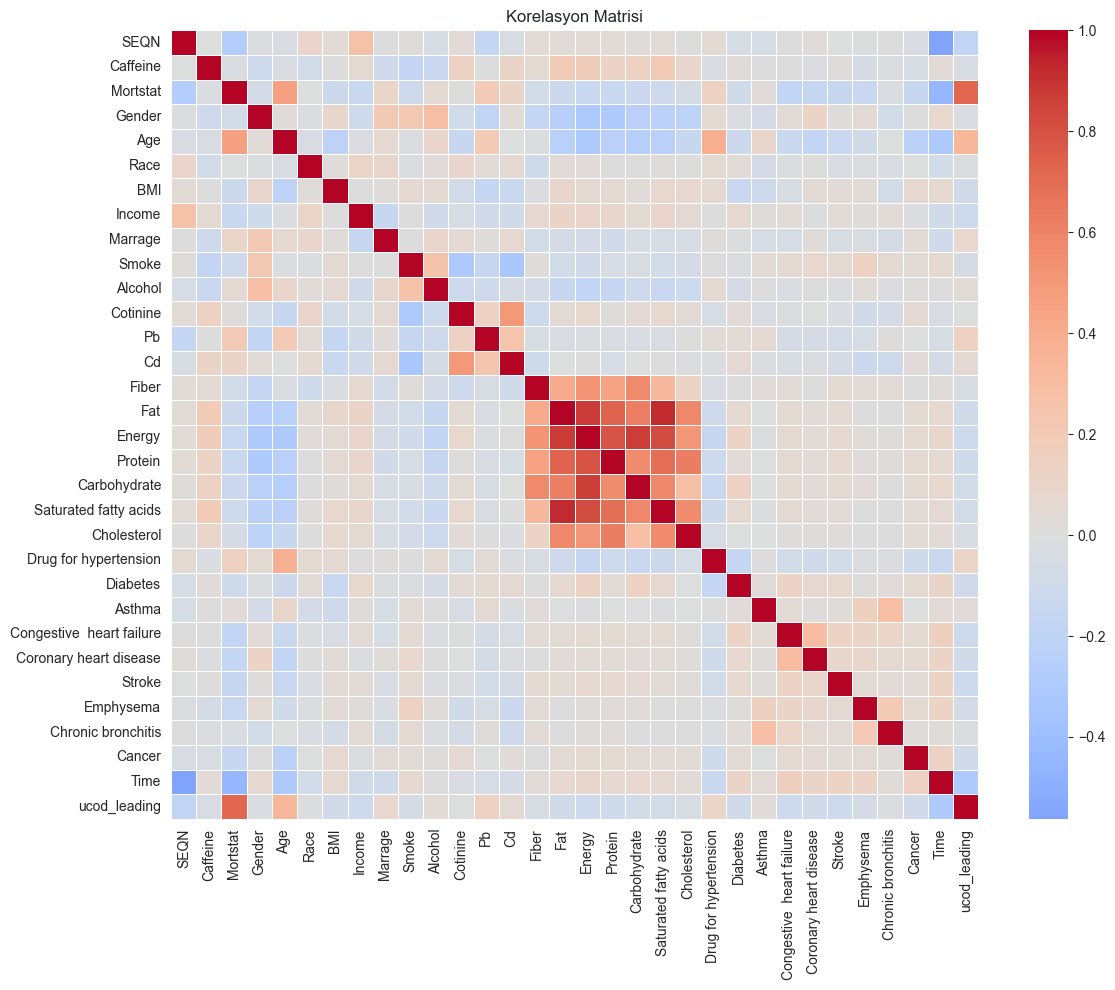

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.tight_layout()
plt.show()

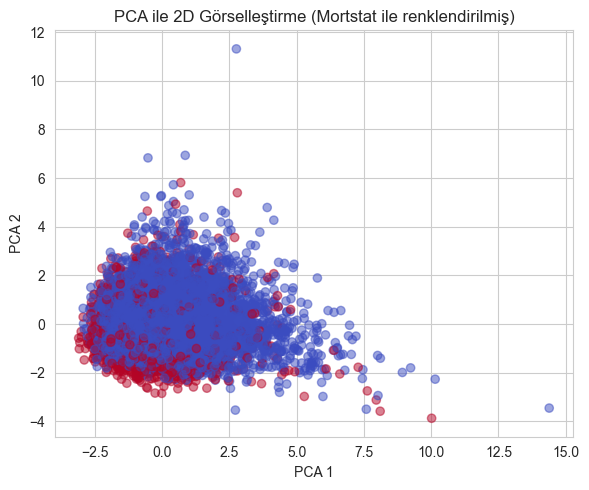

In [10]:
features = ['Age', 'BMI', 'Energy', 'Protein', 'Caffeine']
X_scaled = StandardScaler().fit_transform(df[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Mortstat"], cmap="coolwarm", alpha=0.5)
plt.title("PCA ile 2D Görselleştirme (Mortstat ile renklendirilmiş)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()


In [11]:
X = df[["Age", "BMI", "Caffeine", "Smoke", "Diabetes", "Asthma"]]
y = df["Mortstat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Logistic Regression Sonuçları:")
print(classification_report(y_test, y_pred))


Logistic Regression Sonuçları:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1636
           1       0.68      0.56      0.61       783

    accuracy                           0.77      2419
   macro avg       0.74      0.72      0.73      2419
weighted avg       0.76      0.77      0.77      2419



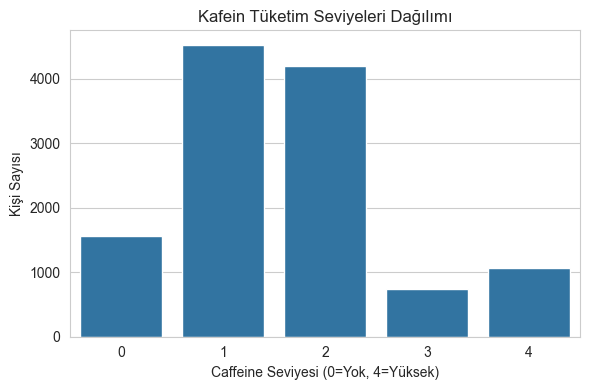

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="Caffeine", data=df)
plt.title("Kafein Tüketim Seviyeleri Dağılımı")
plt.xlabel("Caffeine Seviyesi (0=Yok, 4=Yüksek)")
plt.ylabel("Kişi Sayısı")
plt.tight_layout()
plt.show()

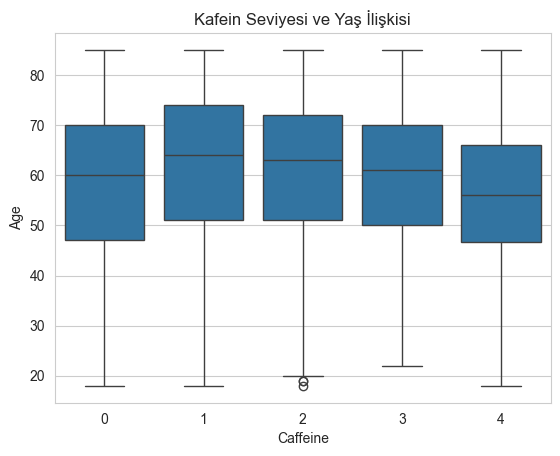

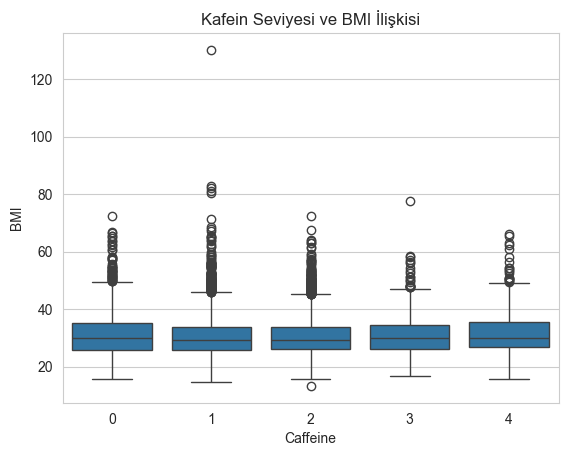

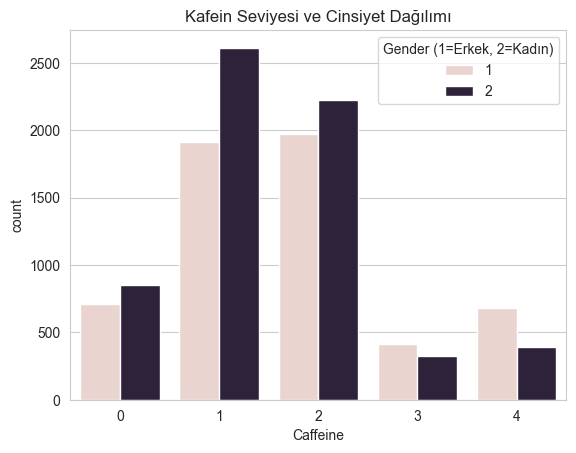

In [13]:
# Kafein ve yaş ilişkisi
sns.boxplot(x="Caffeine", y="Age", data=df)
plt.title("Kafein Seviyesi ve Yaş İlişkisi")
plt.show()

# Kafein ve BMI
sns.boxplot(x="Caffeine", y="BMI", data=df)
plt.title("Kafein Seviyesi ve BMI İlişkisi")
plt.show()

# Kafein ve Cinsiyet
sns.countplot(x="Caffeine", hue="Gender", data=df)
plt.title("Kafein Seviyesi ve Cinsiyet Dağılımı")
plt.legend(title="Gender (1=Erkek, 2=Kadın)")
plt.show()


In [14]:
for col in df.columns:
    print(col)

SEQN
Caffeine
Mortstat
Gender
Age
Race
BMI
Income
Marrage
Smoke
Alcohol
Cotinine
Pb
Cd
Fiber
Fat
Energy
Protein
Carbohydrate
Saturated fatty acids
Cholesterol
Drug for hypertension
Diabetes
Asthma
Congestive  heart failure
Coronary heart disease
Stroke
Emphysema
Chronic bronchitis
Cancer
Time
ucod_leading


-----------------------------------------------------------
-----------------------------------------------------------
**human_cognitive_performance.csv verseti ilk incelemeler**

In [16]:
df = pd.read_csv("human_cognitive_performance.csv")

print(df.info())  
print(df.describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB
None
                Age  Sleep_Duration  Stress_Level  Daily_Screen_Time  \
count  80000.0000

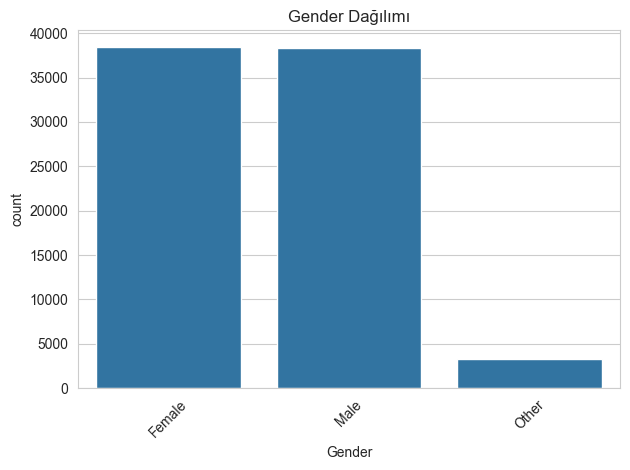

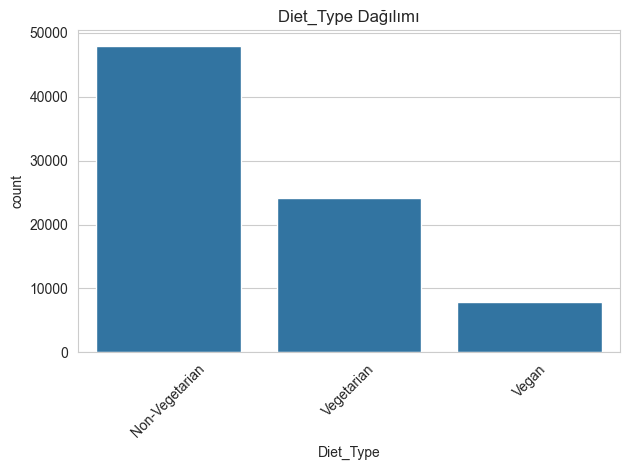

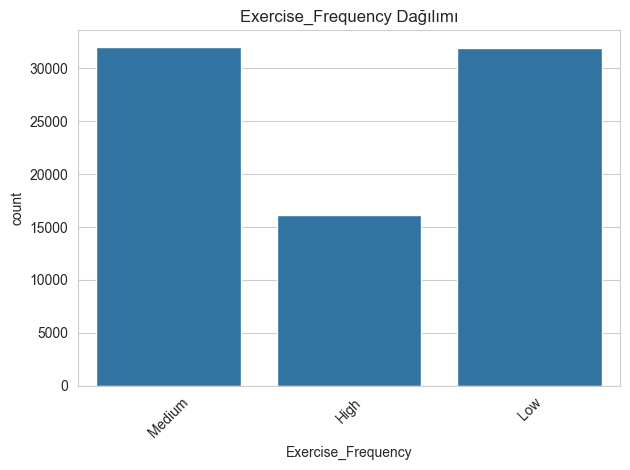

In [17]:
categorical_cols = ['Gender', 'Diet_Type', 'Exercise_Frequency']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Dağılımı")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


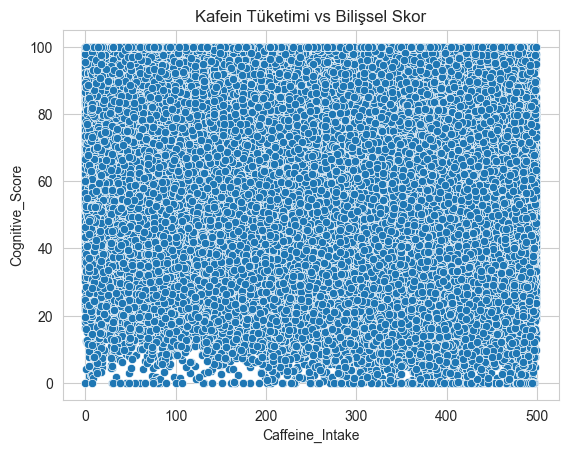

In [18]:
sns.scatterplot(x="Caffeine_Intake", y="Cognitive_Score", data=df)
plt.title("Kafein Tüketimi vs Bilişsel Skor")
plt.show()

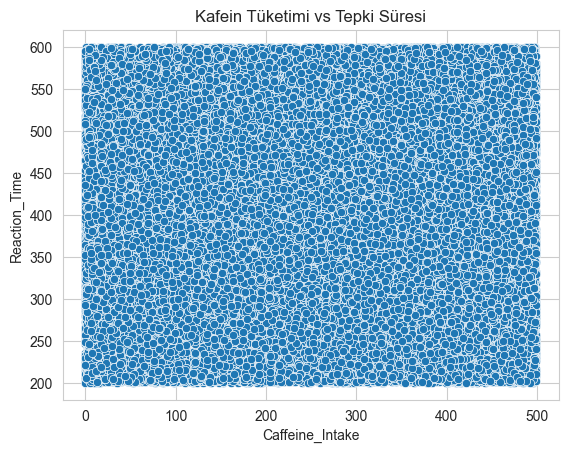

In [19]:
sns.scatterplot(x="Caffeine_Intake", y="Reaction_Time", data=df)
plt.title("Kafein Tüketimi vs Tepki Süresi")
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_cols = ['Gender', 'Diet_Type', 'Exercise_Frequency']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [21]:
features = ['Age', 'Sleep_Duration', 'Stress_Level', 'Caffeine_Intake',
            'Daily_Screen_Time', 'Exercise_Frequency', 'Gender', 'Diet_Type']
X = df_encoded[features]
y = df_encoded['Cognitive_Score']

# Eğitim-test ayır ve modeli eğit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 skoru:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 skoru: 0.134410977861805
MSE: 465.2656924850262


In [22]:
top = df.sort_values("Cognitive_Score", ascending=False).head(5)
print(top[['User_ID', 'Cognitive_Score', 'Caffeine_Intake', 'Sleep_Duration', 'Exercise_Frequency']])

      User_ID  Cognitive_Score  Caffeine_Intake  Sleep_Duration  \
8814    U8815            100.0              290             9.9   
58710  U58711            100.0              124             7.5   
58740  U58741            100.0               79             9.3   
1967    U1968            100.0              395             9.6   
31725  U31726            100.0               66             8.7   

      Exercise_Frequency  
8814              Medium  
58710               High  
58740                Low  
1967                High  
31725               High  


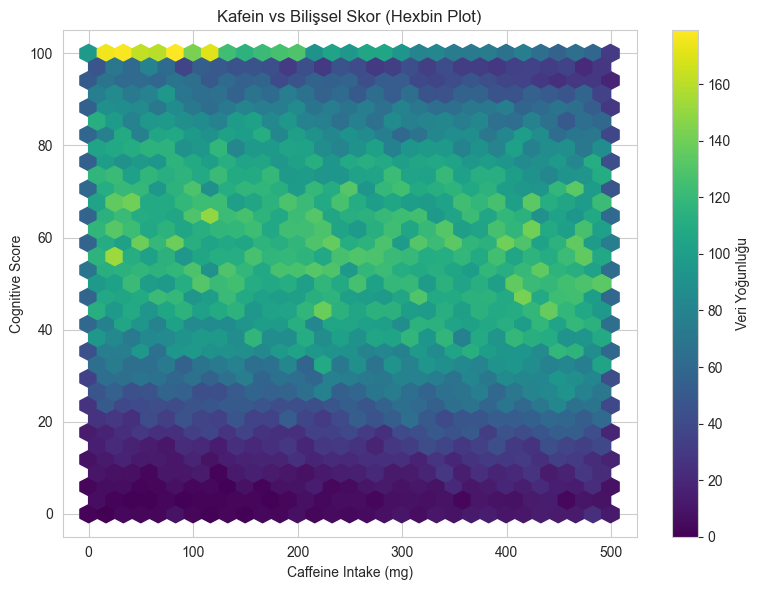

In [23]:
plt.figure(figsize=(8,6))
plt.hexbin(x=df['Caffeine_Intake'], y=df['Cognitive_Score'], gridsize=30, cmap='viridis')
plt.colorbar(label='Veri Yoğunluğu')
plt.xlabel("Caffeine Intake (mg)")
plt.ylabel("Cognitive Score")
plt.title("Kafein vs Bilişsel Skor (Hexbin Plot)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder

# Veriyi oku
df = pd.read_csv("human_cognitive_performance.csv")

# Kategorik değişkenleri sayısallaştır
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male=1, Female=0
df["Diet_Type"] = le.fit_transform(df["Diet_Type"])  # Non-Vegetarian=1, Vegetarian=0
df["Exercise_Frequency"] = le.fit_transform(df["Exercise_Frequency"])  # Low < Medium < High

# Çoklu regresyon modeli
model = smf.ols("Cognitive_Score ~ Caffeine_Intake + Age + Stress_Level + Sleep_Duration + Daily_Screen_Time + Gender + Diet_Type + Exercise_Frequency", data=df).fit()

# Sonuçları yazdır
print(model.summary())


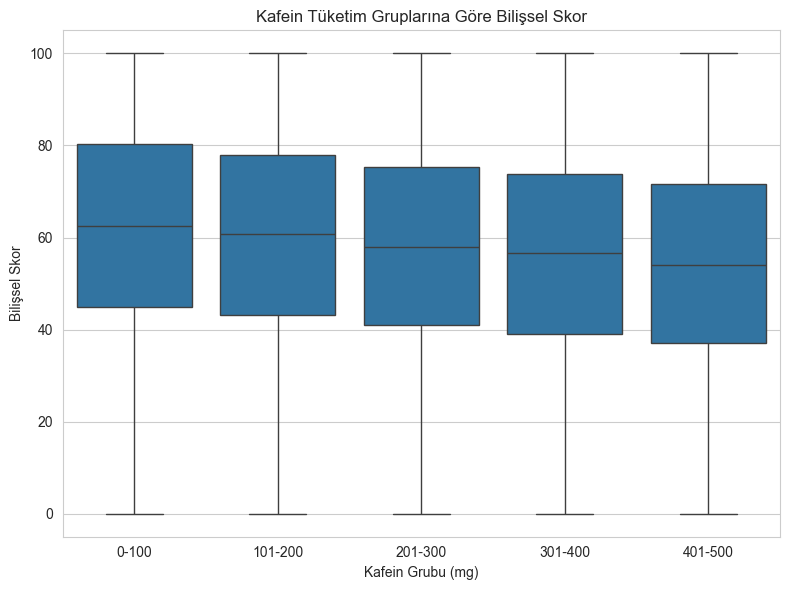

In [25]:
df['Caffeine_Group'] = pd.cut(df['Caffeine_Intake'],
                               bins=[-1, 100, 200, 300, 400, 500],
                               labels=['0-100', '101-200', '201-300', '301-400', '401-500'])

plt.figure(figsize=(8,6))
sns.boxplot(x="Caffeine_Group", y="Cognitive_Score", data=df)
plt.title("Kafein Tüketim Gruplarına Göre Bilişsel Skor")
plt.xlabel("Kafein Grubu (mg)")
plt.ylabel("Bilişsel Skor")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Veriyi yükle
df = pd.read_csv("human_cognitive_performance.csv")

# Kafein gruplarını oluştur
df['Caffeine_Group'] = pd.cut(df['Caffeine_Intake'],
                               bins=[-1, 100, 200, 300, 400, 500],
                               labels=['0-100', '101-200', '201-300', '301-400', '401-500'])

# Her gruptaki bilişsel skorları ayrı ayrı listelere ayır
groups = df.groupby('Caffeine_Group')['Cognitive_Score'].apply(list)

# f_oneway ile ANOVA testi yap
anova_result = f_oneway(*groups)

# Sonucu yazdır
print("F değeri:", anova_result.statistic)
print("p-değeri:", anova_result.pvalue)

# Anlamlılık yorumu
if anova_result.pvalue < 0.05:
    print("Gruplar arasında anlamlı fark var. (p < 0.05)")
else:
    print("Gruplar arasında anlamlı fark YOK.")


In [34]:
# Eksik veri sayısı
print(df.isnull().sum())

User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
Caffeine_Group        0
dtype: int64


In [35]:
from scipy.stats import zscore

# Sadece sayısal değişkenlere uygula
numeric_cols = df.select_dtypes(include='number').columns
z_scores = df[numeric_cols].apply(zscore)

# Aykırı değerleri belirle (örneğin |z| > 3)
outliers = (z_scores.abs() > 3).sum()
print("Aykırı değer sayısı:\n", outliers)


Aykırı değer sayısı:
 Age                   0
Sleep_Duration        0
Stress_Level          0
Daily_Screen_Time     0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Diet_Type'] = le.fit_transform(df['Diet_Type'])  # Non-Veg=1, Veg=0
df['Exercise_Frequency'] = le.fit_transform(df['Exercise_Frequency'])  # Low < Medium < High


In [37]:
df = pd.get_dummies(df, columns=['Exercise_Frequency'], drop_first=True)


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 'Caffeine_Intake']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


In [39]:
df['Low_Sleep'] = df['Sleep_Duration'] < 6
df['Low_Sleep'] = df['Low_Sleep'].astype(int)


In [41]:
print(df.columns)     # ana veri seti
print(alz.columns)    # Alzheimer veri seti

Index(['User_ID', 'Age', 'Gender', 'Sleep_Duration', 'Stress_Level',
       'Diet_Type', 'Daily_Screen_Time', 'Caffeine_Intake', 'Reaction_Time',
       'Memory_Test_Score', 'Cognitive_Score', 'AI_Predicted_Score',
       'Caffeine_Group', 'Exercise_Frequency_1', 'Exercise_Frequency_2',
       'Low_Sleep'],
      dtype='object')
Index(['SEQN', 'Caffeine', 'Mortstat', 'Gender', 'Age', 'Race', 'BMI',
       'Income', 'Marrage', 'Smoke', 'Alcohol', 'Cotinine', 'Pb', 'Cd',
       'Fiber', 'Fat', 'Energy', 'Protein', 'Carbohydrate',
       'Saturated fatty acids', 'Cholesterol', 'Drug for hypertension',
       'Diabetes', 'Asthma', 'Congestive  heart failure',
       'Coronary heart disease', 'Stroke', 'Emphysema', 'Chronic bronchitis',
       'Cancer', 'Time', 'ucod_leading'],
      dtype='object')


In [43]:
df['User_ID'] = df['User_ID'].astype(str)
alz['SEQN'] = alz['SEQN'].astype(str)

merged_df = pd.merge(df, alz, left_on="User_ID", right_on="SEQN", how="inner")

In [45]:
merged_df

Empty DataFrame
Columns: [User_ID, Age_x, Gender_x, Sleep_Duration, Stress_Level, Diet_Type, Daily_Screen_Time, Caffeine_Intake, Reaction_Time, Memory_Test_Score, Cognitive_Score, AI_Predicted_Score, Caffeine_Group, Exercise_Frequency_1, Exercise_Frequency_2, Low_Sleep, SEQN, Caffeine, Mortstat, Gender_y, Age_y, Race, BMI, Income, Marrage, Smoke, Alcohol, Cotinine, Pb, Cd, Fiber, Fat, Energy, Protein, Carbohydrate, Saturated fatty acids, Cholesterol, Drug for hypertension, Diabetes, Asthma, Congestive  heart failure, Coronary heart disease, Stroke, Emphysema, Chronic bronchitis, Cancer, Time, ucod_leading]
Index: []

[0 rows x 48 columns]

**CAFFEINE AND TINNITUS**

In [8]:
# Dosyayı oku ve sayfaları çek
xls = pd.ExcelFile("Caffeine and Tinnitus.xlsx")
df_caffeine = xls.parse("Caffeine Group", skiprows=1)
df_placebo = xls.parse("Placebo Group", skiprows=1)

# Grup bilgisi ekle
df_caffeine["Group"] = "Caffeine"
df_placebo["Group"] = "Placebo"

# Birleştir
df_combined = pd.concat([df_caffeine, df_placebo], ignore_index=True)

df_combined.dropna(how="all", inplace=True)
df_combined.dropna(axis=1, how="all", inplace=True)

In [9]:
df_combined_clean = df_combined.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, -1]].copy()
df_combined_clean.columns = [
    "Gender", "Age", "Tinnitus_Duration", "Tinnitus_Location", "Tinnitus_Type",
    "Harms", "Hearing_Loss", "Caffeine_Intake_mg", "THI_Score", "Group"
]


In [10]:
# Normalize string değerleri düzelt
df_combined_clean['Gender'] = df_combined_clean['Gender'].astype(str).str.lower()
df_combined_clean['Gender'] = df_combined_clean['Gender'].replace({'1': 'male', '0': 'female'})

df_combined_clean['Hearing_Loss'] = df_combined_clean['Hearing_Loss'].astype(str).str.lower()
df_combined_clean['Hearing_Loss'] = df_combined_clean['Hearing_Loss'].replace({'1': 'have', '0': 'do not have'})

# Label encoding
le = LabelEncoder()
df_encoded = df_combined_clean.copy()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])  # male=1, female=0
df_encoded['Hearing_Loss'] = le.fit_transform(df_encoded['Hearing_Loss'])  # have=1, do not have=0
df_encoded['Group'] = df_encoded['Group'].map({'Caffeine': 1, 'Placebo': 0})


In [11]:
scaler = StandardScaler()
scale_cols = ['Age', 'Tinnitus_Duration', 'Caffeine_Intake_mg', 'THI_Score']
df_encoded[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

# Yeni sütun: 100 mg'dan fazla kafein içenleri işaretle
df_encoded['High_Caffeine'] = (df_combined_clean['Caffeine_Intake_mg'] > 100).astype(int)


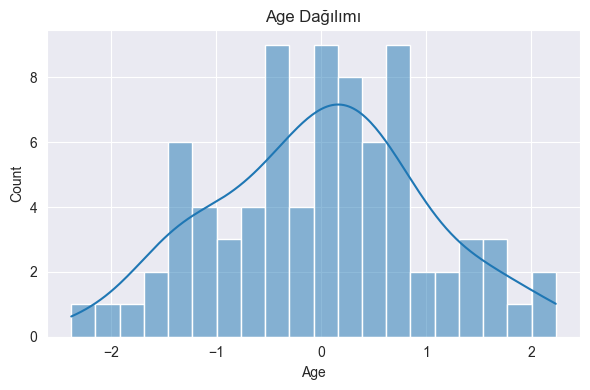

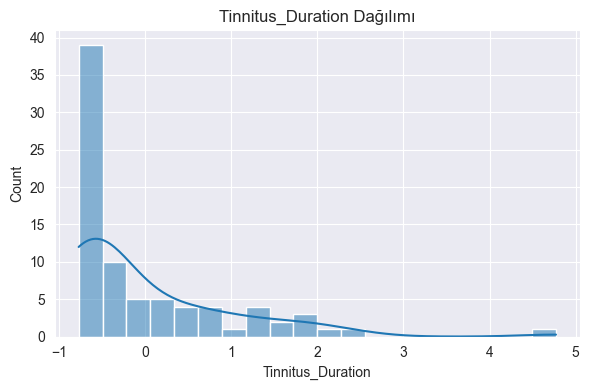

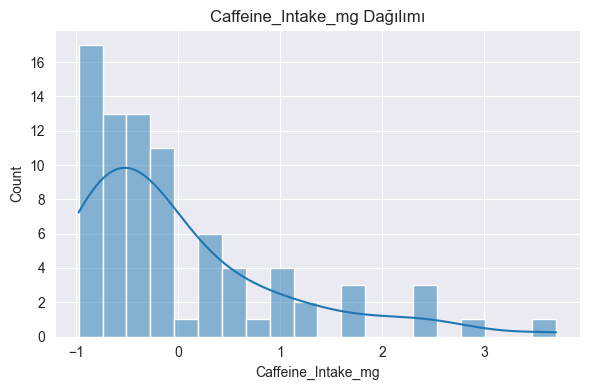

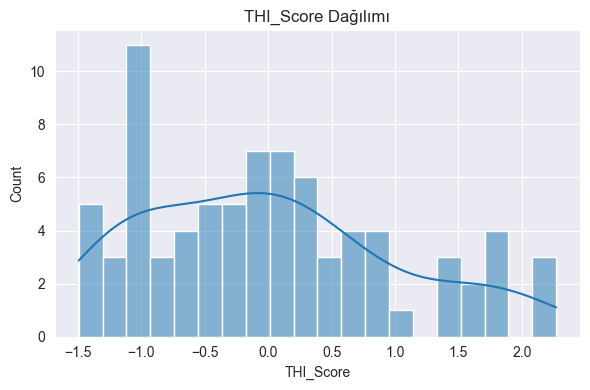

In [12]:
num_cols = ['Age', 'Tinnitus_Duration', 'Caffeine_Intake_mg', 'THI_Score']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_encoded[col], kde=True, bins=20)
    plt.title(f"{col} Dağılımı")
    plt.tight_layout()
    plt.show()


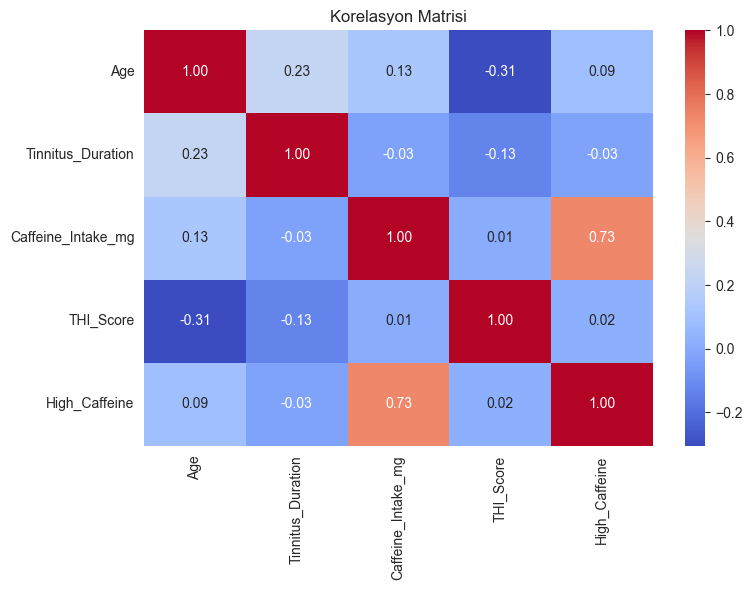

In [13]:
plt.figure(figsize=(8, 6))
corr_matrix = df_encoded[num_cols + ['High_Caffeine']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasyon Matrisi")
plt.tight_layout()
plt.show()

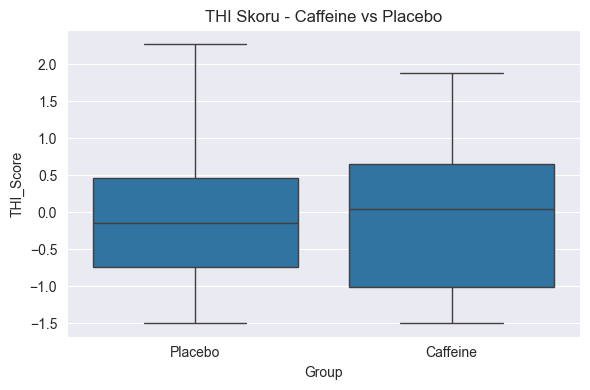

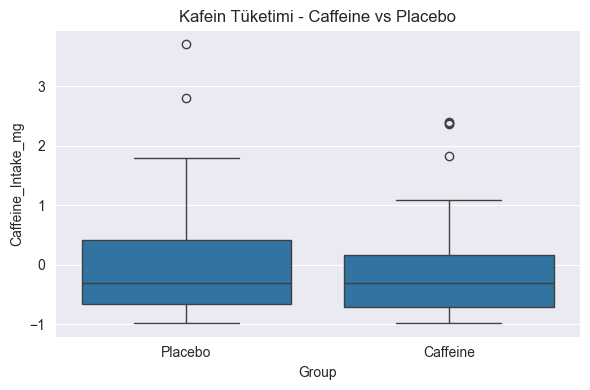

In [14]:
# THI Skoru - Caffeine vs Placebo
plt.figure(figsize=(6, 4))
sns.boxplot(x='Group', y='THI_Score', data=df_encoded)
plt.title("THI Skoru - Caffeine vs Placebo")
plt.xticks([0, 1], ['Placebo', 'Caffeine'])
plt.tight_layout()
plt.show()

# Kafein Tüketimi - Caffeine vs Placebo
plt.figure(figsize=(6, 4))
sns.boxplot(x='Group', y='Caffeine_Intake_mg', data=df_encoded)
plt.title("Kafein Tüketimi - Caffeine vs Placebo")
plt.xticks([0, 1], ['Placebo', 'Caffeine'])
plt.tight_layout()
plt.show()


In [15]:
from scipy.stats import ttest_ind

# Grupları ayır
thi_caffeine = df_combined_clean[df_combined_clean['Group'] == 'Caffeine']['THI_Score']
thi_placebo = df_combined_clean[df_combined_clean['Group'] == 'Placebo']['THI_Score']

# t-testi uygulama
t_stat, p_value = ttest_ind(thi_caffeine, thi_placebo, equal_var=False)

# Sonuçları yazdır
print(f"T-istatistiği: {t_stat:.3f}")
print(f"P-değeri: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Gruplar arasında istatistiksel olarak anlamlı fark vardır.")
else:
    print("❌ Gruplar arasında istatistiksel olarak anlamlı fark yoktur.")


T-istatistiği: 0.106
P-değeri: 0.9155
❌ Gruplar arasında istatistiksel olarak anlamlı fark yoktur.


In [16]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 1. Temiz veri setinden kopya oluştur
anova_tinnitus = df_combined_clean.copy()

# 2. Kategorik değişkenleri uygun formata getir
anova_tinnitus['Group'] = anova_tinnitus['Group'].astype('category')

anova_tinnitus['Hearing_Loss'] = anova_tinnitus['Hearing_Loss'].astype(str).str.lower()
anova_tinnitus['Hearing_Loss'] = anova_tinnitus['Hearing_Loss'].replace({
    'have': 'have',
    'do not have': 'do not have',
    '1': 'have',
    '0': 'do not have'
})
anova_tinnitus['Hearing_Loss'] = anova_tinnitus['Hearing_Loss'].astype('category')

# 3. ANOVA modeli tanımla ve çalıştır
model_tinnitus = ols('THI_Score ~ C(Group) + C(Hearing_Loss) + C(Group):C(Hearing_Loss)', data=anova_tinnitus).fit()
anova_result_tinnitus = sm.stats.anova_lm(model_tinnitus, typ=2)

# 4. Sonuçları yazdır
print(anova_result_tinnitus)


                                sum_sq    df         F    PR(>F)
C(Group)                     18.879887   1.0  0.047222  0.828552
C(Hearing_Loss)             794.993208   1.0  1.988413  0.162587
C(Group):C(Hearing_Loss)   3206.018686   1.0  8.018795  0.005922
Residual                  30385.788107  76.0       NaN       NaN


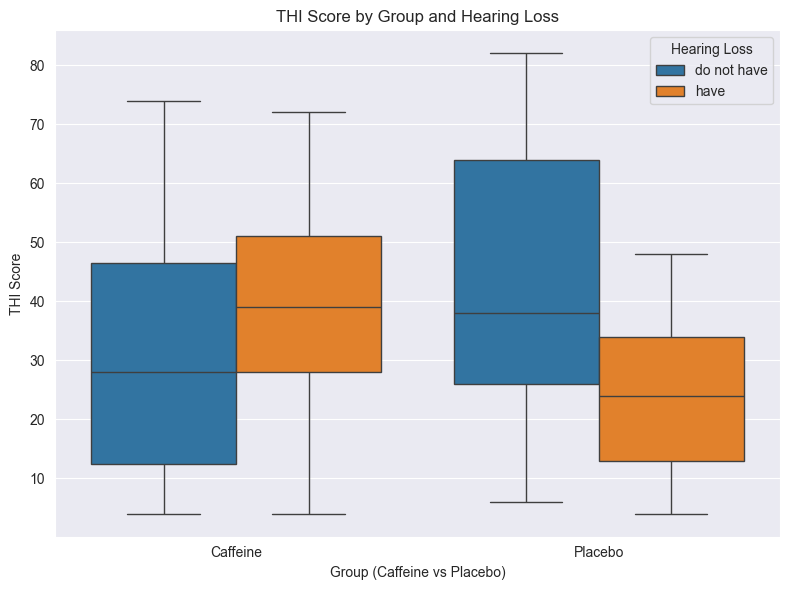

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Group ve Hearing_Loss etkileşimi altında THI_Score
plt.figure(figsize=(8, 6))
sns.boxplot(data=anova_tinnitus, x='Group', y='THI_Score', hue='Hearing_Loss')
plt.title("THI Score by Group and Hearing Loss")
plt.xlabel("Group (Caffeine vs Placebo)")
plt.ylabel("THI Score")
plt.legend(title="Hearing Loss")
plt.tight_layout()
plt.show()


**CAFFEINE AND REACTION TIME**

In [2]:
# Dosyaları oku
df_s1 = pd.read_excel("S1Dataset.XLSX")
df_s2 = pd.read_excel("S2Dataset.XLSX")

# Kaynak bilgisi ekle
df_s1['Dataset'] = 'S1'
df_s2['Dataset'] = 'S2'

# Birleştir
df_all = pd.concat([df_s1, df_s2], ignore_index=True)

# Sütun adlarını düzelt
df_all.columns = ['Participant', 'Intervention', 'Trial', 'Time', 'Condition',
                  'Cue_Type', 'Reaction_Time', 'Percent_Correct', 'Dataset']


In [3]:
# Metin formatlarını düzenle
df_all['Intervention'] = df_all['Intervention'].str.strip().str.capitalize()
df_all['Time'] = df_all['Time'].str.strip().str.lower()
df_all['Condition'] = df_all['Condition'].str.strip().str.capitalize()
df_all['Cue_Type'] = df_all['Cue_Type'].str.strip().str.lower()


In [4]:
# Tepki süresi özet istatistikleri
summary_rt = df_all.groupby(['Intervention', 'Time'])['Reaction_Time'].describe()

# Doğruluk oranı özet istatistikleri
summary_acc = df_all.groupby(['Intervention', 'Time'])['Percent_Correct'].describe()

print(summary_rt)
print(summary_acc)


                   count      mean       std       min       25%       50%  \
Intervention Time                                                            
Caffeine     post  144.0  0.313620  0.047553  0.230444  0.281218  0.306285   
             pre   144.0  0.317860  0.040738  0.236437  0.288091  0.311167   
Placebo      post  144.0  0.344373  0.058253  0.250929  0.305332  0.333883   
             pre   144.0  0.323900  0.044102  0.258042  0.293928  0.315317   

                        75%       max  
Intervention Time                      
Caffeine     post  0.331602  0.452900  
             pre   0.336143  0.438704  
Placebo      post  0.367829  0.547444  
             pre   0.338598  0.499600  
                   count       mean       std        min         25%    50%  \
Intervention Time                                                             
Caffeine     post  144.0  98.221651  4.247498  60.000000   96.666667  100.0   
             pre   144.0  98.365456  4.554359  60.0000

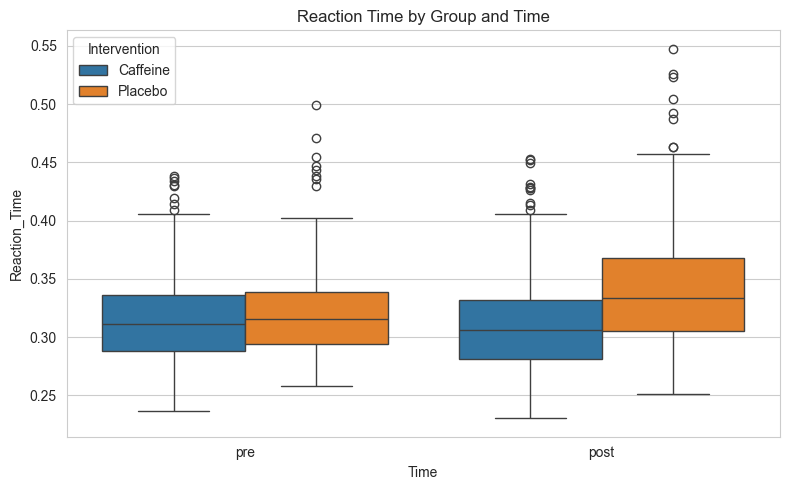

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_3412/1464106281.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_all[(df_all['Intervention'] == 'Caffeine') & (df_all['Time'] == 'pre')]['Reaction_Time'], label='Caffeine Pre', shade=True)
/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_3412/1464106281.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_all[(df_all['Intervention'] == 'Caffeine') & (df_all['Time'] == 'post')]['Reaction_Time'], label='Caffeine Post', shade=True)


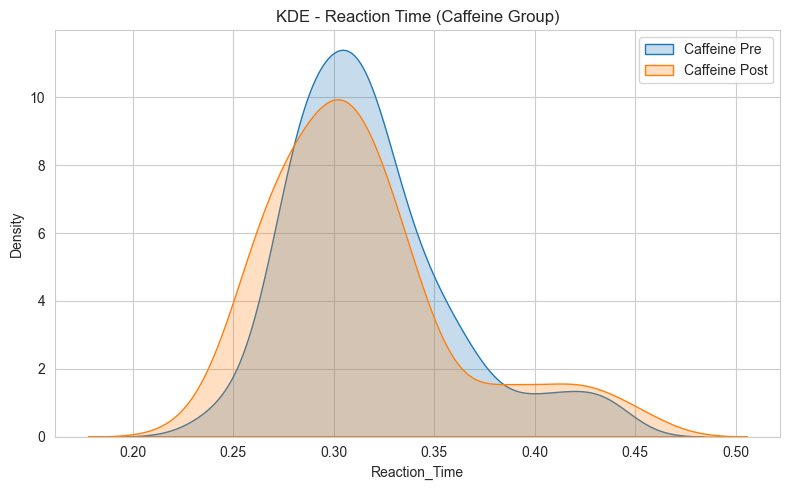

In [7]:
# Tepki süresi boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Time', y='Reaction_Time', hue='Intervention', data=df_all)
plt.title("Reaction Time by Group and Time")
plt.tight_layout()
plt.show()

# KDE plot for Reaction Time (Caffeine pre vs post)
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_all[(df_all['Intervention'] == 'Caffeine') & (df_all['Time'] == 'pre')]['Reaction_Time'], label='Caffeine Pre', shade=True)
sns.kdeplot(data=df_all[(df_all['Intervention'] == 'Caffeine') & (df_all['Time'] == 'post')]['Reaction_Time'], label='Caffeine Post', shade=True)
plt.title("KDE - Reaction Time (Caffeine Group)")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
from scipy.stats import ttest_rel

# Katılımcı bazlı pivot
df_caffeine = df_all[df_all['Intervention'] == 'Caffeine']
df_pivot = df_caffeine.pivot_table(index='Participant', columns='Time', values='Reaction_Time')

# t-testi uygula
t_stat, p_val = ttest_rel(df_pivot['pre'], df_pivot['post'])

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Pre vs Post arasında anlamlı fark var.")
else:
    print("❌ Anlamlı fark yok.")


T-statistic: 0.4977
P-value: 0.6285
❌ Anlamlı fark yok.


In [9]:
from scipy.stats import ttest_ind

# Verileri grupla
caffeine_rt = df_all[(df_all['Intervention'] == 'Caffeine') & (df_all['Time'] == 'post')]['Reaction_Time']
placebo_rt = df_all[(df_all['Intervention'] == 'Placebo') & (df_all['Time'] == 'post')]['Reaction_Time']

# Reaction Time için t-testi
t_stat_rt, p_val_rt = ttest_ind(caffeine_rt, placebo_rt, equal_var=False)

print("📊 Reaction Time (Post) - Caffeine vs Placebo")
print(f"T-statistic: {t_stat_rt:.4f}")
print(f"P-value: {p_val_rt:.4f}")
if p_val_rt < 0.05:
    print("✅ Anlamlı fark var.")
else:
    print("❌ Anlamlı fark yok.")

# % Correct için t-testi
caffeine_acc = df_all[(df_all['Intervention'] == 'Caffeine') & (df_all['Time'] == 'post')]['Percent_Correct']
placebo_acc = df_all[(df_all['Intervention'] == 'Placebo') & (df_all['Time'] == 'post')]['Percent_Correct']

t_stat_acc, p_val_acc = ttest_ind(caffeine_acc, placebo_acc, equal_var=False)

print("\n📊 Percent Correct (Post) - Caffeine vs Placebo")
print(f"T-statistic: {t_stat_acc:.4f}")
print(f"P-value: {p_val_acc:.4f}")
if p_val_acc < 0.05:
    print("✅ Anlamlı fark var.")
else:
    print("❌ Anlamlı fark yok.")


📊 Reaction Time (Post) - Caffeine vs Placebo
T-statistic: -4.9077
P-value: 0.0000
✅ Anlamlı fark var.

📊 Percent Correct (Post) - Caffeine vs Placebo
T-statistic: -0.8725
P-value: 0.3838
❌ Anlamlı fark yok.


/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_3412/1097989135.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/ecederya/PycharmProjects/476_project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


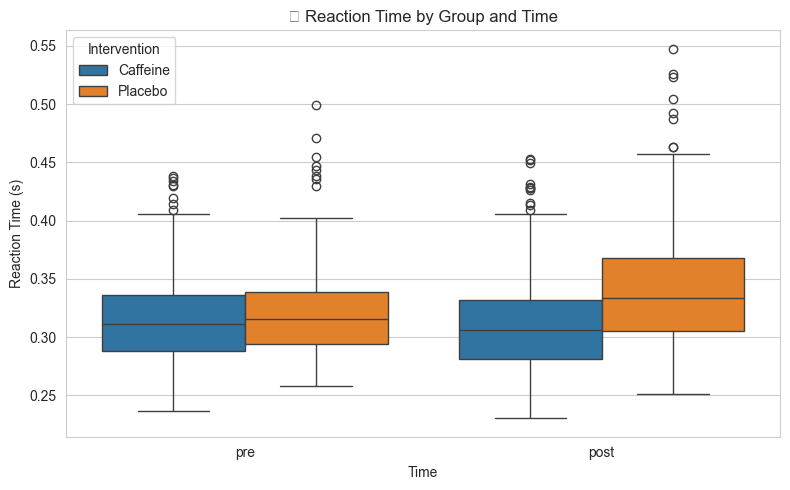

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Time', y='Reaction_Time', hue='Intervention', data=df_all)
plt.title("📊 Reaction Time by Group and Time")
plt.xlabel("Time")
plt.ylabel("Reaction Time (s)")
plt.tight_layout()
plt.show()


/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_3412/1647164927.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/ecederya/PycharmProjects/476_project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


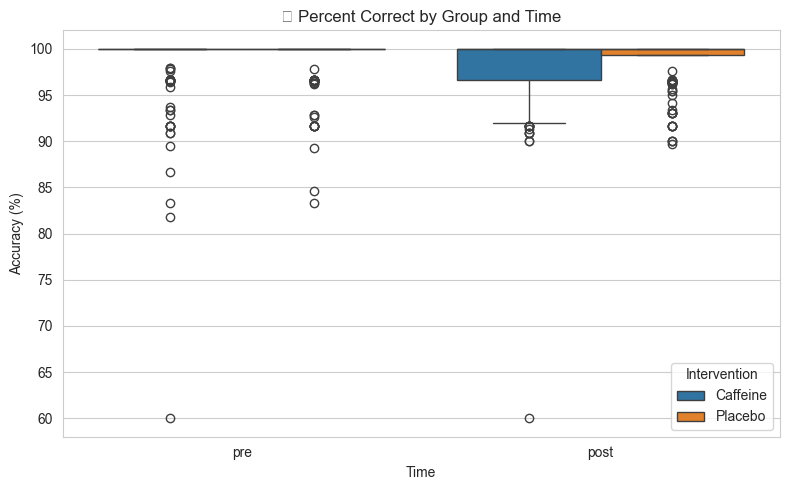

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Time', y='Percent_Correct', hue='Intervention', data=df_all)
plt.title("📊 Percent Correct by Group and Time")
plt.xlabel("Time")
plt.ylabel("Accuracy (%)")
plt.tight_layout()
plt.show()


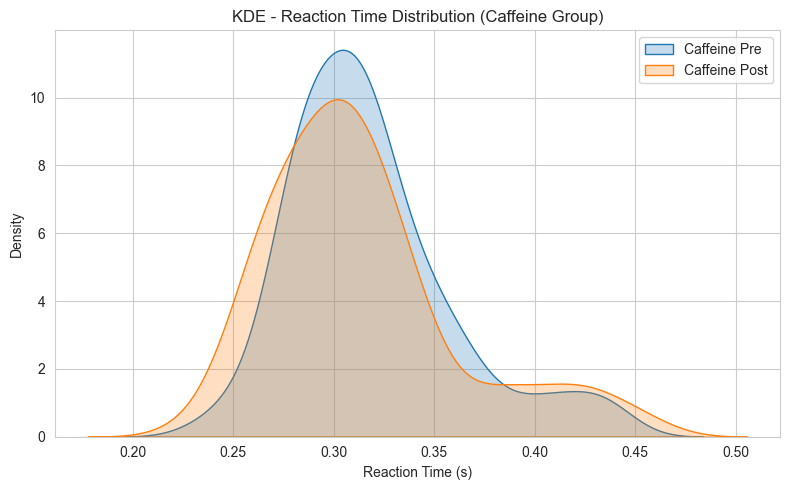

In [12]:
# Yalnızca geçerli ve sayısal değerleri al
caff_pre = pd.to_numeric(df_all[(df_all['Intervention'] == 'Caffeine') & (df_all['Time'] == 'pre')]['Reaction_Time'], errors='coerce').dropna()
caff_post = pd.to_numeric(df_all[(df_all['Intervention'] == 'Caffeine') & (df_all['Time'] == 'post')]['Reaction_Time'], errors='coerce').dropna()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=caff_pre, label='Caffeine Pre', fill=True)
sns.kdeplot(data=caff_post, label='Caffeine Post', fill=True)
plt.title("KDE - Reaction Time Distribution (Caffeine Group)")
plt.xlabel("Reaction Time (s)")
plt.legend()
plt.tight_layout()
plt.show()


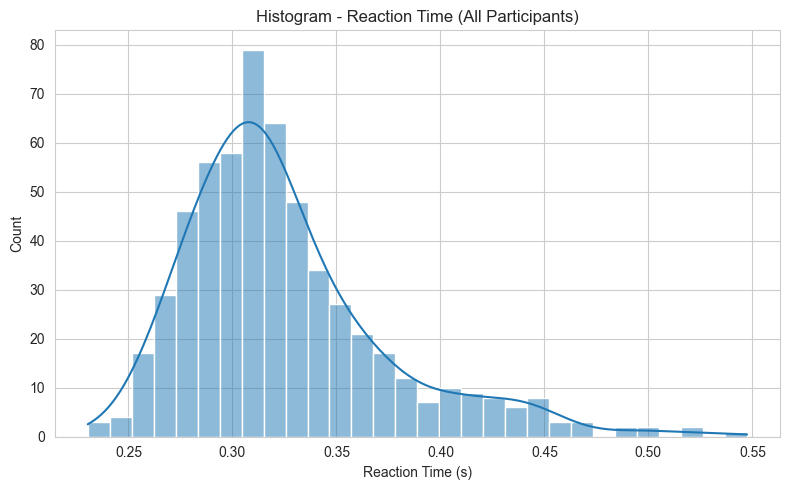

In [13]:
reaction_all = pd.to_numeric(df_all['Reaction_Time'], errors='coerce').dropna()

plt.figure(figsize=(8, 5))
sns.histplot(reaction_all, kde=True, bins=30)
plt.title("Histogram - Reaction Time (All Participants)")
plt.xlabel("Reaction Time (s)")
plt.tight_layout()
plt.show()


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Kopya veri seti oluştur
anova_df = df_all.copy()

# Kategorik değişkenleri belirt
anova_df['Intervention'] = anova_df['Intervention'].astype('category')
anova_df['Time'] = anova_df['Time'].astype('category')

# ANOVA modeli tanımı (Reaction_Time üzerine)
model = ols('Reaction_Time ~ C(Intervention) + C(Time) + C(Intervention):C(Time)', data=anova_df).fit()

# ANOVA tablosu
anova_table = sm.stats.anova_lm(model, typ=2)

# Sonuçları yazdır
print(anova_table)


                           sum_sq     df          F    PR(>F)
C(Intervention)          0.048736    1.0  21.053760  0.000005
C(Time)                  0.009486    1.0   4.097775  0.043404
C(Intervention):C(Time)  0.021988    1.0   9.498832  0.002155
Residual                 1.324076  572.0        NaN       NaN


**Cognitive Performance**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [23]:
# Veriyi yükle
df_human = pd.read_csv("human_cognitive_performance.csv")


In [24]:
# Kullanılmayacak sütunu kaldır
df_human_clean = df_human.drop(columns=['User_ID'])

# Kategorik değişkenleri encode et
le = LabelEncoder()
for col in ['Gender', 'Diet_Type', 'Exercise_Frequency']:
    df_human_clean[col] = le.fit_transform(df_human_clean[col])

# Sayısal verileri normalize et
scale_cols = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 'Caffeine_Intake']
scaler = StandardScaler()
df_human_clean[scale_cols] = scaler.fit_transform(df_human_clean[scale_cols])


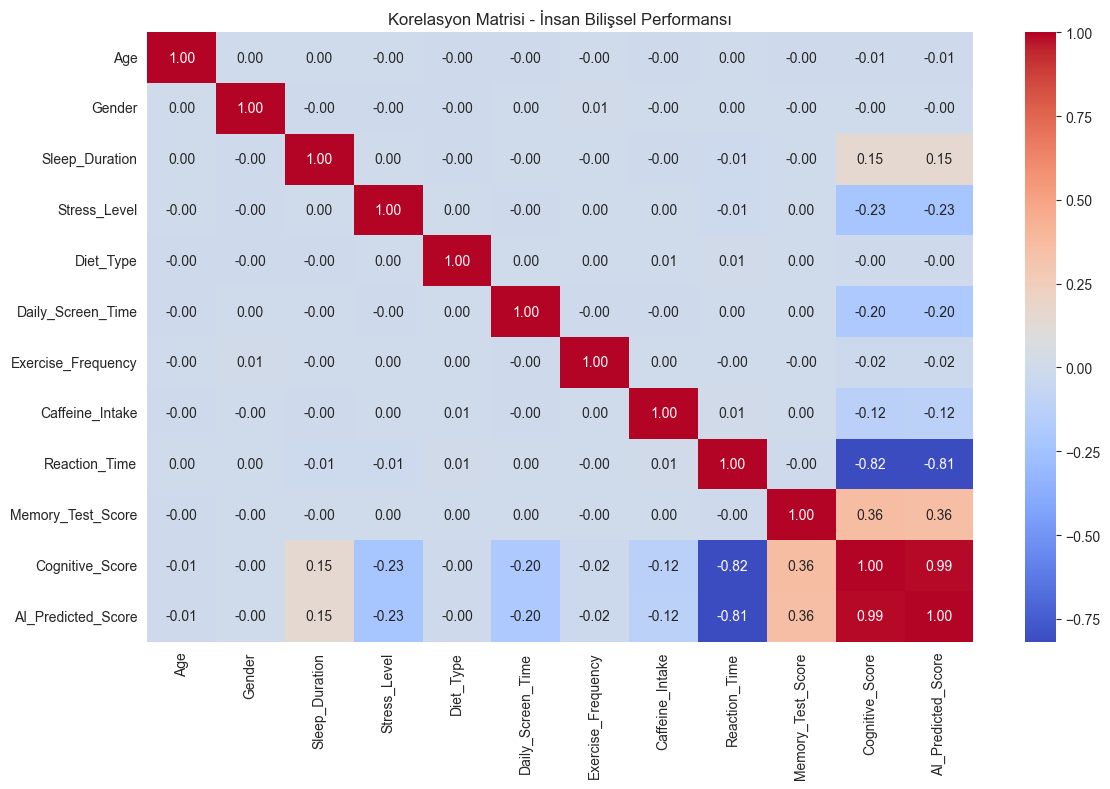

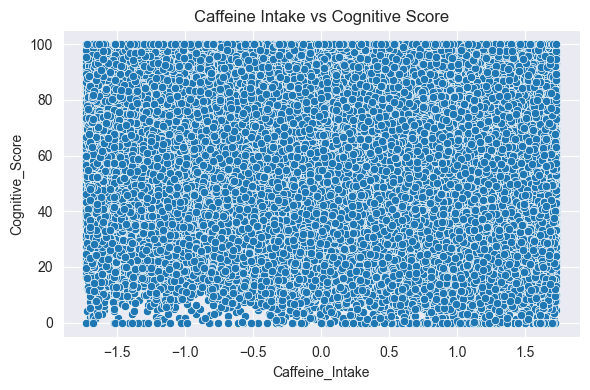

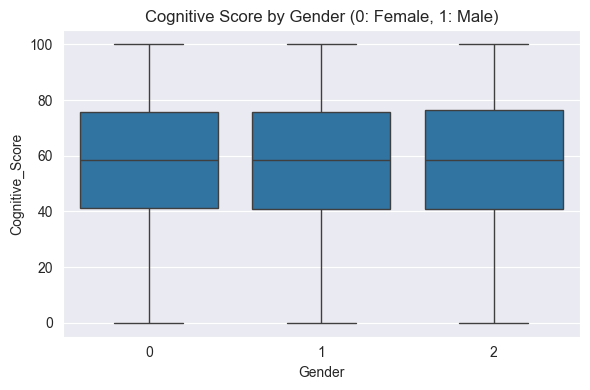

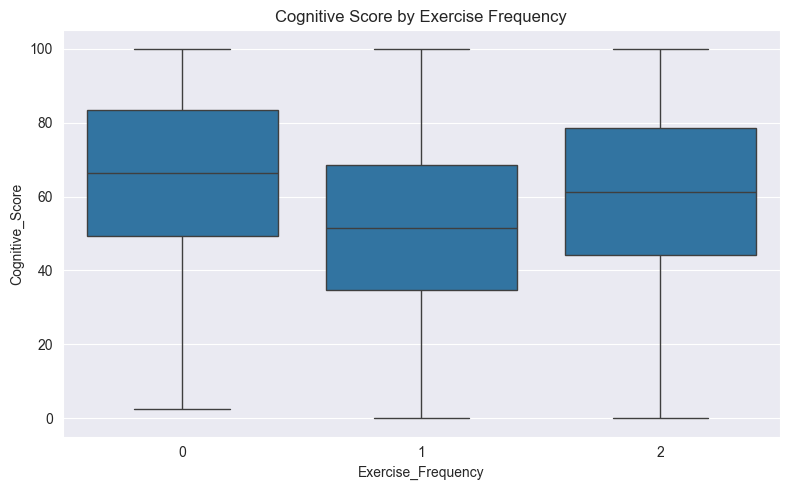

In [25]:
# Korelasyon Matrisi
plt.figure(figsize=(12, 8))
corr_matrix = df_human_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi - İnsan Bilişsel Performansı")
plt.tight_layout()
plt.show()

# Caffeine Intake vs Cognitive Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Caffeine_Intake', y='Cognitive_Score', data=df_human_clean)
plt.title("Caffeine Intake vs Cognitive Score")
plt.tight_layout()
plt.show()

# Gender'e göre Cognitive Score
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Cognitive_Score', data=df_human_clean)
plt.title("Cognitive Score by Gender (0: Female, 1: Male)")
plt.tight_layout()
plt.show()

# Exercise Frequency'e göre Cognitive Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exercise_Frequency', y='Cognitive_Score', data=df_human_clean)
plt.title("Cognitive Score by Exercise Frequency")
plt.tight_layout()
plt.show()


In [29]:
# Regresyon: Caffeine_Intake → Cognitive_Score
X = df_human_clean[['Caffeine_Intake']]
X = sm.add_constant(X)
y = df_human_clean['Cognitive_Score']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Cognitive_Score   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1226.
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          1.38e-266
Time:                        19:41:39   Log-Likelihood:            -3.6395e+05
No. Observations:               80000   AIC:                         7.279e+05
Df Residuals:                   79998   BIC:                         7.279e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              58.1724      0.081    7

In [30]:
# ANOVA için kategorik dönüşüm
anova_df = df_human_clean.copy()
anova_df['Gender'] = anova_df['Gender'].astype('category')
anova_df['Exercise_Frequency'] = anova_df['Exercise_Frequency'].astype('category')

# ANOVA modeli tanımı
anova_model = ols('Cognitive_Score ~ C(Gender) + C(Exercise_Frequency) + C(Gender):C(Exercise_Frequency)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# ANOVA sonucunu yazdır
print(anova_table)


                                       sum_sq       df            F    PR(>F)
C(Gender)                        5.889076e+02      2.0     0.589860  0.554407
C(Exercise_Frequency)            2.601620e+06      2.0  2605.827255  0.000000
C(Gender):C(Exercise_Frequency)  2.032130e+03      4.0     1.017708  0.396512
Residual                         3.993092e+07  79991.0          NaN       NaN


In [31]:
import statsmodels.api as sm

# Bağımlı ve bağımsız değişkenleri ayarla
X_caff = df_human_clean[['Caffeine_Intake']]  # Bağımsız değişken (standardize edilmiş)
X_caff = sm.add_constant(X_caff)              # Sabit terim ekle
y_caff = df_human_clean['Cognitive_Score']    # Bağımlı değişken

# Modeli kur ve eğit
model_caff = sm.OLS(y_caff, X_caff).fit()

# Sonuçları göster
print(model_caff.summary())


                            OLS Regression Results                            
Dep. Variable:        Cognitive_Score   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1226.
Date:                Mon, 30 Jun 2025   Prob (F-statistic):          1.38e-266
Time:                        19:43:50   Log-Likelihood:            -3.6395e+05
No. Observations:               80000   AIC:                         7.279e+05
Df Residuals:                   79998   BIC:                         7.279e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              58.1724      0.081    7

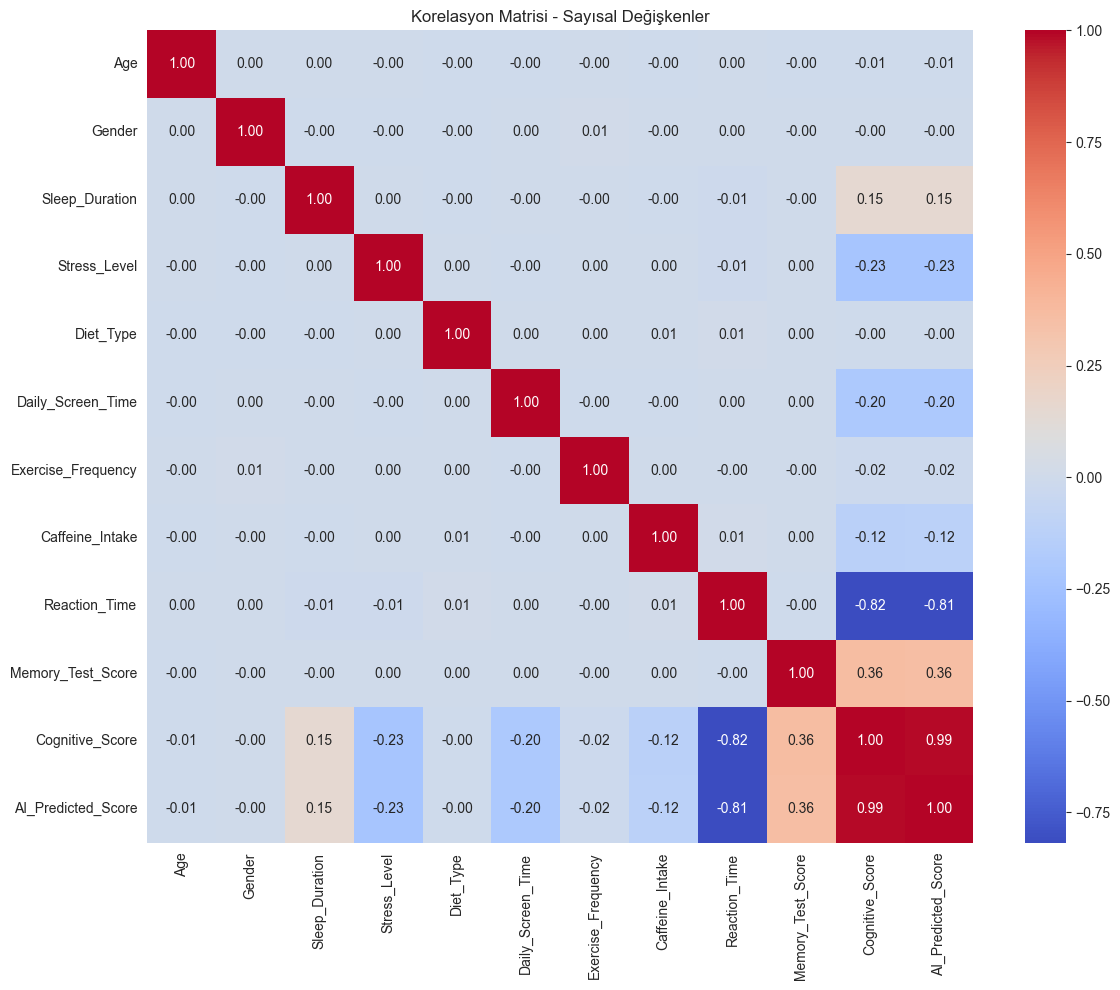

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal sütunları seç (örneğin)
numerical_cols = df_human_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Korelasyon matrisi hesapla
corr_matrix = df_human_clean[numerical_cols].corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi - Sayısal Değişkenler')
plt.tight_layout()
plt.show()


Eksik veri sayısı:
User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64

Veri tipleri:
User_ID                object
Age                     int64
Gender                 object
Sleep_Duration        float64
Stress_Level            int64
Diet_Type              object
Daily_Screen_Time     float64
Exercise_Frequency     object
Caffeine_Intake         int64
Reaction_Time         float64
Memory_Test_Score       int64
Cognitive_Score       float64
AI_Predicted_Score    float64
dtype: object

Kategorik değişkenler: ['User_ID', 'Gender', 'Diet_Type', 'Exercise_Frequency']
Sayısal değişkenler: ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score', 'Cognitive_Scor

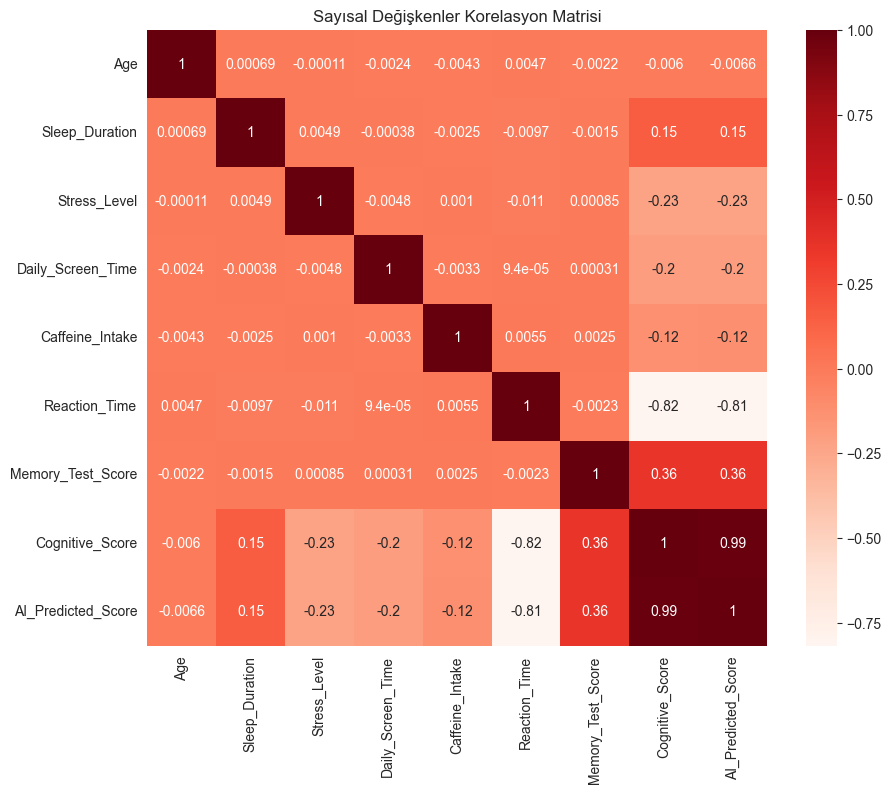

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_human = pd.read_csv("human_cognitive_performance.csv")

# Eksik değer kontrolü
print("Eksik veri sayısı:")
print(df_human.isnull().sum())

# Veri tipi kontrolü
print("\nVeri tipleri:")
print(df_human.dtypes)

# Kategorik ve sayısal sütunlar
categorical_cols = df_human.select_dtypes(include='object').columns.tolist()
numerical_cols = df_human.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKategorik değişkenler:", categorical_cols)
print("Sayısal değişkenler:", numerical_cols)

# Temel istatistikler
print("\nSayısal değişkenlerin temel istatistikleri:")
print(df_human.describe())

"""# Dağılım grafikleri
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_human[col], kde=True)
    plt.title(f"{col} Dağılımı")
    plt.show()"""

# Korelasyon matrisi
corr = df_human[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.show()


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

xls = pd.ExcelFile("Caffeine and Tinnitus.xlsx")
df_caffeine = xls.parse("Caffeine Group", skiprows=1)
df_placebo = xls.parse("Placebo Group", skiprows=1)

# Grupları birleştir
df_tinnitus = pd.concat([df_caffeine, df_placebo], ignore_index=True)

# Boş satır ve sütunları temizle
df_tinnitus.dropna(how='all', inplace=True)
df_tinnitus.dropna(axis=1, how='all', inplace=True)

print("Eksik veri sayısı:")
print(df_tinnitus.isnull().sum())

print("\nVeri tipleri:")
print(df_tinnitus.dtypes)

"""categorical_cols = df_tinnitus.select_dtypes(include='object').columns.tolist()
numerical_cols = df_tinnitus.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKategorik değişkenler:", categorical_cols)
print("Sayısal değişkenler:", numerical_cols)"""

"""print("\nSayısal değişkenlerin temel istatistikleri:")
print(df_tinnitus.describe())

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_tinnitus[col], kde=True)
    plt.title(f"{col} Dağılımı")
    plt.show()"""

# Önemli sütunları seç (varsa Hearing_Loss'u sayısal hale getirmek gerekebilir)
selected_cols = ['Age', 'Caffeine_Intake_mg', 'THI_Score', 'Tinnitus_Duration']

# Seçilen sütunlarla korelasyon matrisi oluştur
corr_subset = df_tinnitus[selected_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Seçilmiş Sayısal Değişkenler Korelasyon Matrisi")
plt.show()



Eksik veri sayısı:
Unnamed: 0                    0
Unnamed: 1                    0
Unnamed: 2                    0
Unnamed: 3                    0
Unnamed: 4                    0
                             ..
3kHz Amplitude Phase 3.3      0
3,5kHz Amplitude Phase 1.2    0
3,5kHz Amplitude Phase 1.3    0
4kHz Amplitude Phase 1.3      0
4kHz Amplitude Phase 3.3      0
Length: 193, dtype: int64

Veri tipleri:
Unnamed: 0                     int64
Unnamed: 1                    object
Unnamed: 2                     int64
Unnamed: 3                     int64
Unnamed: 4                    object
                               ...  
3kHz Amplitude Phase 3.3       int64
3,5kHz Amplitude Phase 1.2     int64
3,5kHz Amplitude Phase 1.3     int64
4kHz Amplitude Phase 1.3       int64
4kHz Amplitude Phase 3.3       int64
Length: 193, dtype: object


KeyError: "None of [Index(['Age', 'Caffeine_Intake_mg', 'THI_Score', 'Tinnitus_Duration'], dtype='object')] are in the [columns]"

In [63]:
import pandas as pd

# Excel dosyasını başlık satırını manuel ayarlayarak oku (başlık satırı 1. satır olabilir)
xls = pd.ExcelFile("Caffeine and Tinnitus.xlsx")

# Sayfa isimlerini kontrol et
print(xls.sheet_names)

# Her iki sayfayı da okuyalım, header satırı 1 olabilir, bunu kontrol et
df_caffeine = xls.parse("Caffeine Group", header=1)
df_placebo = xls.parse("Placebo Group", header=1)

# Boş satır ve sütunları temizle
df_caffeine.dropna(how='all', inplace=True)
df_caffeine.dropna(axis=1, how='all', inplace=True)
df_placebo.dropna(how='all', inplace=True)
df_placebo.dropna(axis=1, how='all', inplace=True)

# 'Unnamed' sütunları varsa anlamlı isimlerle değiştir (örneğin Column_0, Column_1...)
df_caffeine.columns = [col if 'Unnamed' not in str(col) else f'Column_{i}' for i, col in enumerate(df_caffeine.columns)]
df_placebo.columns = [col if 'Unnamed' not in str(col) else f'Column_{i}' for i, col in enumerate(df_placebo.columns)]

# Veri setlerini birleştir
df_tinnitus = pd.concat([df_caffeine, df_placebo], ignore_index=True)

# İlk 5 satırı göster
print(df_tinnitus.head())

# Sütun isimlerini yazdır
print(df_tinnitus.columns)


['Caffeine Group', 'Placebo Group']
   Column_0 Column_1  Column_2  Column_3     Column_4  Column_5 Column_6  \
0         1     Male        37        11     Left ear   whistle      NaN   
1         3   Female        52        36     Left ear   whistle      NaN   
2        11     Male        60        36    Bilateral  wheezing      NaN   
3        13     Male        47        12    Right ear   whistle      NaN   
4        14     Male        51       240  In the head  wheezing      NaN   

      Column_7  Column_8  Phase 1  ...  2kHz Amplitude Phase 1.3  \
0         Have      1.63       36  ...                       -14   
1         Have      7.26        4  ...                       -12   
2  Do not have     73.20       66  ...                       -13   
3  Do not have      0.00       50  ...                       -14   
4  Do not have     97.60       12  ...                        -2   

   2kHz Amplitude Phase 3.3  2,5kHz Amplitude Phase 1.1  \
0                       -11            

In [64]:
# Örnek anlamlı isimlendirme
new_columns = [
    'Participant_ID', 'Gender', 'Age', 'Tinnitus_Duration', 'Tinnitus_Location',
    'Tinnitus_Type', 'Hearing_Loss', 'Caffeine_Intake_mg', 'THI_Score'
]

# Geri kalan sütunlar için orijinal isimleri koruyalım
rest_columns = df_tinnitus.columns[9:].tolist()

df_tinnitus.columns = new_columns + rest_columns

# İlk 10 sütunu göster
print(df_tinnitus.iloc[:, :10].head())


   Participant_ID  Gender  Age  Tinnitus_Duration Tinnitus_Location  \
0               1    Male   37                 11          Left ear   
1               3  Female   52                 36          Left ear   
2              11    Male   60                 36         Bilateral   
3              13    Male   47                 12         Right ear   
4              14    Male   51                240       In the head   

  Tinnitus_Type Hearing_Loss Caffeine_Intake_mg  THI_Score  Phase 1  
0       whistle          NaN               Have       1.63       36  
1       whistle          NaN               Have       7.26        4  
2      wheezing          NaN        Do not have      73.20       66  
3       whistle          NaN        Do not have       0.00       50  
4      wheezing          NaN        Do not have      97.60       12  


In [66]:
# NaN değerleri temizle
df_tinnitus_clean = df_tinnitus.dropna(subset=['Hearing_Loss'])

# Veya NaN’leri 'Unknown' olarak doldur
df_tinnitus['Hearing_Loss'].fillna('Unknown', inplace=True)


/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_3412/4192254560.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tinnitus['Hearing_Loss'].fillna('Unknown', inplace=True)


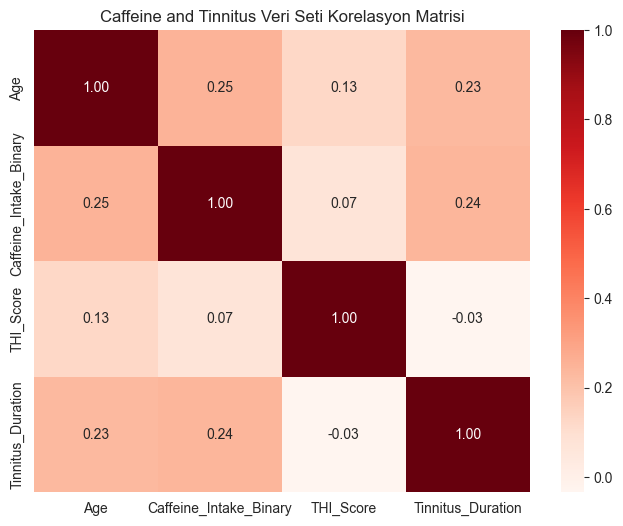

In [70]:
# Örnek korelasyon için sayısal sütunlar
selected_cols = ['Age', 'Caffeine_Intake_Binary', 'THI_Score', 'Tinnitus_Duration']

# Sayısal sütunlar için korelasyon matrisi
corr_subset = df_tinnitus[selected_cols].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, cmap='Reds', fmt='.2f')
plt.title("Caffeine and Tinnitus Veri Seti Korelasyon Matrisi")
plt.show()


In [65]:
# Eğer 'Have' ve 'Do not have' ise binary kodlayalım
df_tinnitus['Caffeine_Intake_Binary'] = df_tinnitus['Caffeine_Intake_mg'].map({'Have': 1, 'Do not have': 0})

# Eğer sayısal değer varsa, onu da sayıya çevirebiliriz (örneğin):
import numpy as np
df_tinnitus['Caffeine_Intake_Num'] = pd.to_numeric(df_tinnitus['Caffeine_Intake_mg'], errors='coerce')

# Kaç tane sayısal veri var bakalım
print(df_tinnitus['Caffeine_Intake_Num'].notnull().sum())


0


**Caffeine/Placebo için korelasyon matrisi**

Eksik veri sayısı:
Participant                         0
Intervention                        0
Trial (1/2)                         0
Time Point(pre/post)                0
Condition (Endogenous/Exogenous)    0
Cue Type (valid/invalid/neutral)    0
Reaction Time (sec)                 0
% Correct                           0
dtype: int64

Veri tipleri:
Participant                           int64
Intervention                         object
Trial (1/2)                           int64
Time Point(pre/post)                 object
Condition (Endogenous/Exogenous)     object
Cue Type (valid/invalid/neutral)     object
Reaction Time (sec)                 float64
% Correct                           float64
dtype: object

Kategorik değişkenler: ['Intervention', 'Time Point(pre/post)', 'Condition (Endogenous/Exogenous)', 'Cue Type (valid/invalid/neutral)']
Sayısal değişkenler: ['Participant', 'Trial (1/2)', 'Reaction Time (sec)', '% Correct']

Sayısal değişkenlerin temel istatistikleri:
       Partic

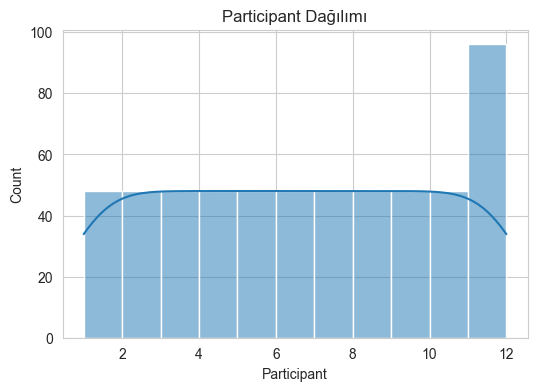

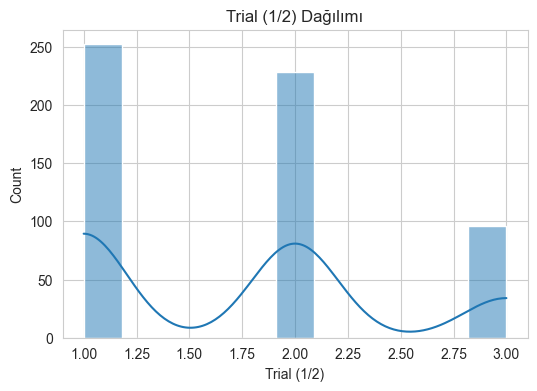

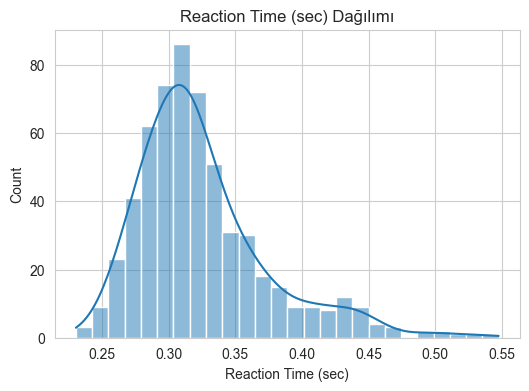

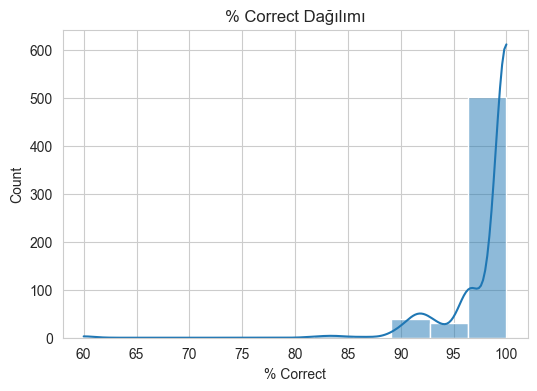

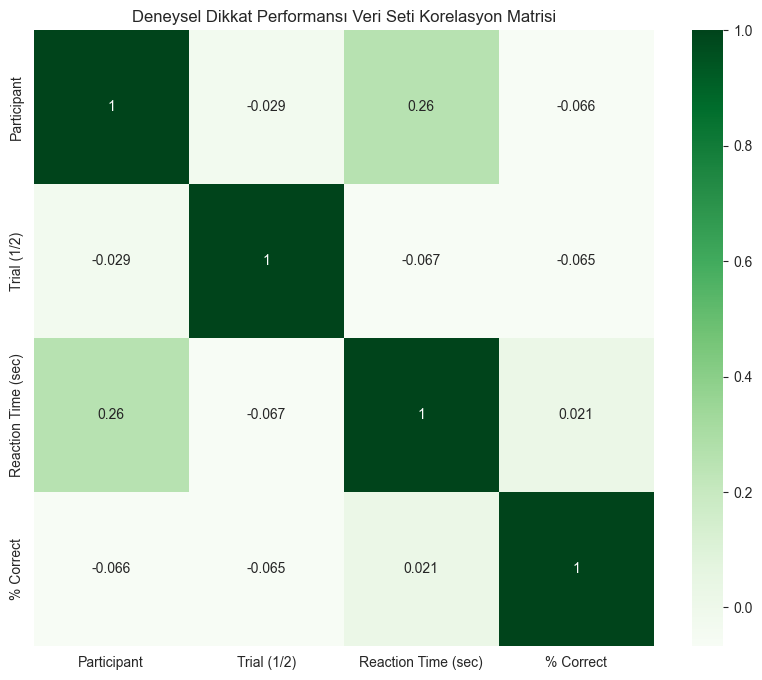

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_s1 = pd.read_excel("S1Dataset.XLSX")
df_s2 = pd.read_excel("S2Dataset.XLSX")

# Birleştirme
df_exp = pd.concat([df_s1, df_s2], ignore_index=True)

print("Eksik veri sayısı:")
print(df_exp.isnull().sum())

print("\nVeri tipleri:")
print(df_exp.dtypes)

categorical_cols = df_exp.select_dtypes(include='object').columns.tolist()
numerical_cols = df_exp.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKategorik değişkenler:", categorical_cols)
print("Sayısal değişkenler:", numerical_cols)

print("\nSayısal değişkenlerin temel istatistikleri:")
print(df_exp.describe())

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_exp[col], kde=True)
    plt.title(f"{col} Dağılımı")
    plt.show()

corr = df_exp[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title("Deneysel Dikkat Performansı Veri Seti Korelasyon Matrisi")
plt.show()



Kategorik değişkenler: ['User_ID', 'Gender', 'Diet_Type', 'Exercise_Frequency']
Sayısal değişkenler: ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score', 'Cognitive_Score', 'AI_Predicted_Score']


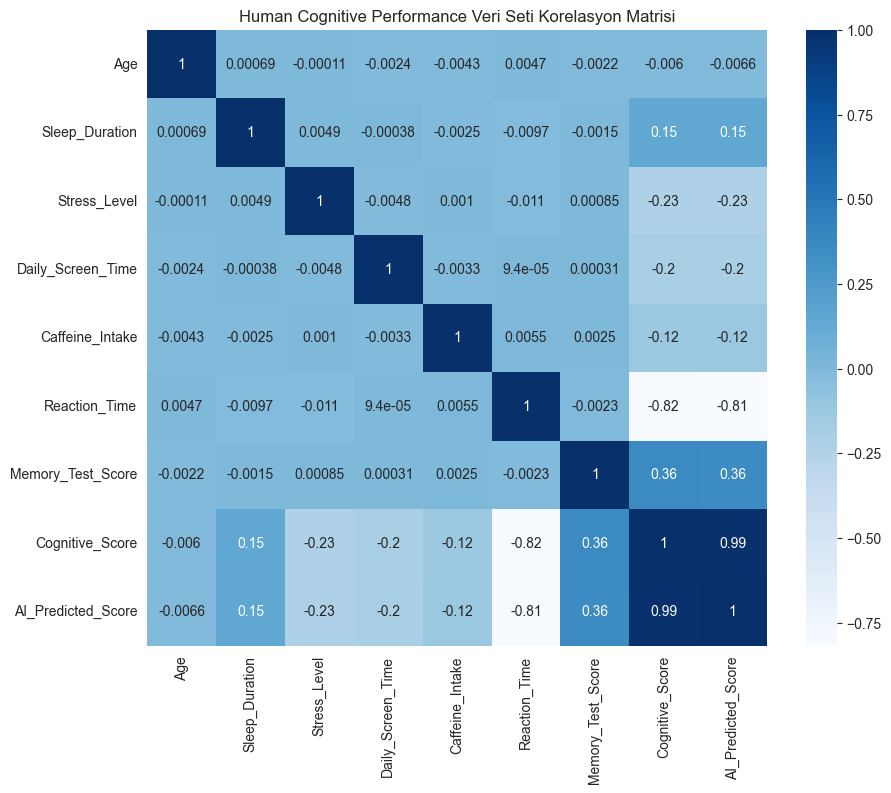

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_human = pd.read_csv("human_cognitive_performance.csv")

# Kategorik ve sayısal sütunlar
categorical_cols = df_human.select_dtypes(include='object').columns.tolist()
numerical_cols = df_human.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKategorik değişkenler:", categorical_cols)
print("Sayısal değişkenler:", numerical_cols)

# Korelasyon matrisi
corr = df_human[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Human Cognitive Performance Veri Seti Korelasyon Matrisi")
plt.show()


              count        mean         std           min   25%    50%  \
cardio_flag                                                              
0            1680.0  148.710119  189.239602  5.397605e-79  24.0  105.0   
1            1632.0  169.561887  260.668576  5.397605e-79  23.0  108.0   

                75%     max  
cardio_flag                  
0            213.25  4320.0  
1            220.25  3600.0  

T-test result: t = 2.628, p = 0.009
Optimization terminated successfully.
         Current function value: 0.691959
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            cardio_flag   No. Observations:                 3312
Model:                          Logit   Df Residuals:                     3310
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Jul 2025   Pseudo R-squ.:                0.001563
Time:                        00:06:45   Log-Likel

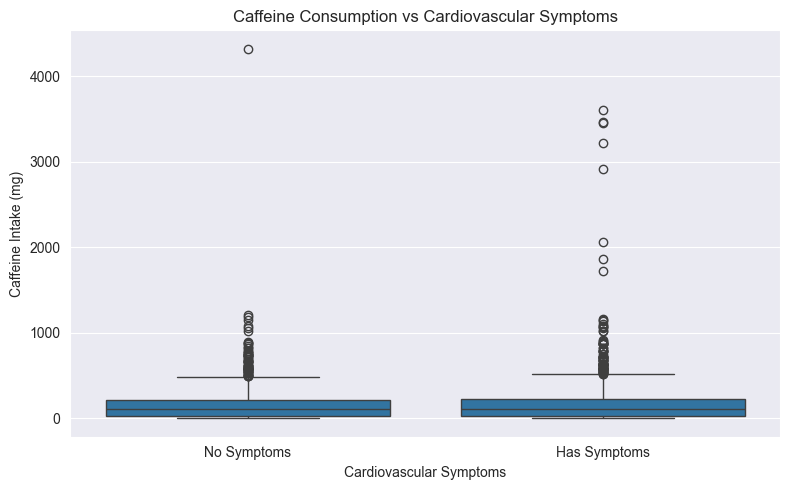

In [1]:
# Load your data
caffeine = pd.read_csv("DR1TOT_J.csv")
cdq = pd.read_csv("CDQ_J.csv")

# Filter needed variables
# Caffeine
caffeine_filtered = caffeine[['SEQN', 'DR1TCAFF']]

# Cardiovascular-related symptom variables
symptoms_vars = [
    'SEQN',
    'CDQ001',  # chest pain/discomfort
    'CDQ009A', 'CDQ009B', 'CDQ009C', 'CDQ009D',
    'CDQ009E', 'CDQ009F', 'CDQ009G', 'CDQ009H',  # various pain locations
    'CDQ008',  # severe chest pain > 30 min
    'CDQ010'   # shortness of breath on stairs
]

cdq_filtered = cdq[symptoms_vars]

# Merge datasets on SEQN
df = pd.merge(caffeine_filtered, cdq_filtered, on='SEQN')

# Drop rows with missing values
df = df.dropna(subset=['DR1TCAFF'])

# Create a binary cardiovascular indicator (1 if any symptom present, else 0)
symptom_columns = symptoms_vars[1:]
df['cardio_flag'] = df[symptom_columns].apply(
    lambda row: 1 if any(val == 1 for val in row) else 0, axis=1
)

# Summary statistics
print(df.groupby('cardio_flag')['DR1TCAFF'].describe())

# T-test: Compare caffeine intake between groups
group1 = df[df['cardio_flag'] == 1]['DR1TCAFF']
group0 = df[df['cardio_flag'] == 0]['DR1TCAFF']
t_stat, p_val = ttest_ind(group1, group0, equal_var=False)
print(f"\nT-test result: t = {t_stat:.3f}, p = {p_val:.3f}")

# Logistic regression: does caffeine predict symptoms?
X = sm.add_constant(df[['DR1TCAFF']])
y = df['cardio_flag']
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

# Visualization
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='cardio_flag', y='DR1TCAFF')
plt.xticks([0,1], ['No Symptoms', 'Has Symptoms'])
plt.title('Caffeine Consumption vs Cardiovascular Symptoms')
plt.ylabel('Caffeine Intake (mg)')
plt.xlabel('Cardiovascular Symptoms')
plt.tight_layout()
plt.show()


           DR1TCAFF       SysAvg        DiaAvg
count  6.125000e+03  6125.000000  6.125000e+03
mean   1.180640e+02   121.771973  6.874623e+01
std    1.973521e+02    19.992143  1.531413e+01
min    5.397605e-79    78.000000  5.397605e-79
25%    3.000000e+00   107.333333  6.133333e+01
50%    6.300000e+01   118.000000  7.000000e+01
75%    1.600000e+02   132.666667  7.733333e+01
max    4.320000e+03   238.000000  1.246667e+02


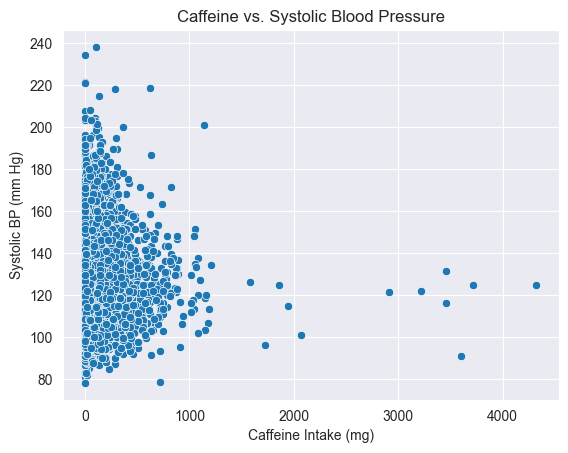

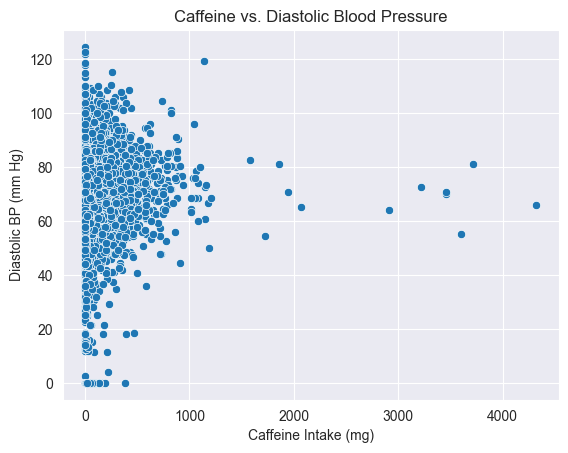


Regression: Systolic BP ~ Caffeine
                            OLS Regression Results                            
Dep. Variable:                 SysAvg   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     55.92
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           8.62e-14
Time:                        00:51:57   Log-Likelihood:                -27009.
No. Observations:                6125   AIC:                         5.402e+04
Df Residuals:                    6123   BIC:                         5.404e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120

In [39]:
# Load datasets
caffeine = pd.read_csv("DR1TOT_J.csv")
bp = pd.read_csv("BPX_J.csv")

# Select relevant columns
caffeine = caffeine[['SEQN', 'DR1TCAFF']]
bp_cols = [
    'SEQN', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY4', 
    'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4'
]
bp = bp[bp_cols]

# Calculate average systolic and diastolic pressure (ignoring missing)
bp['SysAvg'] = bp[['BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY4']].mean(axis=1, skipna=True)
bp['DiaAvg'] = bp[['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4']].mean(axis=1, skipna=True)

# Merge on SEQN
df = pd.merge(caffeine, bp[['SEQN', 'SysAvg', 'DiaAvg']], on='SEQN')

# Drop missing values
df = df.dropna(subset=['DR1TCAFF', 'SysAvg', 'DiaAvg'])

# Descriptive statistics
print(df[['DR1TCAFF', 'SysAvg', 'DiaAvg']].describe())

# Scatter plot
sns.scatterplot(data=df, x='DR1TCAFF', y='SysAvg')
plt.title('Caffeine vs. Systolic Blood Pressure')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Systolic BP (mm Hg)')
plt.show()

sns.scatterplot(data=df, x='DR1TCAFF', y='DiaAvg')
plt.title('Caffeine vs. Diastolic Blood Pressure')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Diastolic BP (mm Hg)')
plt.show()

# Regression: Systolic
X_sys = sm.add_constant(df['DR1TCAFF'])
model_sys = sm.OLS(df['SysAvg'], X_sys).fit()
print("\nRegression: Systolic BP ~ Caffeine")
print(model_sys.summary())

# Regression: Diastolic
X_dia = sm.add_constant(df['DR1TCAFF'])
model_dia = sm.OLS(df['DiaAvg'], X_dia).fit()
print("\nRegression: Diastolic BP ~ Caffeine")
print(model_dia.summary())


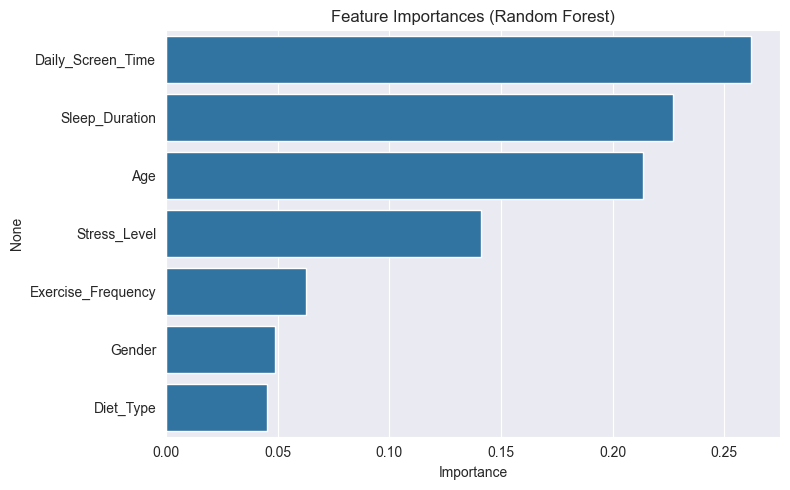

(127.41653800595238,
 -0.07129332524267062,
 Daily_Screen_Time     0.261879
 Sleep_Duration        0.226928
 Age                   0.213672
 Stress_Level          0.140903
 Exercise_Frequency    0.062663
 Gender                0.048805
 Diet_Type             0.045150
 dtype: float64)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('human_cognitive_performance.csv')

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Diet_Type', 'Exercise_Frequency']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target
features = ['Age', 'Gender', 'Sleep_Duration', 'Stress_Level',
            'Diet_Type', 'Daily_Screen_Time', 'Exercise_Frequency']
X = df[features]
y = df['Caffeine_Intake']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature importances
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Plot importances
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

mae, r2, importances


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# --- 1. Verileri oku ---
cognitive = pd.read_csv("human_cognitive_performance.csv")
bp = pd.read_csv("BPX_J.csv")
# tinnitus = pd.read_excel("Caffeine and Tinnitus.xlsx")  # şimdilik dahil edilmiyor

# --- 2. Cognitive dataset ana kaynak olarak alınır ---
df = cognitive.copy()

# Kategorik değişkenleri sayısallaştır
label_encoders = {}
for col in ['Gender', 'Diet_Type', 'Exercise_Frequency']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# --- 3. Kan basıncı verisini entegre et ---
bp_filtered = bp[['SEQN', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY4', 
                  'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4']].copy()
bp_filtered['SysAvg'] = bp_filtered[['BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY4']].mean(axis=1, skipna=True)
bp_filtered['DiaAvg'] = bp_filtered[['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4']].mean(axis=1, skipna=True)

# SEQN olmadığından yapay ID ile merge yap
df['SEQN'] = range(1, len(df) + 1)
df = pd.merge(df, bp_filtered[['SEQN', 'SysAvg', 'DiaAvg']], on='SEQN', how='left')

# --- 4. Özellik listesi belirle ---
features = [
    'Age', 'Gender', 'Sleep_Duration', 'Stress_Level', 'Diet_Type',
    'Daily_Screen_Time', 'Exercise_Frequency', 'SysAvg', 'DiaAvg'
]

# --- 5. Eksik değer kontrolü ve temizleme ---
df = df.dropna(subset=features + ['Caffeine_Intake'])  # NaN olan satırları at

# --- 6. Model giriş/çıkışlarını ayır ---
X = df[features]
y = df['Caffeine_Intake']

# --- 7. Eğitim/test ayır ve model eğit ---
if len(X) < 2:
    print("Veri seti çok küçük, model eğitilemez.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    model = RandomForestRegressor(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)

    # --- 8. Tahmin ve değerlendirme ---
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # --- 9. Özellik önemini çiz ---
    importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    plt.figure(figsize=(9, 5))
    sns.barplot(x=importances.values, y=importances.index)
    plt.title("Feature Importances - Multi-Source Model")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")


Veri seti çok küçük, model eğitilemez.


TINITUS TRAINING

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Girdi / çıktı belirle ---
X = df_encoded[['Gender', 'Age', 'Tinnitus_Duration', 'Hearing_Loss', 'Caffeine_Intake_mg', 'Group']]
y = df_encoded['THI_Score']

# Eğitim / test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Modeller ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

results = []

# --- Eğitim ve değerlendirme ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

# Sonuçları DataFrame olarak döndür
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


                      Model       MAE      RMSE        R2
0         Linear Regression  0.650993  0.823797 -0.417211
3  Support Vector Regressor  0.720070  0.834689 -0.454934
1             Random Forest  0.757211  0.892669 -0.664084
4       K-Nearest Neighbors  0.765652  0.921067 -0.771646
2         Gradient Boosting  0.849929  1.060384 -1.348121


COGNITIVE TRAINING

In [32]:
# 1. Kafein alımı 3 standart sapmadan büyükse outlier kabul et ve filtrele
from scipy.stats import zscore

df_filtered = df_human_clean.copy()
z_scores = zscore(df_filtered['Caffeine_Intake'])
df_filtered = df_filtered[(z_scores < 3)]

In [33]:
# Yeni özellikler ekle
df_filtered['Age_Squared'] = df_filtered['Age'] ** 2
df_filtered['Stress_Sleep_Interaction'] = df_filtered['Stress_Level'] * df_filtered['Sleep_Duration']
df_filtered['Screen_per_Age'] = df_filtered['Daily_Screen_Time'] / (df_filtered['Age'] + 1)

In [34]:
X = df_filtered.drop(columns=['Caffeine_Intake'])  # Hedefi dışarda bırak
y = df_filtered['Caffeine_Intake']

# --- Eğitim/test bölme ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Modeller ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

results = []

# --- Eğitim ve değerlendirme ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

# --- Sonuçları tablo halinde yazdır ---
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)

                      Model       MAE      RMSE        R2
1             Random Forest  0.701928  0.826605  0.310739
0         Linear Regression  0.764162  0.909909  0.164814
2         Gradient Boosting  0.807822  0.936407  0.115462
3  Support Vector Regressor  0.802131  0.947837  0.093736
4       K-Nearest Neighbors  0.867397  1.038642 -0.088227


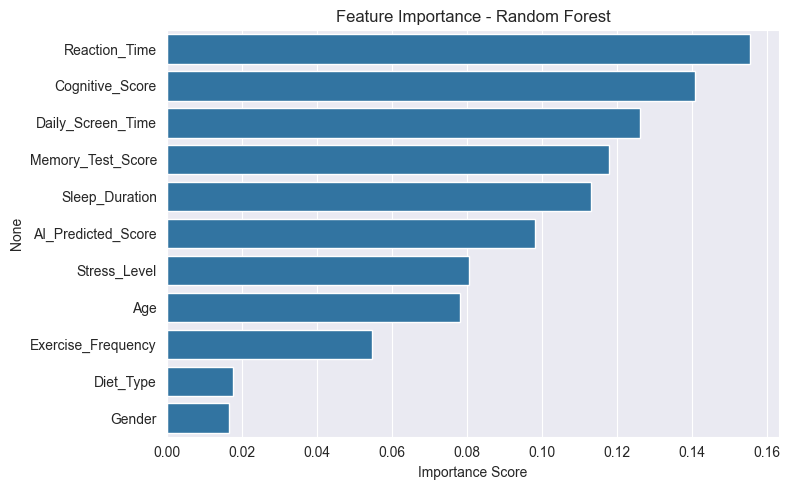

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importance_df.values, y=importance_df.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

BLOOD PRESSURE

In [40]:
from sklearn.preprocessing import StandardScaler

# 1. SEQN dışında kalanları al
df_model = df[['DR1TCAFF', 'SysAvg', 'DiaAvg']].copy()
df_model = df_model.rename(columns={'DR1TCAFF': 'Caffeine_Intake'})

# 2. Eksik değerleri sil
df_model = df_model.dropna()

# 3. Normalize et (isteğe bağlı ama önceki datasetlerde yapılmıştı)
scaler = StandardScaler()
scaled = scaler.fit_transform(df_model)

df_scaled = pd.DataFrame(scaled, columns=df_model.columns)

# 4. Özellik ve hedefleri hazırla
X = df_scaled[['Caffeine_Intake']]
y_sys = df_scaled['SysAvg']
y_dia = df_scaled['DiaAvg']


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# --- 1. Giriş verisi: DR1TCAFF ve BP ortalamaları ---
df_model = df[['DR1TCAFF', 'SysAvg', 'DiaAvg']].copy()
df_model = df_model.rename(columns={'DR1TCAFF': 'Caffeine_Intake'})

# --- 2. Eksik değerleri çıkar ---
df_model = df_model.dropna()

# --- 3. Aykırı değer temizliği (üst %1 kırpma) ---
df_model = df_model[df_model['Caffeine_Intake'] < df_model['Caffeine_Intake'].quantile(0.99)]

# --- 4. Normalize et (StandardScaler) ---
scaler = StandardScaler()
scaled = scaler.fit_transform(df_model)
df_scaled = pd.DataFrame(scaled, columns=df_model.columns)

# --- 5. Giriş ve hedefleri ayır ---
X = df_scaled[['Caffeine_Intake']]
y_sys = df_scaled['SysAvg']
y_dia = df_scaled['DiaAvg']

# --- 6. Eğitim/test bölme ---
X_train_sys, X_test_sys, y_train_sys, y_test_sys = train_test_split(X, y_sys, test_size=0.2, random_state=42)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X, y_dia, test_size=0.2, random_state=42)

# --- 7. Modeller ---
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# --- 8. Eğitim ve değerlendirme fonksiyonu ---
def evaluate_models(X_train, X_test, y_train, y_test, target_name):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Target": target_name,
            "Model": name,
            "MAE": round(mae, 4),
            "RMSE": round(rmse, 4),
            "R2": round(r2, 4)
        })
    return pd.DataFrame(results)

# --- 9. Değerlendirme sonuçlarını al ---
results_sys = evaluate_models(X_train_sys, X_test_sys, y_train_sys, y_test_sys, "Systolic BP")
results_dia = evaluate_models(X_train_dia, X_test_dia, y_train_dia, y_test_dia, "Diastolic BP")

# --- 10. Tüm sonuçları birleştir ve sırala ---
final_results = pd.concat([results_sys, results_dia]).sort_values(by=["Target", "R2"], ascending=[True, False])
print(final_results)


         Target                     Model     MAE    RMSE      R2
3  Diastolic BP  Support Vector Regressor  0.6908  0.9725  0.0247
2  Diastolic BP         Gradient Boosting  0.7003  0.9770  0.0156
0  Diastolic BP         Linear Regression  0.6990  0.9798  0.0099
1  Diastolic BP             Random Forest  0.7316  1.0092 -0.0503
4  Diastolic BP       K-Nearest Neighbors  0.8023  1.0802 -0.2033
0   Systolic BP         Linear Regression  0.7568  0.9939  0.0109
2   Systolic BP         Gradient Boosting  0.7558  0.9988  0.0010
3   Systolic BP  Support Vector Regressor  0.7526  1.0213 -0.0444
1   Systolic BP             Random Forest  0.7971  1.0459 -0.0954
4   Systolic BP       K-Nearest Neighbors  0.8458  1.0963 -0.2034


CAFFEINE INTAKE TRACKER

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. VERİYİ YÜKLE
df = pd.read_csv("caffeine_intake_tracker.csv")

# 2. GİRİŞ VE HEDEF AYIR
target = 'caffeine_mg'
X = df.drop(columns=[target])
y = df[target]

# 3. KATEGORİK VE SAYISAL AYIR
categorical_cols = [col for col in X.columns if X[col].dtype == 'bool' or 'beverage' in col or 'time_of_day' in col or 'gender' in col]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# 4. STANDARDIZE ET
scaler = StandardScaler()
X_scaled_num = pd.DataFrame(scaler.fit_transform(X[numerical_cols]), columns=numerical_cols)

# 5. VERİYİ BİRLEŞTİR
X_prepared = pd.concat([X_scaled_num, X[categorical_cols].astype(int)], axis=1)

# 6. EĞİTİM / TEST BÖL
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# 7. MODELLERİ TANIMLA
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42),
}

# 8. MODEL EĞİTİMİ VE DEĞERLENDİRME
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 4),
        "RMSE": round(rmse, 4),
        "R2": round(r2, 4)
    })

# 9. SONUÇLARI GÖSTER
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)

                      Model     MAE    RMSE      R2
0         Linear Regression  0.1061  0.1343  0.6487
1          Ridge Regression  0.1064  0.1346  0.6470
3         Gradient Boosting  0.1142  0.1476  0.5758
2             Random Forest  0.1139  0.1488  0.5690
4  Support Vector Regressor  0.1198  0.1493  0.5660
6             MLP Regressor  0.1202  0.1545  0.5354
5       K-Nearest Neighbors  0.1217  0.1566  0.5225


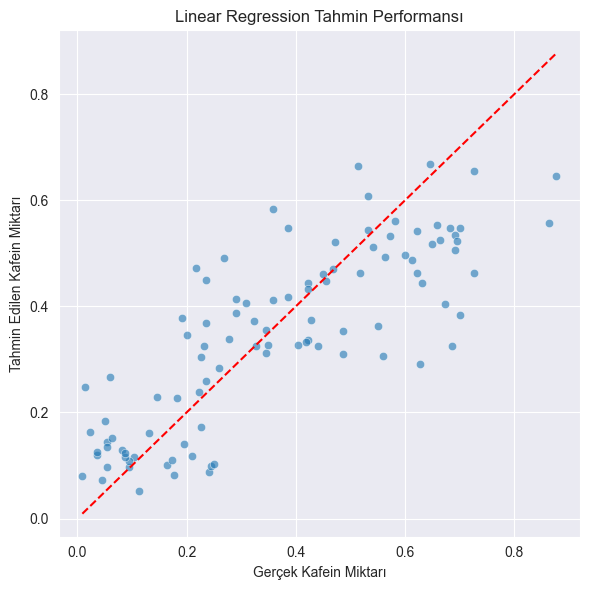

In [48]:
# Linear Regression tahminlerini çizelim örnek olarak
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Gerçek Kafein Miktarı")
plt.ylabel("Tahmin Edilen Kafein Miktarı")
plt.title("Linear Regression Tahmin Performansı")
plt.tight_layout()
plt.show()


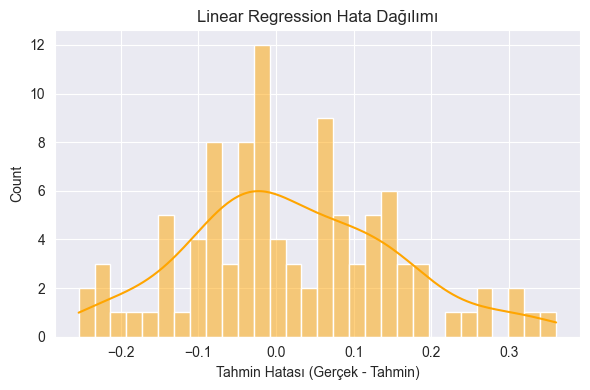

In [49]:
errors = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(errors, bins=30, kde=True, color='orange')
plt.title("Linear Regression Hata Dağılımı")
plt.xlabel("Tahmin Hatası (Gerçek - Tahmin)")
plt.tight_layout()
plt.show()


**CAFFEINE AND CARDOVASCULAR HEALTH TRAINING**

In [5]:
# --- 1. VERİYİ YÜKLE
caffeine = pd.read_csv("DR1TOT_J.csv")
cdq = pd.read_csv("CDQ_J.csv")

# --- 2. ÖZELLİKLERİ SEÇ
caffeine = caffeine[['SEQN', 'DR1TCAFF']]
symptoms_vars = [
    'SEQN',
    'CDQ001',  # Chest pain
    'CDQ008',  # Pain > 30 min
    'CDQ010'   # Shortness of breath on stairs
]
cdq = cdq[symptoms_vars]

# --- 3. BİRLEŞTİR VE TEMİZLE
df = pd.merge(caffeine, cdq, on='SEQN')
df = df.dropna(subset=['DR1TCAFF'])  # Y hedefimiz
df.fillna(0, inplace=True)

# --- 4. X ve y AYIR
X = df[symptoms_vars[1:]]  # semptomlar
y = df['DR1TCAFF']          # hedef: kafein miktarı

# --- 5. ÖLÇEKLE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 6. TRAIN/TEST AYIR
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 7. MODELLER (Regresyon)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500)
}

# --- 8. EĞİTİM + DEĞERLENDİRME
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

# --- 9. SONUÇ
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


                      Model     MAE    RMSE     R2
0         Linear Regression  127.76  192.60 -0.004
1          Ridge Regression  127.76  192.60 -0.004
6             MLP Regressor  128.24  192.79 -0.006
3         Gradient Boosting  129.07  193.59 -0.014
2             Random Forest  129.12  193.65 -0.015
4  Support Vector Regressor  117.09  196.63 -0.046
5       K-Nearest Neighbors  177.78  244.29 -0.615


**Placebo vs Caffeine Grupları Arasındaki Farklar**

In [7]:
from scipy.stats import mannwhitneyu, kruskal

# 1. Dosyaları yükle
s1 = pd.read_excel("S1Dataset.XLSX")
s2 = pd.read_excel("S2Dataset.XLSX")

# 2. Birleştir
df = pd.concat([s1, s2], ignore_index=True)

print(df.info())
print('\nMissing values in each column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Participant                       576 non-null    int64  
 1   Intervention                      576 non-null    object 
 2   Trial (1/2)                       576 non-null    int64  
 3   Time Point(pre/post)              576 non-null    object 
 4   Condition (Endogenous/Exogenous)  576 non-null    object 
 5   Cue Type (valid/invalid/neutral)  576 non-null    object 
 6   Reaction Time (sec)               576 non-null    float64
 7   % Correct                         576 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 36.1+ KB
None

Missing values in each column:
Participant                         0
Intervention                        0
Trial (1/2)                         0
Time Point(pre/post)                0
Condition (End


Reaction Time Sec - Caffeine vs Placebo
Mann-Whitney U test: U = 32158.000, p = 0.0000 Anlamlı fark


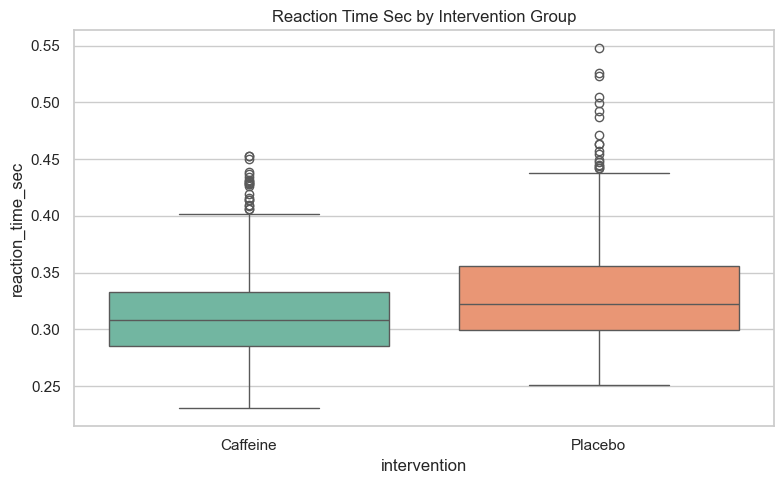


Percent Correct - Caffeine vs Placebo
Mann-Whitney U test: U = 40849.000, p = 0.6795 Anlamlı fark yok


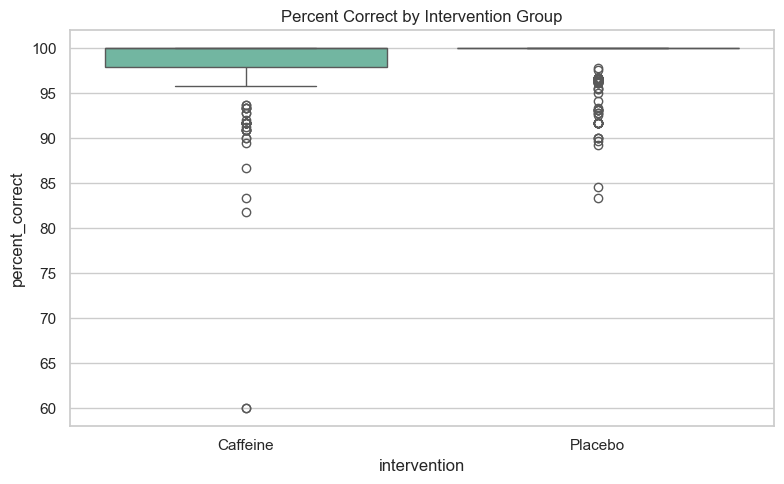


Time Point = PRE
Reaction Time Sec (Caffeine vs Placebo): p = 0.2368


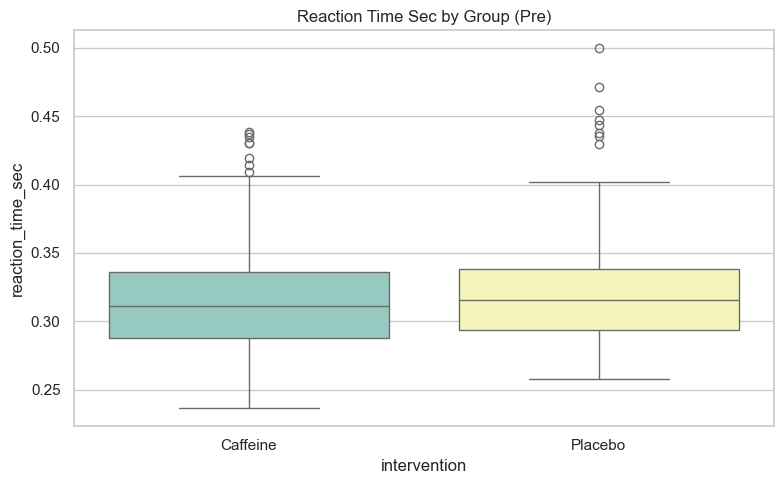

Percent Correct (Caffeine vs Placebo): p = 0.9566


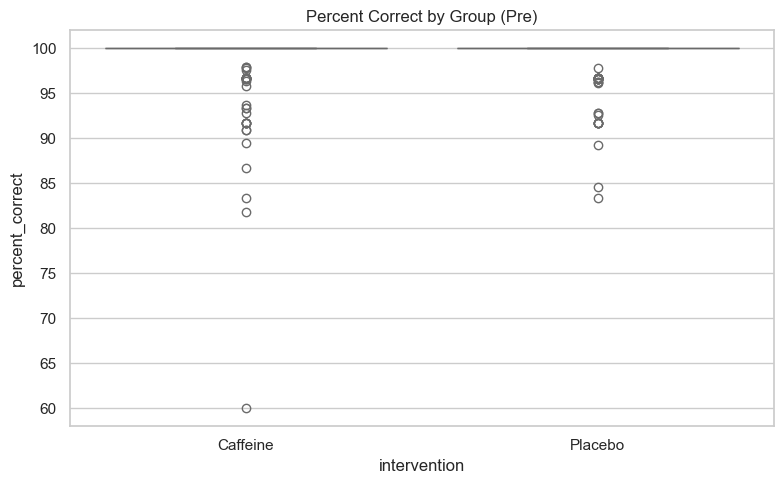


Time Point = POST
Reaction Time Sec (Caffeine vs Placebo): p = 0.0000


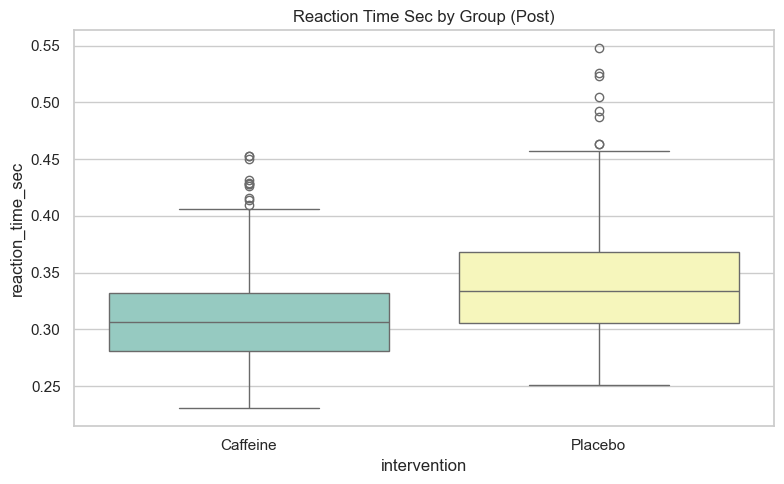

Percent Correct (Caffeine vs Placebo): p = 0.6497


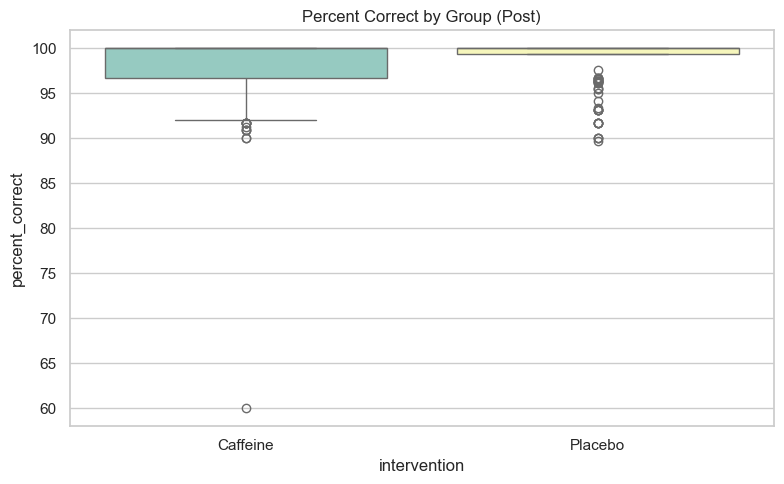

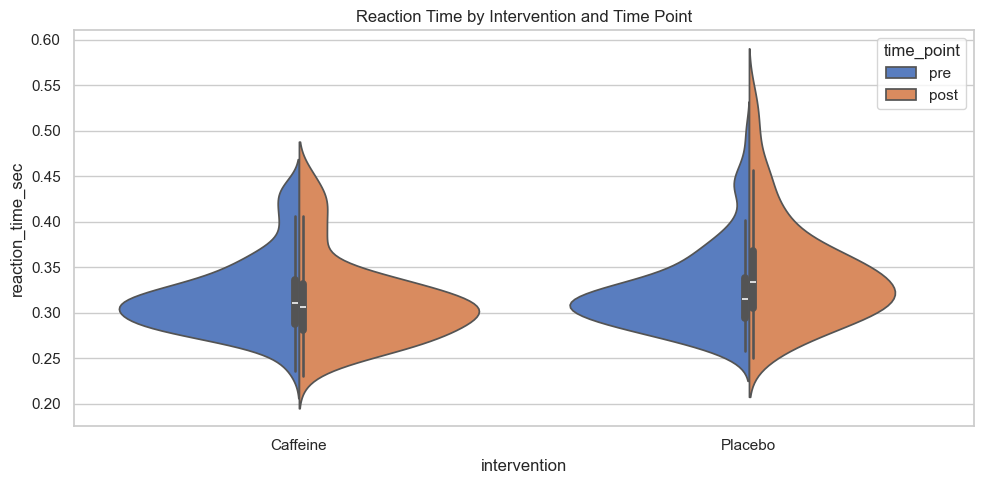

In [93]:
# 3. Sütun isimlerini sadeleştir
# Sütunları açıkça yeniden adlandır
df.rename(columns={
    'Participant': 'participant',
    'Intervention': 'intervention',
    'Trial (1/2)': 'trial',
    'Time Point(pre/post)': 'time_point',
    'Condition (Endogenous/Exogenous)': 'condition',
    'Cue Type (valid/invalid/neutral)': 'cue_type',
    'Reaction Time (sec)': 'reaction_time_sec',
    '% Correct': 'percent_correct'
}, inplace=True)


# 4. Temel karşılaştırmalar: Reaction Time & % Correct
metrics = ["reaction_time_sec", "percent_correct"]
group = "intervention"

# 5. Genel analiz (tüm veride Caffeine vs Placebo)
for metric in metrics:
    group1 = df[df[group] == "Caffeine"][metric]
    group2 = df[df[group] == "Placebo"][metric]
    
    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
    print(f"\n{metric.replace('_', ' ').title()} - Caffeine vs Placebo")
    print(f"Mann-Whitney U test: U = {stat:.3f}, p = {p:.4f} {'Anlamlı fark' if p < 0.05 else 'Anlamlı fark yok'}")

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=group, y=metric, palette="Set2")
    plt.title(f"{metric.replace('_', ' ').title()} by Intervention Group")
    plt.tight_layout()
    plt.show()

# 6. Pre vs Post analiz (her grup içinde ayrıca)
for timepoint in ["pre", "post"]:
    print(f"\nTime Point = {timepoint.upper()}")

    sub = df[df["time_point"] == timepoint]

    for metric in metrics:
        g1 = sub[sub[group] == "Caffeine"][metric]
        g2 = sub[sub[group] == "Placebo"][metric]
        stat, p = mannwhitneyu(g1, g2, alternative="two-sided")
        print(f"{metric.replace('_', ' ').title()} (Caffeine vs Placebo): p = {p:.4f}")

        plt.figure(figsize=(8, 5))
        sns.boxplot(data=sub, x=group, y=metric, palette="Set3")
        plt.title(f"{metric.replace('_', ' ').title()} by Group ({timepoint.title()})")
        plt.tight_layout()
        plt.show()

# 7. İsteğe bağlı: Reaction Time dağılımı violinplot
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="intervention", y="reaction_time_sec", hue="time_point", split=True, palette="muted")
plt.title("Reaction Time by Intervention and Time Point")
plt.tight_layout()
plt.show()


Outlier count per feature:
 Trial (1/2)            0
Reaction Time (sec)    7
% Correct              7
dtype: int64


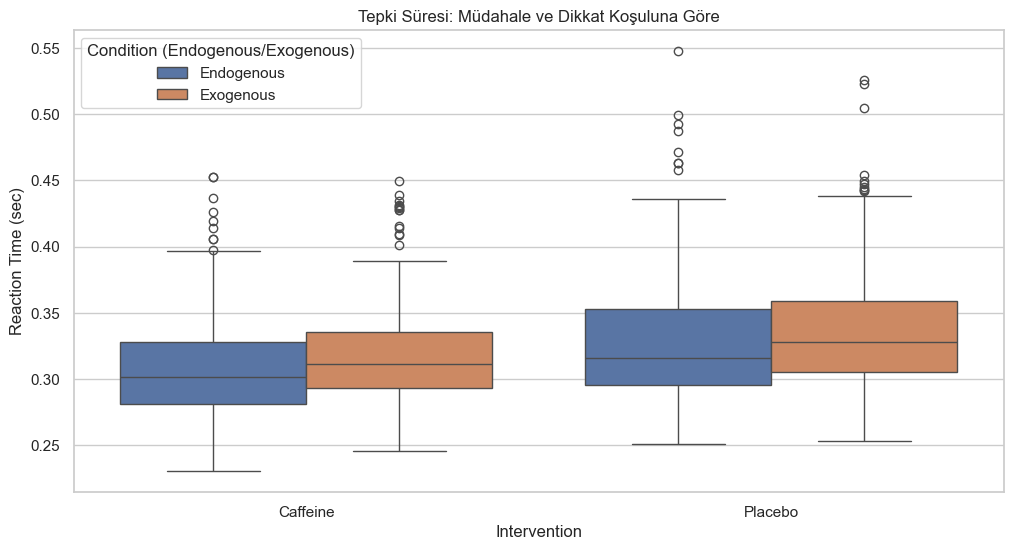

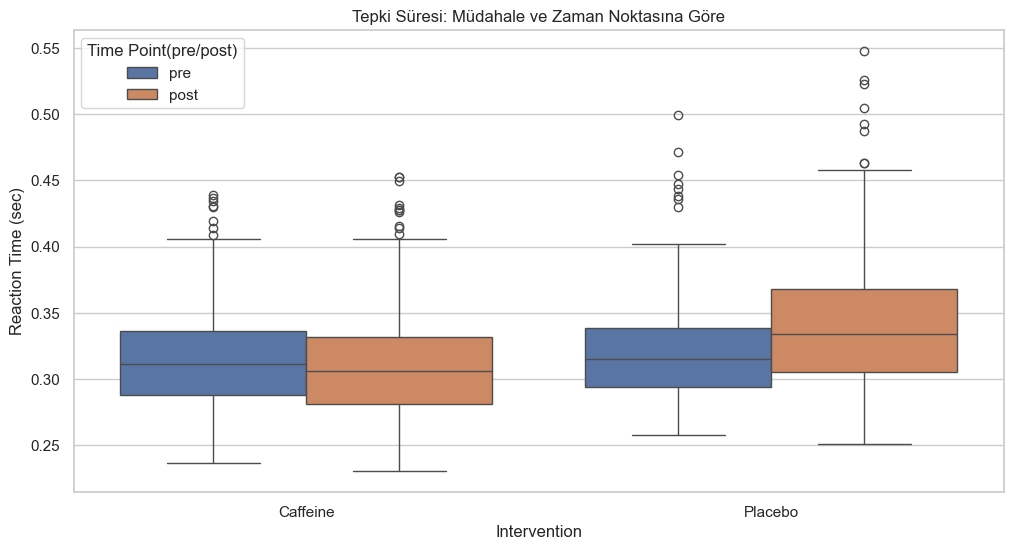


Paired t-test Results (pre vs post):
     Condition Intervention   p_value Significant
0  Endogenous     Caffeine  0.810419          No
1  Endogenous      Placebo  0.000285         Yes
2   Exogenous     Caffeine  0.234805          No
3   Exogenous      Placebo  0.000007         Yes


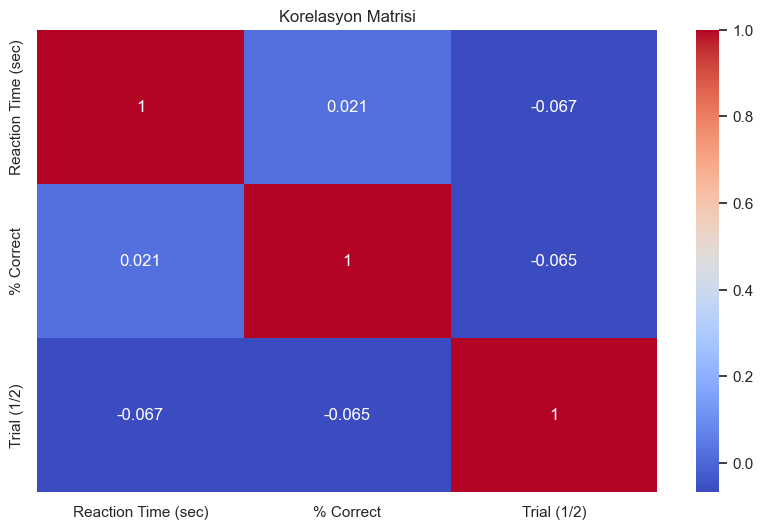

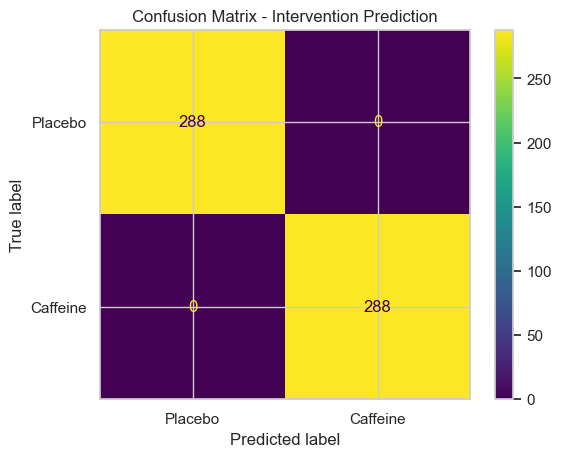


Classification Report:
              precision    recall  f1-score   support

     Placebo       1.00      1.00      1.00       288
    Caffeine       1.00      1.00      1.00       288

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_rel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. VERİYİ YÜKLE VE BİRLEŞTİR ---
s1 = pd.read_excel("S1Dataset.XLSX")
s2 = pd.read_excel("S2Dataset.XLSX")
s1["Dataset"] = "S1"
s2["Dataset"] = "S2"
df = pd.concat([s1, s2], ignore_index=True)

# --- 2. KATEGORİK SÜTUNLARI ENCODE ET ---
df_encoded = df.copy()
df_encoded["Intervention"] = df_encoded["Intervention"].map({"Placebo": 0, "Caffeine": 1})
df_encoded["Time Point(pre/post)"] = df_encoded["Time Point(pre/post)"].map({"pre": 0, "post": 1})
df_encoded["Condition (Endogenous/Exogenous)"] = df_encoded["Condition (Endogenous/Exogenous)"].map({"Endogenous": 1, "Exogenous": 0})
df_encoded["Cue Type (valid/invalid/neutral)"] = df_encoded["Cue Type (valid/invalid/neutral)"].map({"valid": 0, "invalid": 1, "neutral": 2})
df_encoded["Dataset"] = df_encoded["Dataset"].map({"S1": 1, "S2": 2})

# --- 3. NUMERİK VERİLERİ NORMALİZE ET ---
num_cols = ["Trial (1/2)", "Reaction Time (sec)", "% Correct"]
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# --- 4. AYKIRI DEĞER ANALİZİ (Z-Score) ---
outliers = (np.abs(df_encoded[num_cols]) > 3).sum()
print("Outlier count per feature:\n", outliers)

# --- 5. BOX PLOT: Tepki Süresi vs Müdahale vs Koşul ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Intervention", y="Reaction Time (sec)", hue="Condition (Endogenous/Exogenous)")
plt.title("Tepki Süresi: Müdahale ve Dikkat Koşuluna Göre")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Intervention", y="Reaction Time (sec)", hue="Time Point(pre/post)")
plt.title("Tepki Süresi: Müdahale ve Zaman Noktasına Göre")
plt.show()

# --- 6. Paired t-test: pre vs post ---
results = []
for condition in df["Condition (Endogenous/Exogenous)"].unique():
    for inter in df["Intervention"].unique():
        subset = df[(df["Condition (Endogenous/Exogenous)"] == condition) &
                    (df["Intervention"] == inter)]
        pre = subset[subset["Time Point(pre/post)"] == "pre"]["Reaction Time (sec)"]
        post = subset[subset["Time Point(pre/post)"] == "post"]["Reaction Time (sec)"]
        if len(pre) == len(post):
            stat, p = ttest_rel(post.values, pre.values)
            results.append({
                "Condition": condition,
                "Intervention": inter,
                "p_value": p,
                "Significant": "Yes" if p < 0.05 else "No"
            })

results_df = pd.DataFrame(results)
print("\nPaired t-test Results (pre vs post):\n", results_df)

# --- 7. Korelasyon Matrisi ---
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[["Reaction Time (sec)", "% Correct", "Trial (1/2)"]].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

# --- 8. Random Forest ile Müdahale Tahmini (Caffeine / Placebo) ---
features = ["Trial (1/2)", "Reaction Time (sec)", "% Correct",
            "Time Point(pre/post)", "Condition (Endogenous/Exogenous)",
            "Cue Type (valid/invalid/neutral)", "Dataset"]
X = df_encoded[features]
y = df_encoded["Intervention"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(X)

# Confusion Matrix + Classification Report
ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=["Placebo", "Caffeine"])
plt.title("Confusion Matrix - Intervention Prediction")
plt.show()

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=["Placebo", "Caffeine"]))


In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
    HistGradientBoostingRegressor, BaggingRegressor, StackingRegressor
)
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Veri Hazırlama ---
s1 = pd.read_excel("S1Dataset.XLSX")
s2 = pd.read_excel("S2Dataset.XLSX")
s1["Dataset"] = "S1"
s2["Dataset"] = "S2"
df = pd.concat([s1, s2], ignore_index=True)

# Encode
df["Intervention"] = df["Intervention"].map({"Placebo": 0, "Caffeine": 1})
df["Time Point(pre/post)"] = df["Time Point(pre/post)"].map({"pre": 0, "post": 1})
df["Condition (Endogenous/Exogenous)"] = df["Condition (Endogenous/Exogenous)"].map({"Endogenous": 1, "Exogenous": 0})
df["Cue Type (valid/invalid/neutral)"] = df["Cue Type (valid/invalid/neutral)"].map({"valid": 0, "invalid": 1, "neutral": 2})
df["Dataset"] = df["Dataset"].map({"S1": 1, "S2": 2})

# Feature engineering
df["Intervention*Condition"] = df["Intervention"] * df["Condition (Endogenous/Exogenous)"]
df["Time*Condition"] = df["Time Point(pre/post)"] * df["Condition (Endogenous/Exogenous)"]

X = df.drop(columns=["Reaction Time (sec)", "Participant"])
y = df["Reaction Time (sec)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçekleyici
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Tanımları ---
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "HuberRegressor": HuberRegressor(),
}

# --- Sonuçları topla ---
results = []

# Normal modelleri sırayla eğit
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    })

# --- Özel model 1: GradientBoosting + PolyFeatures + log target ---
poly_pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("reg", GradientBoostingRegressor(random_state=42))
])
tt_model = TransformedTargetRegressor(
    regressor=poly_pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)
tt_model.fit(X_train, y_train)
y_pred_tt = tt_model.predict(X_test)
results.append({
    "Model": "GB + Poly + logTarget",
    "MAE": mean_absolute_error(y_test, y_pred_tt),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_tt)),
    "R2": r2_score(y_test, y_pred_tt)
})

# --- Özel model 2: StackingRegressor (Ridge + SVR ➝ GB) ---
stacking_model = StackingRegressor(
    estimators=[
        ("ridge", Ridge()),
        ("svr", SVR())
    ],
    final_estimator=GradientBoostingRegressor(random_state=42)
)
stacking_model.fit(X_train_scaled, y_train)
stack_pred = stacking_model.predict(X_test_scaled)
results.append({
    "Model": "Stacking(Ridge+SVR→GB)",
    "MAE": mean_absolute_error(y_test, stack_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, stack_pred)),
    "R2": r2_score(y_test, stack_pred)
})

# --- Sonuçları göster ---
results_df = pd.DataFrame(results).sort_values("R2", ascending=False)
print(results_df)


                     Model       MAE      RMSE        R2
10    HistGradientBoosting  0.034343  0.049193  0.175240
13   GB + Poly + logTarget  0.035267  0.049845  0.153229
9         GradientBoosting  0.036346  0.050581  0.128064
5                      KNN  0.037527  0.051477  0.096897
1                    Ridge  0.038803  0.051777  0.086333
0         LinearRegression  0.038815  0.051784  0.086070
14  Stacking(Ridge+SVR→GB)  0.037523  0.052863  0.047613
12          HuberRegressor  0.037743  0.053748  0.015453
2                    Lasso  0.038843  0.054361 -0.007155
3               ElasticNet  0.038843  0.054361 -0.007155
11                 Bagging  0.041656  0.057463 -0.125351
7             RandomForest  0.041353  0.057804 -0.138746
4                      SVR  0.049830  0.058211 -0.154869
8               ExtraTrees  0.045496  0.064121 -0.401264
6             DecisionTree  0.046698  0.066742 -0.518160


In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regressors
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet,
                                  HuberRegressor, TheilSenRegressor, PassiveAggressiveRegressor, SGDRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
                              HistGradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor,
                              StackingRegressor)
from sklearn.neural_network import MLPRegressor

# --- Veri Yükle ve Birleştir ---
s1 = pd.read_excel("S1Dataset.XLSX")
s2 = pd.read_excel("S2Dataset.XLSX")
s1["Dataset"] = "S1"
s2["Dataset"] = "S2"
df = pd.concat([s1, s2], ignore_index=True)

# Encode
df["Intervention"] = df["Intervention"].map({"Placebo": 0, "Caffeine": 1})
df["Time Point(pre/post)"] = df["Time Point(pre/post)"].map({"pre": 0, "post": 1})
df["Condition (Endogenous/Exogenous)"] = df["Condition (Endogenous/Exogenous)"].map({"Endogenous": 1, "Exogenous": 0})
df["Dataset"] = df["Dataset"].map({"S1": 1, "S2": 2})

# Feature Engineering
df["Intervention*Time"] = df["Intervention"] * df["Time Point(pre/post)"]
df["Intervention*Condition"] = df["Intervention"] * df["Condition (Endogenous/Exogenous)"]
df["Time*Condition"] = df["Time Point(pre/post)"] * df["Condition (Endogenous/Exogenous)"]
df["Trial_squared"] = df["Trial (1/2)"] ** 2
df["All_combo"] = df["Intervention"] * df["Time Point(pre/post)"] * df["Condition (Endogenous/Exogenous)"]
df["Participant_Avg_RT"] = df.groupby("Participant")["Reaction Time (sec)"].transform("mean")

# Özellikler
X = df.drop(columns=["Reaction Time (sec)", "Participant"])
y = df["Reaction Time (sec)"]

# Kategorik/Numerik ayrımı
categorical_cols = ["Cue Type (valid/invalid/neutral)"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model listesi
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "HuberRegressor": HuberRegressor(),
    "TheilSen": TheilSenRegressor(),
    "PassiveAggressive": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3),
    "SGD": SGDRegressor(max_iter=1000, tol=1e-3),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees": ExtraTreesRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor(),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)
}

# Sonuçları topla
results = []

# Tüm modelleri sırayla eğit
for name, model in models.items():
    pipe = Pipeline([
        ("pre", preprocessor),
        ("reg", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    })

# GB + Poly + FE modeli (ayrıca)
poly_pipe = Pipeline([
    ("pre", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("reg", GradientBoostingRegressor())
])
poly_pipe.fit(X_train, y_train)
y_pred_poly = poly_pipe.predict(X_test)
results.append({
    "Model": "GB + Poly + FE",
    "MAE": mean_absolute_error(y_test, y_pred_poly),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_poly)),
    "R2": r2_score(y_test, y_pred_poly)
})

# Stacking modeli
stack = StackingRegressor(
    estimators=[
        ("ridge", Ridge()),
        ("svr", SVR())
    ],
    final_estimator=GradientBoostingRegressor()
)
stack_pipe = Pipeline([
    ("pre", preprocessor),
    ("reg", stack)
])
stack_pipe.fit(X_train, y_train)
y_pred_stack = stack_pipe.predict(X_test)
results.append({
    "Model": "Stacking(Ridge+SVR→GB)",
    "MAE": mean_absolute_error(y_test, y_pred_stack),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_stack)),
    "R2": r2_score(y_test, y_pred_stack)
})

# Sonuçları yazdır
results_df = pd.DataFrame(results).sort_values("R2", ascending=False)
print(results_df)


                     Model       MAE      RMSE        R2
11            RandomForest  0.023189  0.030477  0.683434
18          GB + Poly + FE  0.023651  0.031031  0.671814
16                 Bagging  0.024537  0.031596  0.659771
14    HistGradientBoosting  0.025085  0.031701  0.657497
13        GradientBoosting  0.024909  0.033738  0.612061
15                AdaBoost  0.030881  0.036374  0.549074
12              ExtraTrees  0.028534  0.036902  0.535899
19  Stacking(Ridge+SVR→GB)  0.030843  0.039151  0.477603
1                    Ridge  0.033060  0.041383  0.416330
0         LinearRegression  0.033088  0.041427  0.415092
4           HuberRegressor  0.032782  0.041909  0.401415
9                      KNN  0.035231  0.044080  0.337781
10            DecisionTree  0.036852  0.046957  0.248527
6        PassiveAggressive  0.038172  0.047408  0.234013
5                 TheilSen  0.037311  0.048543  0.196898
7                      SGD  0.042798  0.053481  0.025210
8                      SVR  0.0

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Veri yükle
s1 = pd.read_excel("S1Dataset.XLSX")
s2 = pd.read_excel("S2Dataset.XLSX")
s1["Dataset"] = "S1"
s2["Dataset"] = "S2"
df = pd.concat([s1, s2], ignore_index=True)

# Kategorik encode
df["Intervention"] = df["Intervention"].map({"Placebo": 0, "Caffeine": 1})
df["Time Point(pre/post)"] = df["Time Point(pre/post)"].map({"pre": 0, "post": 1})
df["Condition (Endogenous/Exogenous)"] = df["Condition (Endogenous/Exogenous)"].map({"Endogenous": 1, "Exogenous": 0})
df["Cue Type (valid/invalid/neutral)"] = df["Cue Type (valid/invalid/neutral)"].map({"valid": 0, "invalid": 1, "neutral": 2})
df["Dataset"] = df["Dataset"].map({"S1": 1, "S2": 2})

# Etkileşimli feature'lar
df["Intervention*Condition"] = df["Intervention"] * df["Condition (Endogenous/Exogenous)"]
df["Time*Condition"] = df["Time Point(pre/post)"] * df["Condition (Endogenous/Exogenous)"]

# Bağımsız ve bağımlı değişkenler
X = df.drop(columns=["Reaction Time (sec)", "Participant"])
y = df["Reaction Time (sec)"]

# Eğitim/test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gelişmiş pipeline (RobustScaler + PolyFeatures + GB Regressor)
pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("reg", GradientBoostingRegressor(random_state=42))
])

# Target Transformation (log dönüşümü)
tt_model = TransformedTargetRegressor(
    regressor=pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)

# Eğit ve tahmin et
tt_model.fit(X_train, y_train)
y_pred = tt_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== [GradientBoosting + PolyFeatures + log-transformed target] ===")
print("RMSE:", round(rmse, 5))
print("MAE :", round(mae, 5))
print("R²  :", round(r2, 5))

# Alternatif model: StackingRegressor
stacking_model = StackingRegressor(
    estimators=[
        ("ridge", Ridge()),
        ("svr", SVR())
    ],
    final_estimator=GradientBoostingRegressor(random_state=42)
)

stacking_model.fit(X_train, y_train)
stack_pred = stacking_model.predict(X_test)

rmse_s = np.sqrt(mean_squared_error(y_test, stack_pred))
mae_s = mean_absolute_error(y_test, stack_pred)
r2_s = r2_score(y_test, stack_pred)

print("\n=== [StackingRegressor (Ridge + SVR ➝ GB)] ===")
print("RMSE:", round(rmse_s, 5))
print("MAE :", round(mae_s, 5))
print("R²  :", round(r2_s, 5))


=== [GradientBoosting + PolyFeatures + log-transformed target] ===
RMSE: 0.04985
MAE : 0.03527
R²  : 0.15323

=== [StackingRegressor (Ridge + SVR ➝ GB)] ===
RMSE: 0.05315
MAE : 0.03938
R²  : 0.03723


**Tinnitus preprocessing ve training**

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Veri setini yükle
df = pd.read_excel("Caffeine and Tinnitus.xlsx", sheet_name="Caffeine Group")

# 2. Gerekli sütunları seç
selected_columns = [
    'Gender',
    'Age (yrs)',
    'Tinnitus duration (mos)',
    'Tinnitus type',
    'Hearing loss',
    'THI',  
    'Caffeine consumption (mg/day)'  
]
df = df[selected_columns].copy()

# 3. Eksik değerleri at
df = df.dropna()

# 4. Giriş ve hedef ayır
X = df.drop(columns=["Caffeine consumption (mg/day)"])
y = df["Caffeine consumption (mg/day)"]

# 5. Kategorik ve sayısal sütunları ayır
categorical_cols = ['Gender', 'Tinnitus type', 'Hearing loss']
numerical_cols = ['Age (yrs)', 'Tinnitus duration (mos)', 'THI']

# 6. Ön işleme (ColumnTransformer)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# 7. Eğitim/test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Modelleri tanımla
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# 9. Eğitim ve değerlendirme
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

# 10. Sonuçları yazdır
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


               Model    MAE   RMSE     R2
4                SVR  33.27  41.25 -0.047
0  Linear Regression  31.01  51.57 -0.636
1   Ridge Regression  32.88  52.34 -0.685
6      MLP Regressor  51.27  57.03 -1.000
2      Random Forest  65.20  79.43 -2.881
5                KNN  73.23  90.70 -4.060
3  Gradient Boosting  72.84  94.81 -4.529


/Users/ecederya/PycharmProjects/476_project/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
len(X_train)

32

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# VERİYİ YÜKLE
auq = pd.read_csv("AUQ_J.csv")
cdq = pd.read_csv("CDQ_J.csv")
diet = pd.read_csv("DR1TOT_J.csv")

# SEÇİLEN SÜTUNLAR
selected_auq_cols = ['SEQN', 'AUQ380']
selected_cdq_cols = ['SEQN', 'CDQ001', 'CDQ008']
selected_diet_cols = ['SEQN', 'DR1TCAFF']

# SÜTUNLARI AL
auq = auq[selected_auq_cols]
cdq = cdq[selected_cdq_cols]
diet = diet[selected_diet_cols]

# BİRLEŞTİR
df = auq.merge(cdq, on="SEQN").merge(diet, on="SEQN")
df = df.dropna()

# GİRİŞ VE HEDEF AYIR
X = df.drop(columns=["SEQN", "DR1TCAFF"])
y = df["DR1TCAFF"]

# STANDARTLAŞTIR
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# EĞİTİM/TEST AYIR
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MODELLER
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# EĞİT VE DEĞERLENDİR
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

# SONUÇLAR
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


               Model     MAE    RMSE     R2
4                SVR   98.87  128.13 -0.022
5                KNN   96.41  130.62 -0.061
0  Linear Regression  111.18  131.85 -0.082
1   Ridge Regression  111.18  131.86 -0.082
3  Gradient Boosting  115.89  135.83 -0.148
2      Random Forest  116.59  136.84 -0.165
6      MLP Regressor  102.23  142.17 -0.258


/Users/ecederya/PycharmProjects/476_project/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
import pandas as pd

# AUQ ve CDQ verilerini oku
df_auq = pd.read_csv("AUQ_J.csv")
df_cdq = pd.read_csv("CDQ_J.csv")
df_dr1 = pd.read_csv("DR1TOT_J.csv")

# SEQN sütunlarını bir kez tut
df_auq = df_auq.loc[:, ~df_auq.columns.duplicated()]
df_cdq = df_cdq.loc[:, ~df_cdq.columns.duplicated()]

# Eksik oranı %20'den düşük olan sütunları seç
auq_missing = df_auq.isna().mean()
cdq_missing = df_cdq.isna().mean()

auq_valid_cols = auq_missing[auq_missing < 0.2].index.tolist()
cdq_valid_cols = cdq_missing[cdq_missing < 0.2].index.tolist()

# SEQN eklenip veriler daraltılır
df_auq_clean = df_auq[["SEQN"] + [col for col in auq_valid_cols if col != "SEQN"]]
df_cdq_clean = df_cdq[["SEQN"] + [col for col in cdq_valid_cols if col != "SEQN"]]

# Birleştirme
df_merged = df_auq_clean.merge(df_cdq_clean, on="SEQN", how="inner")
df_merged = df_merged.merge(df_dr1[["SEQN", "DR1TCAFF"]], on="SEQN", how="inner")

# Eksik kafein verisi olanları at ve tüm satırdaki eksikleri temizle
df_merged = df_merged.dropna(subset=["DR1TCAFF"])
df_final = df_merged.dropna()

df_final


SEQN  Unnamed: 0_x  AUQ054  Unnamed: 0_y  CDQ001  CDQ010  \
0      93705.0             2     2.0             0     2.0     2.0   
1      93708.0             5     1.0             1     2.0     2.0   
3      93711.0             7     1.0             3     2.0     2.0   
4      93713.0             9     1.0             4     2.0     1.0   
5      93714.0            10     1.0             5     2.0     2.0   
...        ...           ...     ...           ...     ...     ...   
3671  102946.0          8886     3.0          3876     2.0     1.0   
3672  102947.0          8887     4.0          3877     2.0     1.0   
3673  102952.0          8892     1.0          3879     2.0     2.0   
3674  102953.0          8893     1.0          3880     1.0     2.0   
3675  102954.0          8894     2.0          3881     2.0     1.0   

          DR1TCAFF  
0     3.610000e+02  
1     3.300000e+01  
3     3.470000e+02  
4     3.850000e+02  
5     6.000000e+01  
...            ...  
3671  8.100000e+01  
3672  2.120000e+02  
3673  1.300000e+01  
3674  1.130000e+02  
3675  5.397605e-79  

[3312 rows x 7 columns]

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Hedef ve Özellikleri Ayır
target = "DR1TCAFF"
X = df_final.drop(columns=[target, "SEQN"])
y = df_final[target]

# 2. Sütun türlerini ayır
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# 3. Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# 4. Eğitim/Test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modeller
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1500, random_state=42)
}

# 6. Eğitim ve Değerlendirme
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

# 7. Sonuçları Göster
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


               Model     MAE    RMSE     R2
0  Linear Regression  127.46  192.38 -0.002
1   Ridge Regression  127.47  192.44 -0.002
6      MLP Regressor  127.69  193.49 -0.013
4                SVR  117.15  196.65 -0.047
3  Gradient Boosting  131.33  204.01 -0.126
5                KNN  142.94  222.46 -0.339
2      Random Forest  147.43  224.29 -0.362


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# --- 1. VERİLERİ YÜKLE
bpx = pd.read_csv("BPX_I.csv")
caff = pd.read_csv("DR1TOT_I.csv")

# --- 2. GEREKLİ SÜTUNLARI SEÇ
bpx_selected = bpx[["SEQN", "BPXSY1", "BPXDI1", "BPXML1"]]
caff_selected = caff[["SEQN", "DR1TCAFF"]]

# --- 3. BİRLEŞTİR
df = pd.merge(bpx_selected, caff_selected, on="SEQN")

# --- 4. NaN'leri temizle
df_clean = df.dropna()

# --- 5. Giriş-Çıkış Ayır (X, y)
X = df_clean.drop(columns=["SEQN", "DR1TCAFF"])
y = np.log1p(df_clean["DR1TCAFF"])  # log dönüşümü

# --- 6. Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 7. Eğitim/Test böl
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- 8. MODELLER
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# --- 9. EĞİTİM & DEĞERLENDİRME
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    
    # Tahmini tekrar orijinal ölçekte değerlendirmek için: expm1 (inverse of log1p)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

# --- 10. SONUÇLARI GÖSTER
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


               Model     MAE    RMSE     R2
4                SVR   95.51  208.17 -0.035
5                KNN  101.70  217.06 -0.125
3  Gradient Boosting   98.01  217.57 -0.131
2      Random Forest  103.48  217.97 -0.135
6      MLP Regressor   98.42  218.31 -0.138
0  Linear Regression   99.24  219.23 -0.148
1   Ridge Regression   99.24  219.23 -0.148


In [29]:
import pandas as pd

# Dosyaları oku
bpx = pd.read_csv("BPX_I.csv")
caffeine = pd.read_csv("DR1TOT_I.csv")

# Hangi SEQN'ler var?
print("BPX satır sayısı:", len(bpx))
print("Caffeine satır sayısı:", len(caffeine))

# Ortak SEQN'leri bul
common_seqn = pd.merge(bpx[["SEQN"]], caffeine[["SEQN"]], on="SEQN")
print("Ortak SEQN sayısı:", len(common_seqn))

# Seçilen sütunlara bakalım
bp_cols = ["BPXCHR", "BPXML1", "BPXSY1", "BPXDI1"]
bpx_useful = bpx[["SEQN"] + bp_cols]
caffeine_useful = caffeine[["SEQN", "DR1TCAFF"]]

# Merge + dropna
df = pd.merge(bpx_useful, caffeine_useful, on="SEQN")
print("Birleştirilmiş satır sayısı:", len(df))
print("NaN içeren satırlar:", df.isna().sum())

df_clean = df.dropna()
print("NaN atıldıktan sonra kalan satır sayısı:", len(df_clean))


BPX satır sayısı: 9544
Caffeine satır sayısı: 9544
Ortak SEQN sayısı: 9544
Birleştirilmiş satır sayısı: 9544
NaN içeren satırlar: SEQN           0
BPXCHR      7606
BPXML1      2173
BPXSY1      2399
BPXDI1      2399
DR1TCAFF    1217
dtype: int64
NaN atıldıktan sonra kalan satır sayısı: 0


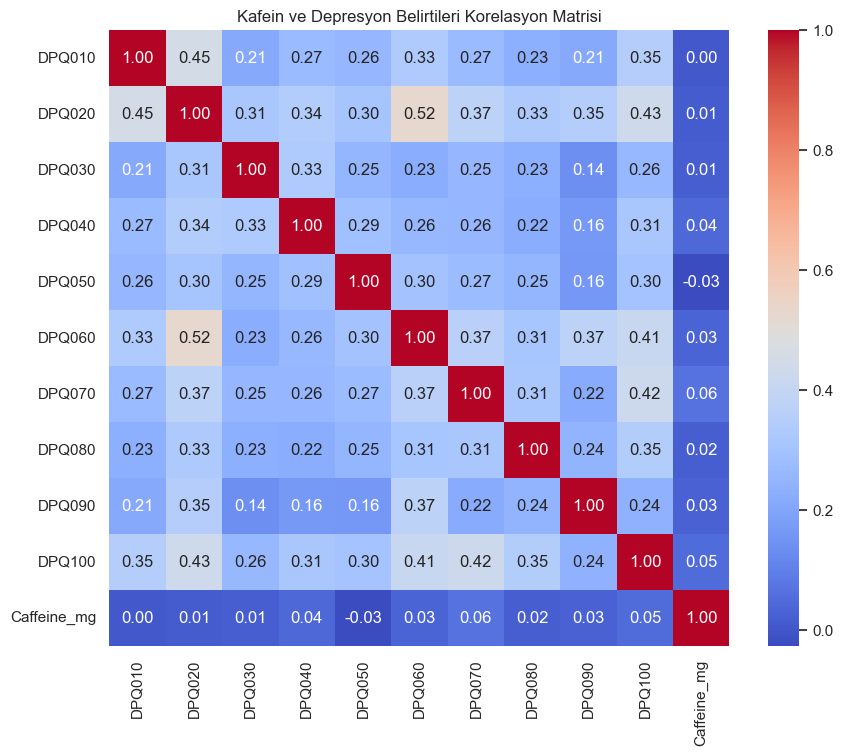

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri dosyalarını yükle
dpq = pd.read_csv("DPQ_J.csv")
caffeine = pd.read_csv("DR1TOT_J.csv")

# SEQN ile birleştir
merged = pd.merge(dpq, caffeine[["SEQN", "DR1TCAFF"]], on="SEQN")

# Kafein sütun adını değiştir
merged.rename(columns={"DR1TCAFF": "Caffeine_mg"}, inplace=True)

# Eksik verileri sil
merged_clean = merged.dropna()

# Korelasyon matrisi (depresyon soruları ile kafein)
corr = merged_clean.drop(columns="SEQN").corr()

# Korelasyon matrisi görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Kafein ve Depresyon Belirtileri Korelasyon Matrisi")
plt.show()


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---- 1. VERİLERİ YÜKLE ----
dpq = pd.read_csv("DPQ_J.csv")
caffeine = pd.read_csv("DR1TOT_J.csv")

# ---- 2. BİRLEŞTİR VE TEMİZLE ----
merged = pd.merge(dpq, caffeine[["SEQN", "DR1TCAFF"]], on="SEQN")
merged.rename(columns={"DR1TCAFF": "Caffeine_mg"}, inplace=True)
merged.dropna(inplace=True)

# ---- 3. HEDEF (y): Depresyon Skoru = DPQ010–DPQ100 Toplamı ----
depression_cols = [f"DPQ{i:03d}" for i in range(10, 101, 10)]
merged["Depression_Score"] = merged[depression_cols].sum(axis=1)

# ---- 4. X ve y ----
X = merged[["Caffeine_mg"]]
y = merged["Depression_Score"]

# ---- 5. ÖLÇEKLEME ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- 6. EĞİTİM/TEST BÖLÜŞTÜR ----
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---- 7. MODELLERİ TANIMLA ----
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(max_iter=500, random_state=42)
}

# ---- 8. EĞİTİM + DEĞERLENDİRME ----
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

# ---- 9. SONUÇ TABLOSU ----
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


               Model   MAE  RMSE     R2
6      MLP Regressor  3.60  4.73  0.004
3  Gradient Boosting  3.60  4.74  0.002
0  Linear Regression  3.61  4.75 -0.000
1   Ridge Regression  3.61  4.75 -0.000
4                SVR  3.39  4.96 -0.091
2      Random Forest  3.69  4.98 -0.102
5                KNN  3.75  5.01 -0.117


-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
**all cause**

In [6]:
from scipy.stats import pearsonr, spearmanr, f_oneway, mannwhitneyu, ttest_ind

# CSV'yi oku
df = pd.read_csv("all-cause.csv")
print(df.info())
print('\nMissing values in each column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12093 entries, 0 to 12092
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       12093 non-null  int64  
 1   Caffeine                   12093 non-null  int64  
 2   Mortstat                   12093 non-null  int64  
 3   Gender                     12093 non-null  int64  
 4   Age                        12093 non-null  int64  
 5   Race                       12093 non-null  int64  
 6   BMI                        12093 non-null  float64
 7   Income                     12093 non-null  int64  
 8   Marrage                    12093 non-null  int64  
 9   Smoke                      12093 non-null  int64  
 10  Alcohol                    12093 non-null  int64  
 11  Cotinine                   12093 non-null  float64
 12  Pb                         12093 non-null  float64
 13  Cd                         12093 non-null  flo

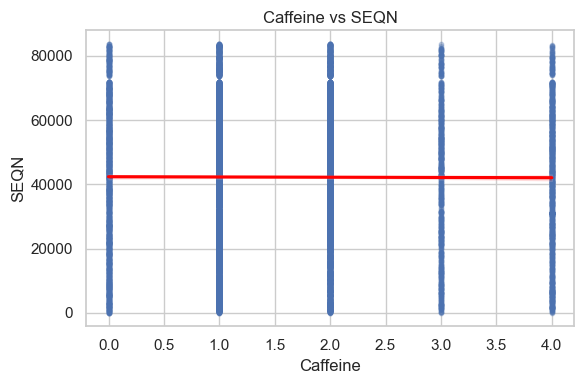

SEQN (Numeric):
  Pearson r = -0.004, p = 0.6803
  Spearman r = 0.004, p = 0.6259



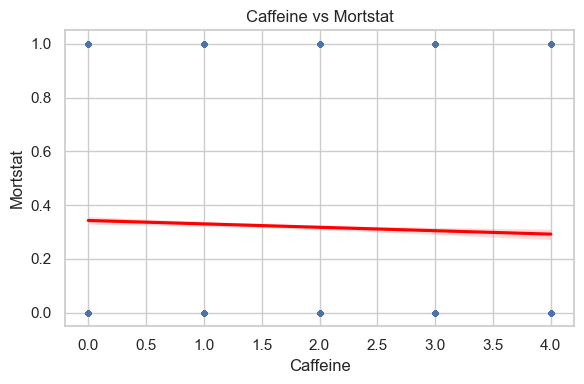

Mortstat (Numeric):
  Pearson r = -0.029, p = 0.0014
  Spearman r = -0.031, p = 0.0006



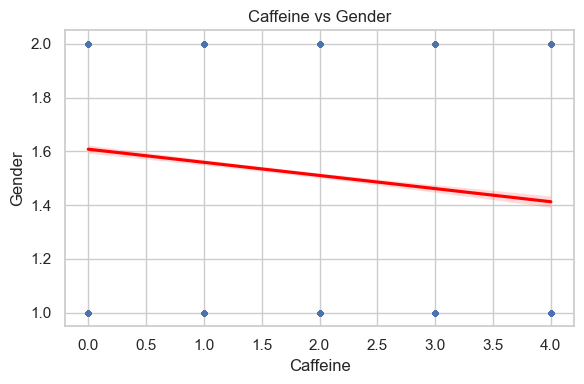

Gender (Numeric):
  Pearson r = -0.105, p = 0.0000
  Spearman r = -0.093, p = 0.0000



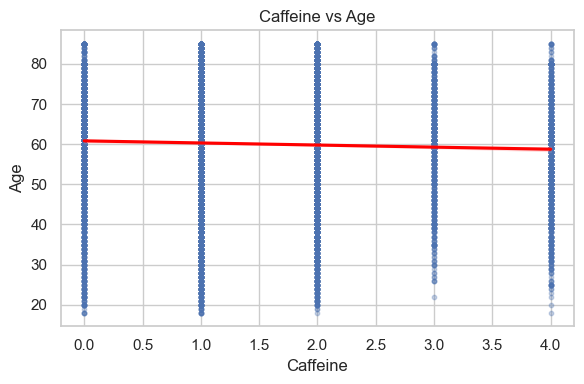

Age (Numeric):
  Pearson r = -0.036, p = 0.0001
  Spearman r = -0.039, p = 0.0000



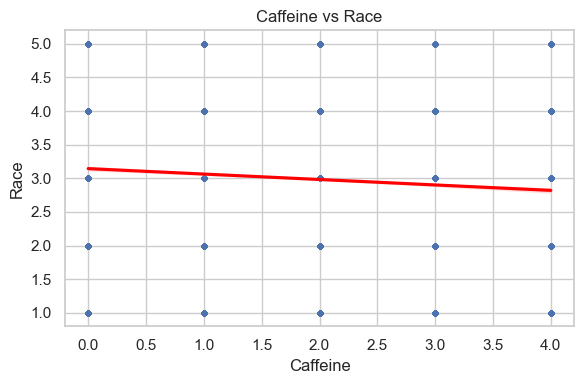

Race (Numeric):
  Pearson r = -0.084, p = 0.0000
  Spearman r = -0.140, p = 0.0000



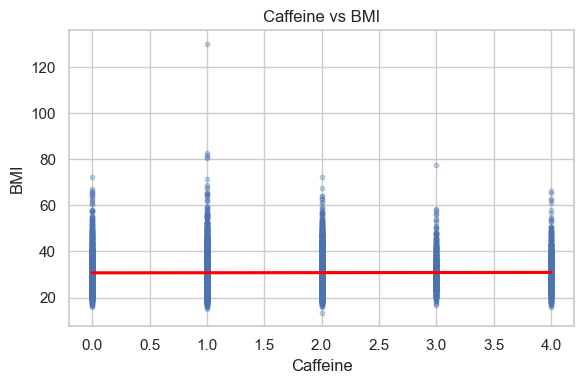

BMI (Numeric):
  Pearson r = 0.007, p = 0.4588
  Spearman r = 0.015, p = 0.1038



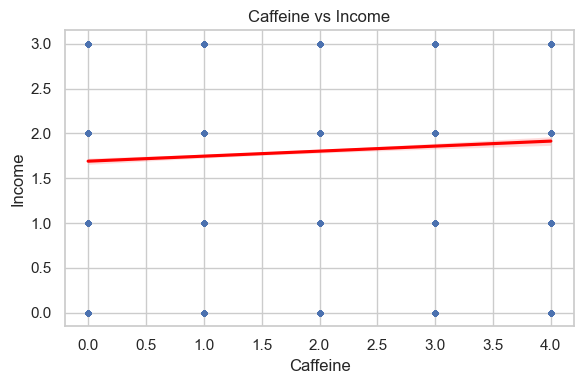

Income (Numeric):
  Pearson r = 0.057, p = 0.0000
  Spearman r = 0.075, p = 0.0000



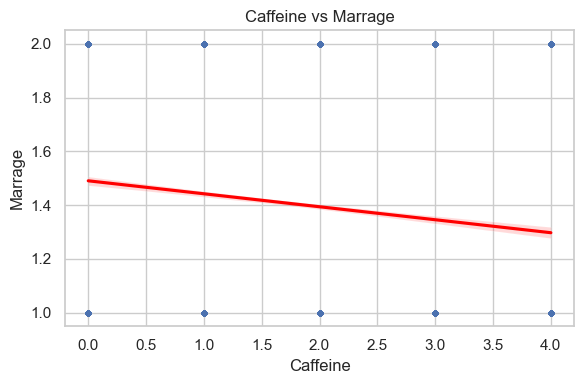

Marrage (Numeric):
  Pearson r = -0.105, p = 0.0000
  Spearman r = -0.109, p = 0.0000



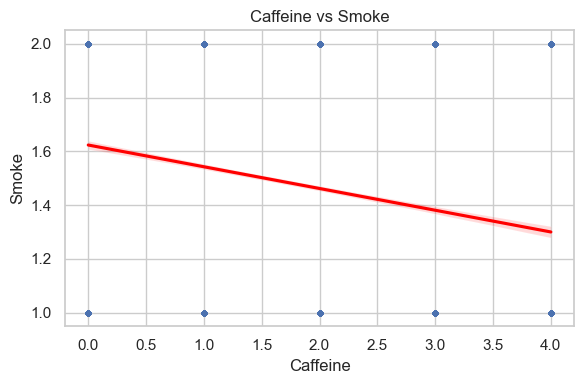

Smoke (Numeric):
  Pearson r = -0.173, p = 0.0000
  Spearman r = -0.163, p = 0.0000



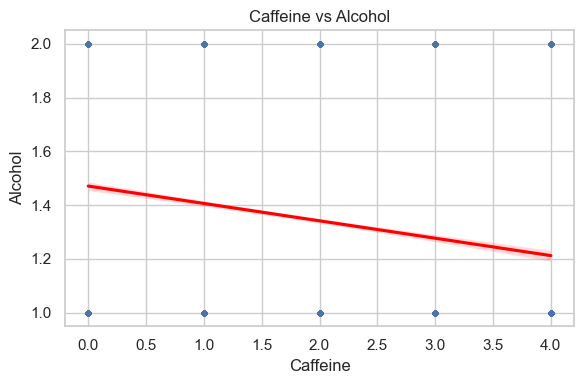

Alcohol (Numeric):
  Pearson r = -0.144, p = 0.0000
  Spearman r = -0.146, p = 0.0000



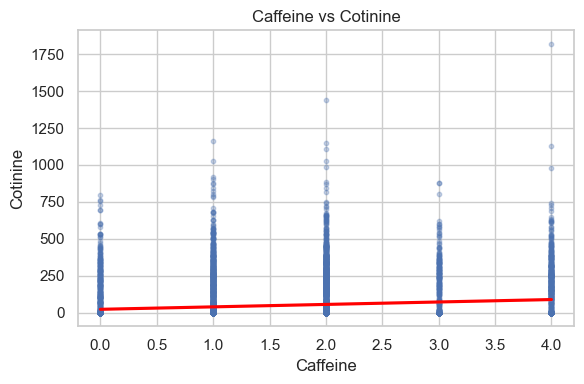

Cotinine (Numeric):
  Pearson r = 0.143, p = 0.0000
  Spearman r = 0.113, p = 0.0000



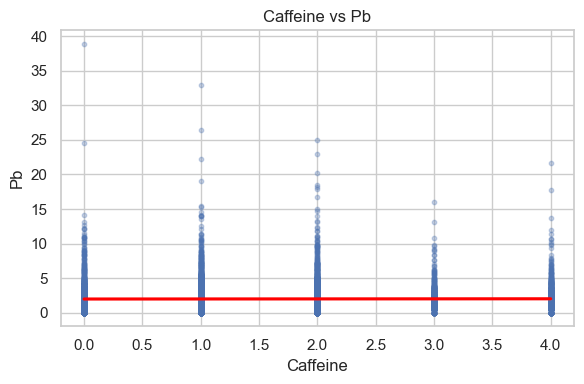

Pb (Numeric):
  Pearson r = 0.005, p = 0.5757
  Spearman r = 0.036, p = 0.0001



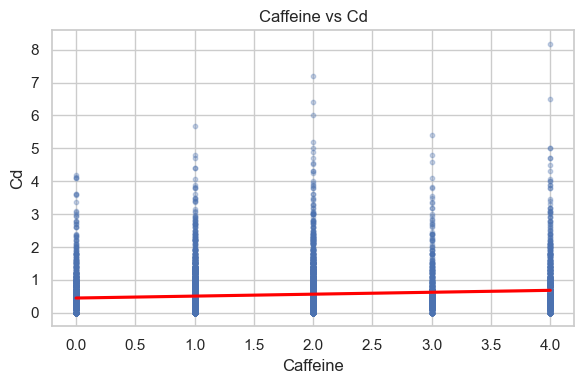

Cd (Numeric):
  Pearson r = 0.113, p = 0.0000
  Spearman r = 0.081, p = 0.0000



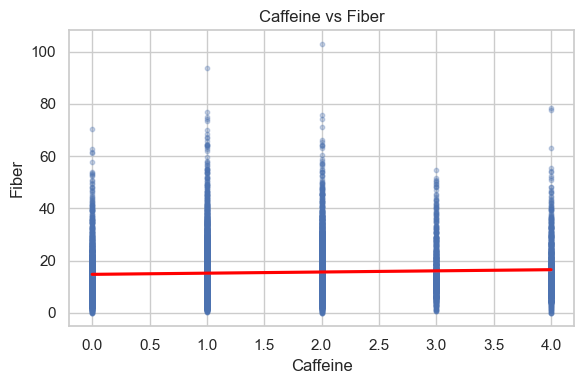

Fiber (Numeric):
  Pearson r = 0.050, p = 0.0000
  Spearman r = 0.065, p = 0.0000



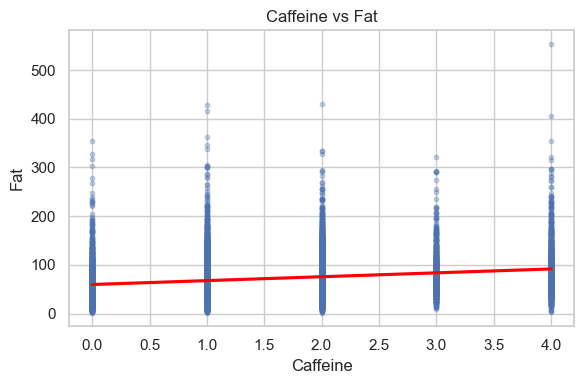

Fat (Numeric):
  Pearson r = 0.198, p = 0.0000
  Spearman r = 0.200, p = 0.0000



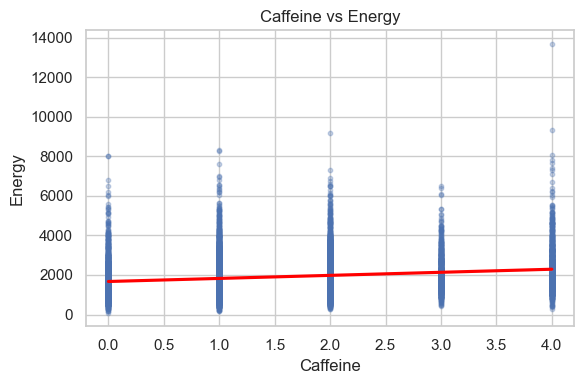

Energy (Numeric):
  Pearson r = 0.181, p = 0.0000
  Spearman r = 0.177, p = 0.0000



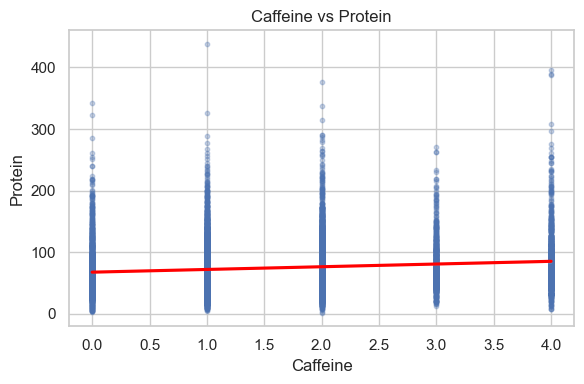

Protein (Numeric):
  Pearson r = 0.122, p = 0.0000
  Spearman r = 0.125, p = 0.0000



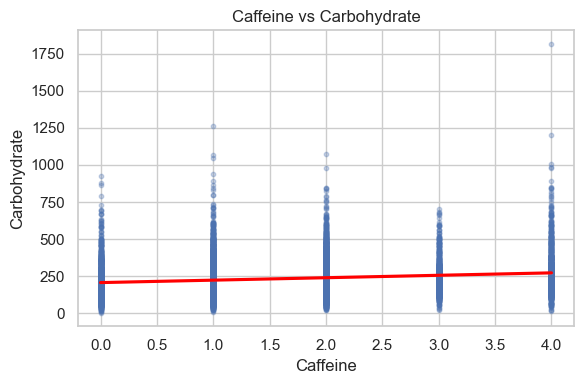

Carbohydrate (Numeric):
  Pearson r = 0.151, p = 0.0000
  Spearman r = 0.133, p = 0.0000



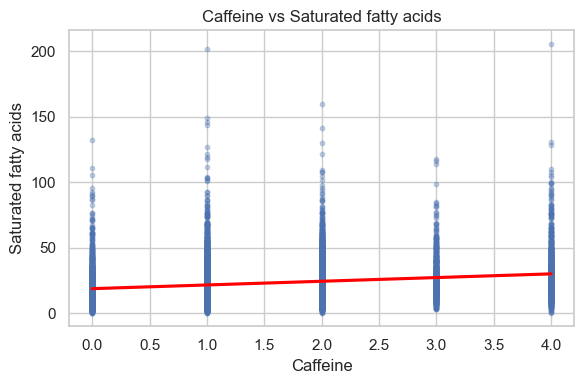

Saturated fatty acids (Numeric):
  Pearson r = 0.197, p = 0.0000
  Spearman r = 0.208, p = 0.0000



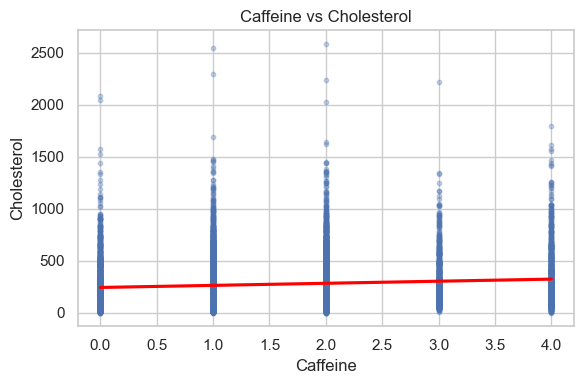

Cholesterol (Numeric):
  Pearson r = 0.096, p = 0.0000
  Spearman r = 0.104, p = 0.0000



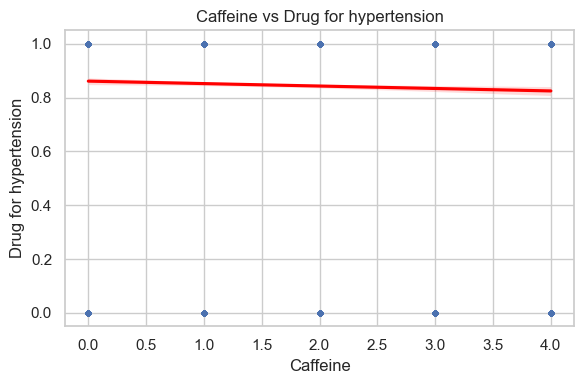

Drug for hypertension (Numeric):
  Pearson r = -0.027, p = 0.0029
  Spearman r = -0.018, p = 0.0480



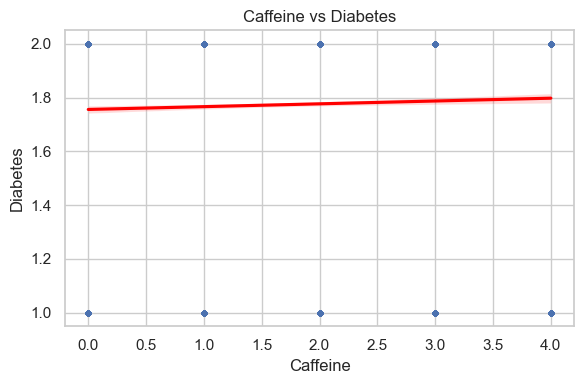

Diabetes (Numeric):
  Pearson r = 0.027, p = 0.0032
  Spearman r = 0.024, p = 0.0089



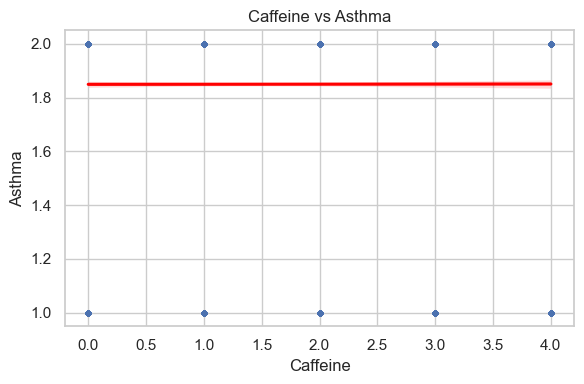

Asthma (Numeric):
  Pearson r = 0.001, p = 0.9160
  Spearman r = 0.004, p = 0.6913



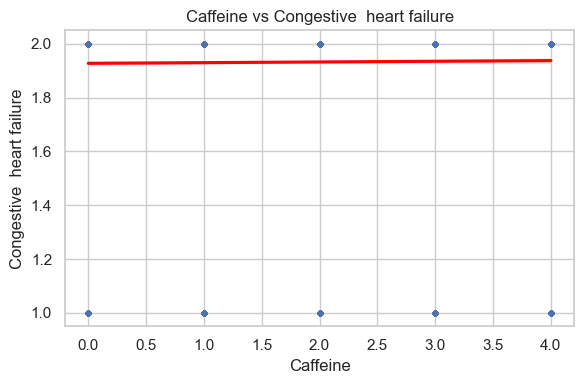

Congestive  heart failure (Numeric):
  Pearson r = 0.011, p = 0.2361
  Spearman r = 0.015, p = 0.0971



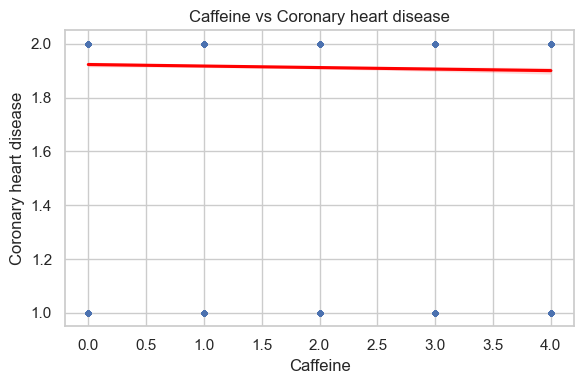

Coronary heart disease (Numeric):
  Pearson r = -0.022, p = 0.0172
  Spearman r = -0.020, p = 0.0264



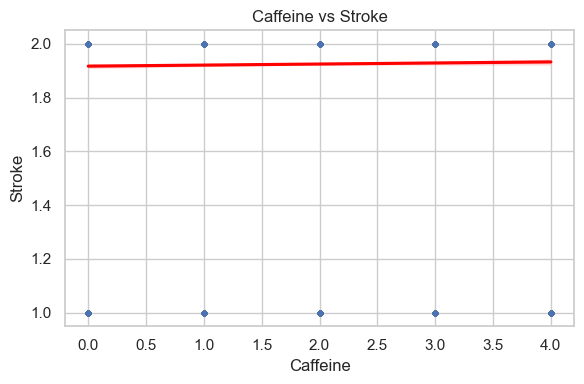

Stroke (Numeric):
  Pearson r = 0.016, p = 0.0820
  Spearman r = 0.019, p = 0.0394



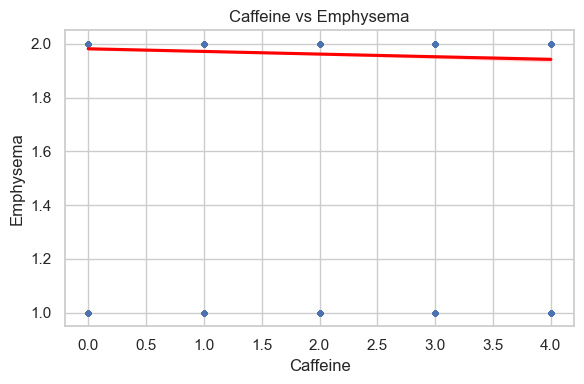

Emphysema (Numeric):
  Pearson r = -0.058, p = 0.0000
  Spearman r = -0.050, p = 0.0000



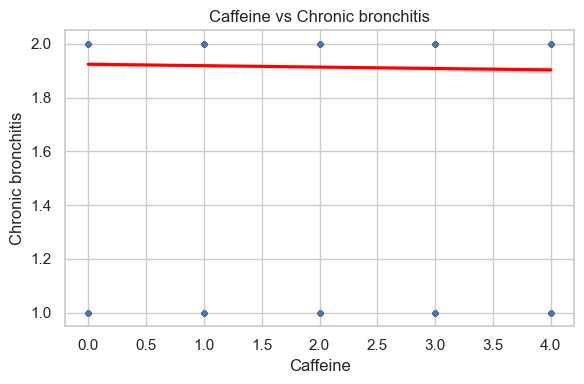

Chronic bronchitis (Numeric):
  Pearson r = -0.020, p = 0.0260
  Spearman r = -0.016, p = 0.0716



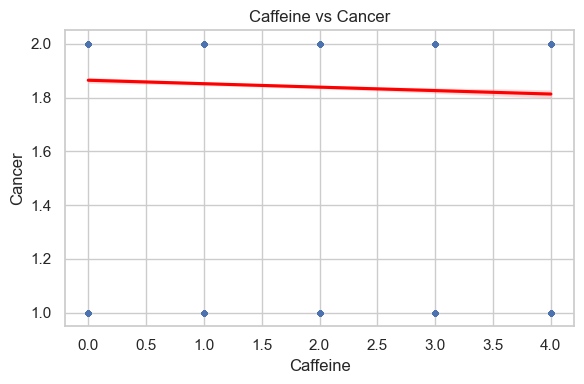

Cancer (Numeric):
  Pearson r = -0.038, p = 0.0000
  Spearman r = -0.045, p = 0.0000



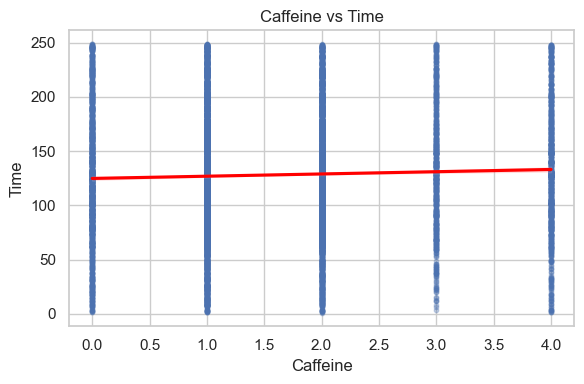

Time (Numeric):
  Pearson r = 0.039, p = 0.0000
  Spearman r = 0.037, p = 0.0000



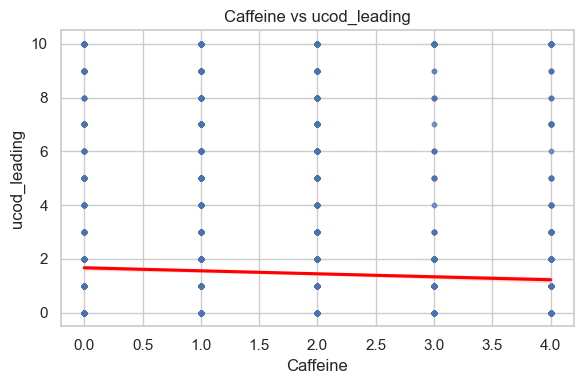

ucod_leading (Numeric):
  Pearson r = -0.040, p = 0.0000
  Spearman r = -0.035, p = 0.0001



In [106]:
sns.set(style="whitegrid")

# 2. Sütunlar
caffeine_col = "Caffeine"
all_columns = df.columns.tolist()
other_columns = [col for col in all_columns if col != caffeine_col]

# 3. Sayısal ve kategorik ayrımı
numeric_cols = df[other_columns].select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = [col for col in other_columns if col not in numeric_cols]

# 4. SAYISAL DEĞİŞKENLER: Korelasyon + regplot
for col in numeric_cols:
    try:
        x = df[caffeine_col]
        y = df[col]
        plt.figure(figsize=(6, 4))
        sns.regplot(x=x, y=y, scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'red'})
        plt.title(f"Caffeine vs {col}")
        plt.xlabel("Caffeine")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

        # Pearson ve Spearman
        r_p, p_p = pearsonr(x, y)
        r_s, p_s = spearmanr(x, y)
        print(f"{col} (Numeric):")
        print(f"  Pearson r = {r_p:.3f}, p = {p_p:.4f}")
        print(f"  Spearman r = {r_s:.3f}, p = {p_s:.4f}\n")

    except Exception as e:
        print(f"{col}: Numeric analiz hatası – {e}")

# 5. KATEGORİK DEĞİŞKENLER: Boxplot + ANOVA / U-test
for col in cat_cols:
    try:
        if df[col].nunique() == 2:
            # Mann-Whitney U Test (binary kategorik)
            groups = [df[df[col] == val][caffeine_col].dropna() for val in df[col].unique()]
            u_stat, p_val = mannwhitneyu(groups[0], groups[1])
            print(f"{col} (Binary): Mann-Whitney U p = {p_val:.4f}")
        elif 2 < df[col].nunique() < 10:
            # ANOVA (çok kategorili)
            groups = [group[caffeine_col].dropna() for name, group in df.groupby(col)]
            stat, p_val = f_oneway(*groups)
            print(f"{col} (Categorical): ANOVA p = {p_val:.4f}")
        else:
            continue  # Çok fazla kategori varsa atla

        # Boxplot
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], y=df[caffeine_col], palette="Set2")
        plt.title(f"Caffeine by {col}")
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"{col}: Kategorik analiz hatası – {e}")


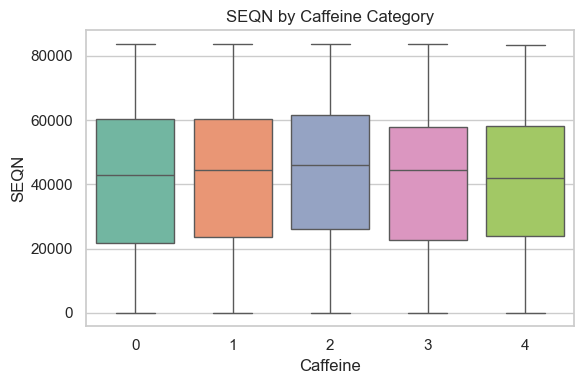

SEQN (Numeric Y, Caffeine categorical): ANOVA p = 0.0001


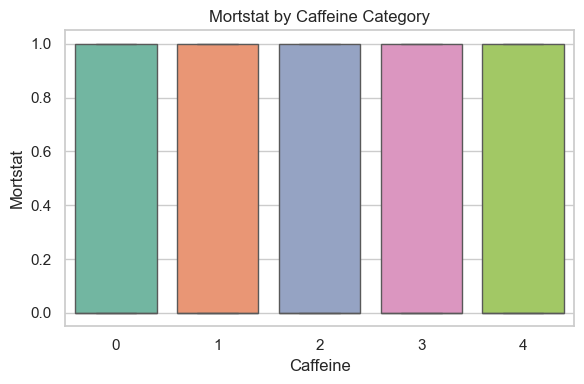

Mortstat (Numeric Y, Caffeine categorical): ANOVA p = 0.0057


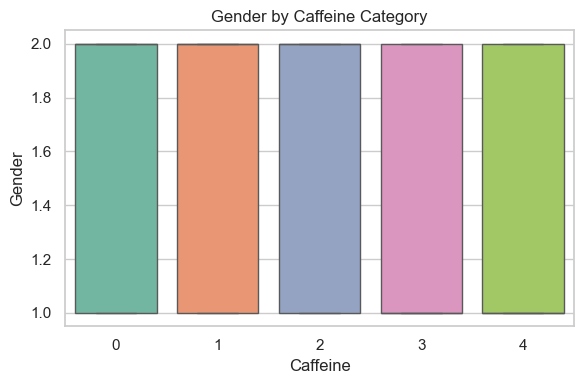

Gender (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


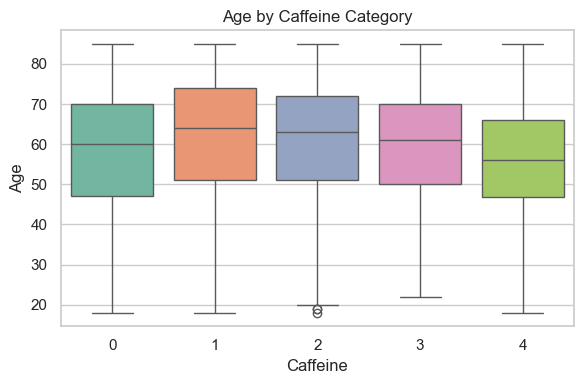

Age (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


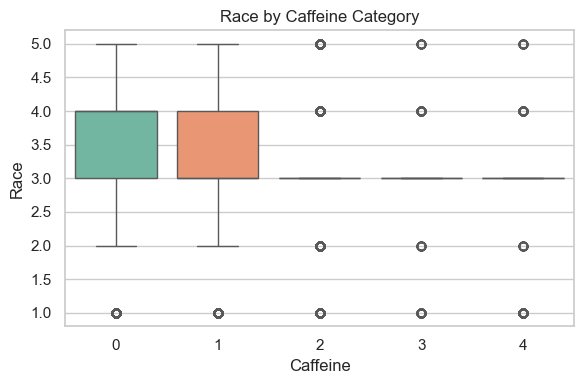

Race (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


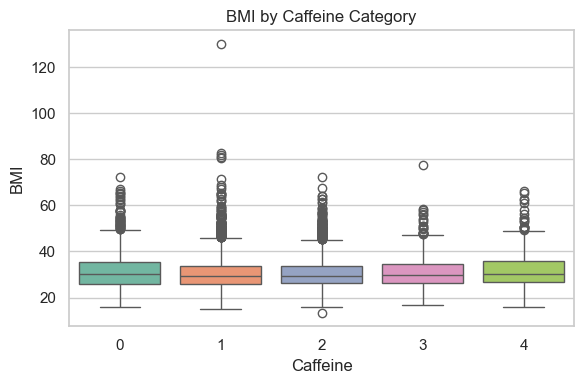

BMI (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


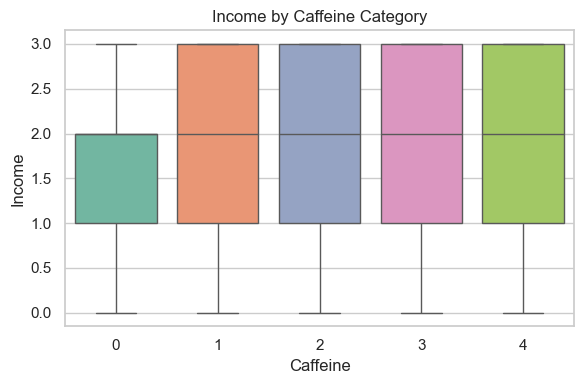

Income (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


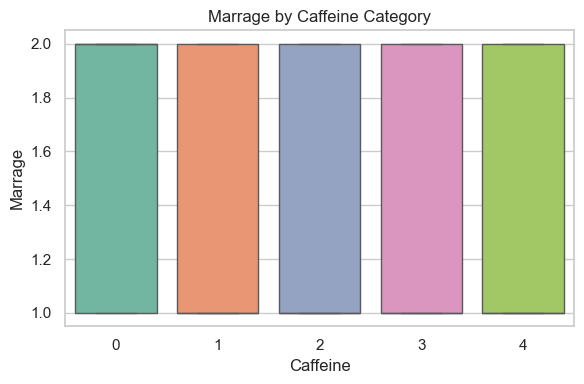

Marrage (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


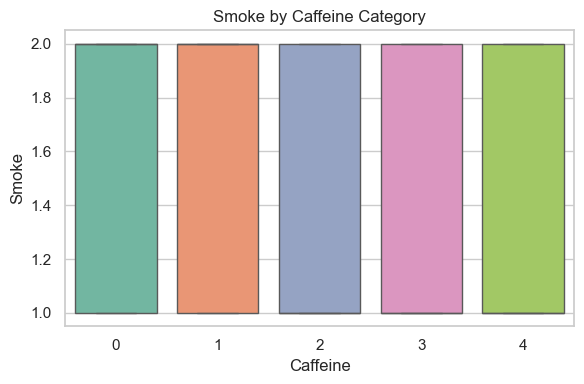

Smoke (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


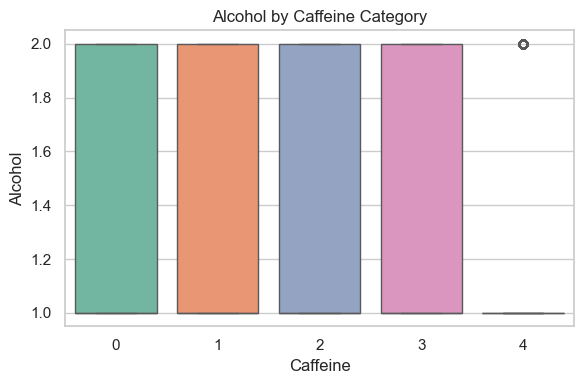

Alcohol (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


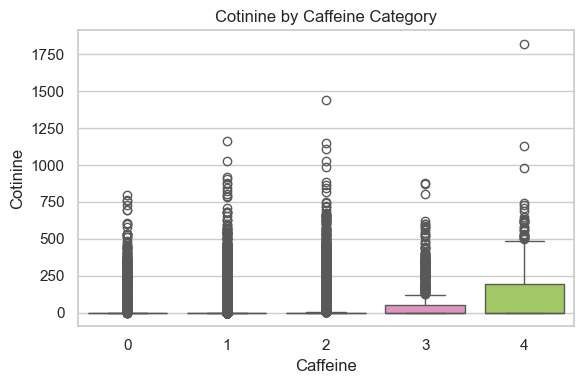

Cotinine (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


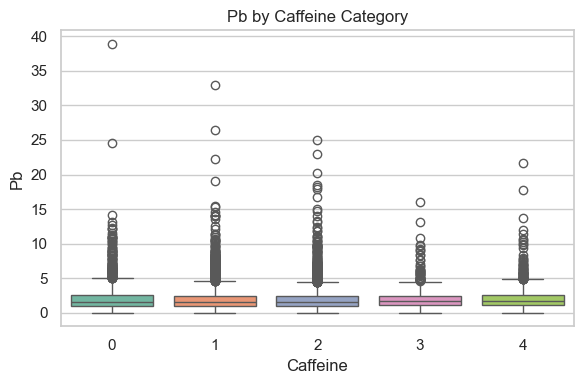

Pb (Numeric Y, Caffeine categorical): ANOVA p = 0.0032


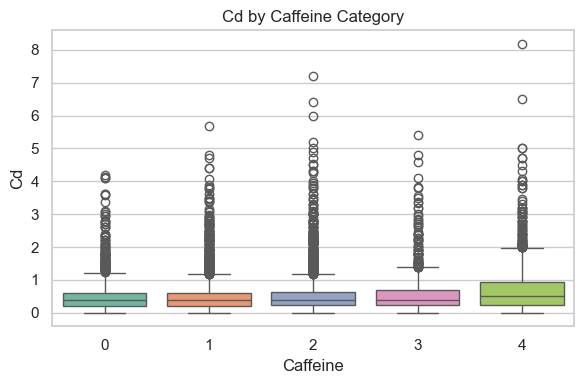

Cd (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


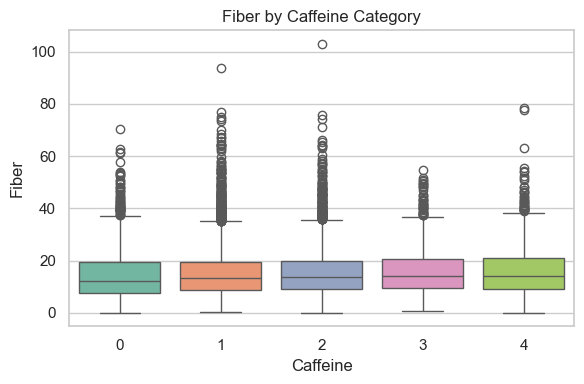

Fiber (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


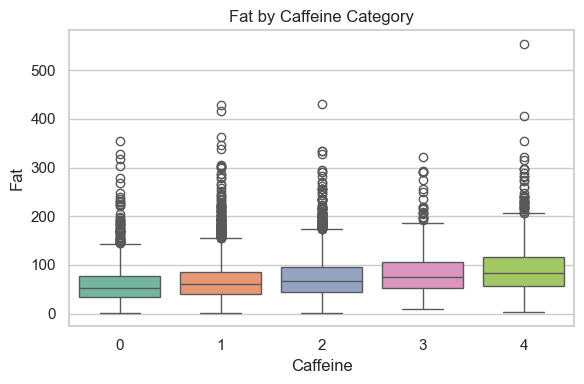

Fat (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


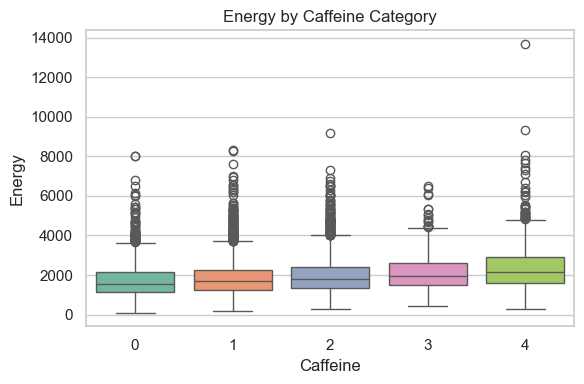

Energy (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


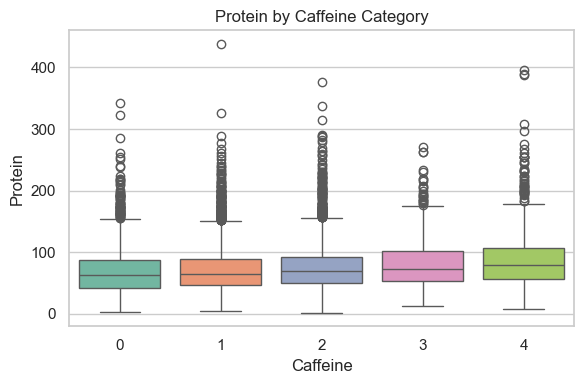

Protein (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


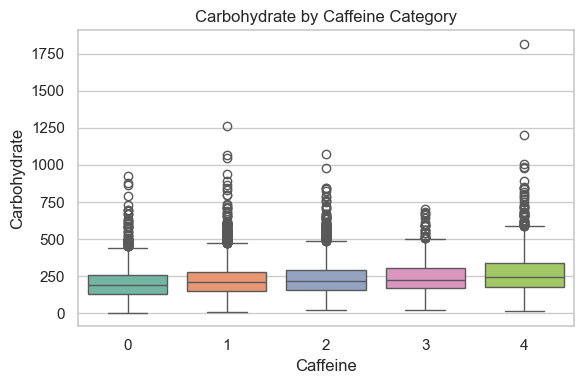

Carbohydrate (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


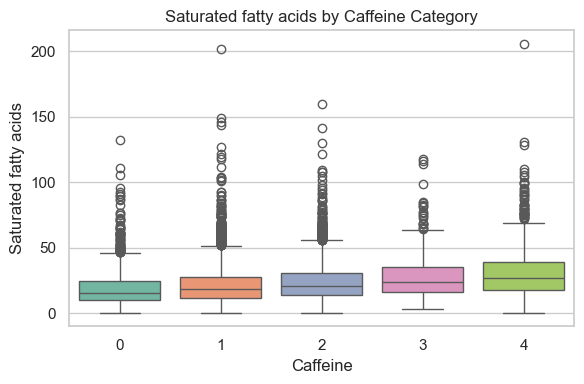

Saturated fatty acids (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


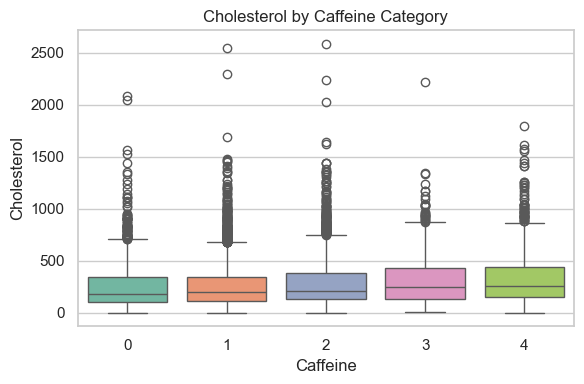

Cholesterol (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


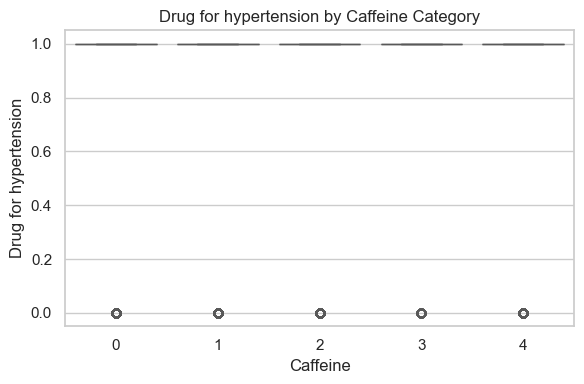

Drug for hypertension (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


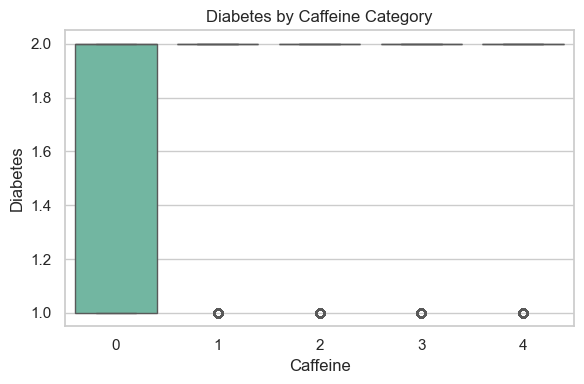

Diabetes (Numeric Y, Caffeine categorical): ANOVA p = 0.0001


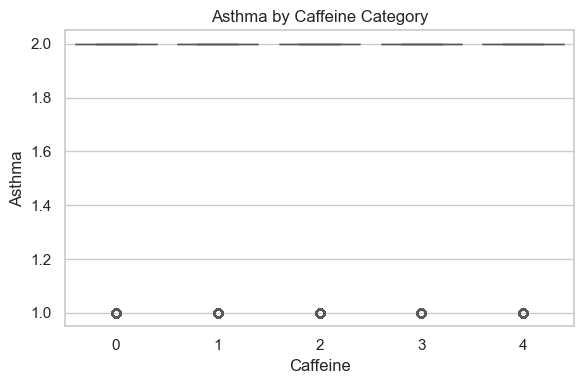

Asthma (Numeric Y, Caffeine categorical): ANOVA p = 0.8206


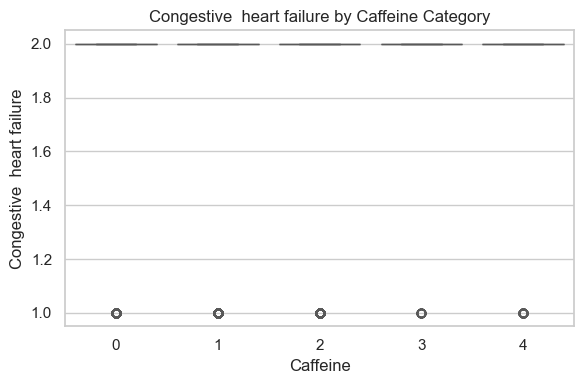

Congestive  heart failure (Numeric Y, Caffeine categorical): ANOVA p = 0.1008


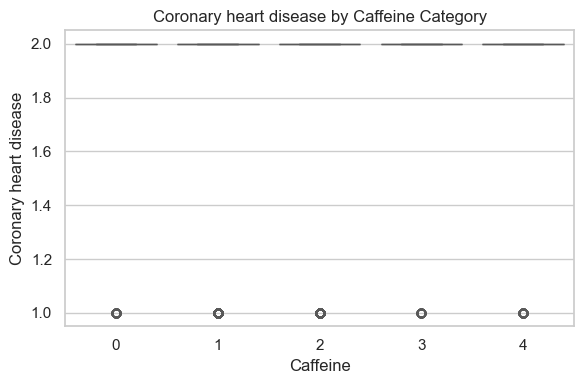

Coronary heart disease (Numeric Y, Caffeine categorical): ANOVA p = 0.0002


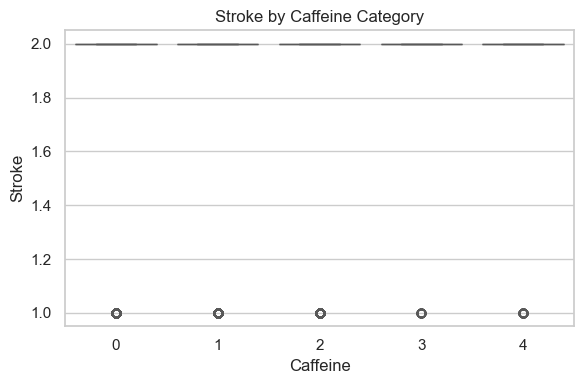

Stroke (Numeric Y, Caffeine categorical): ANOVA p = 0.1871


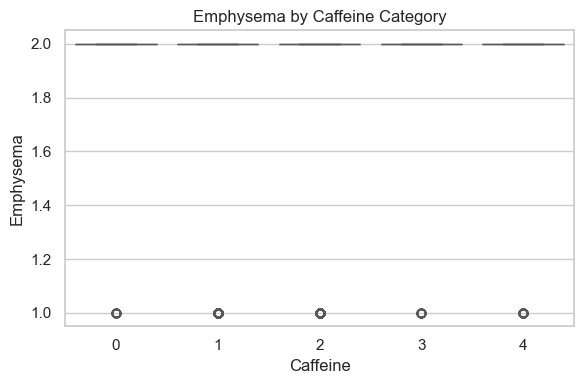

Emphysema (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


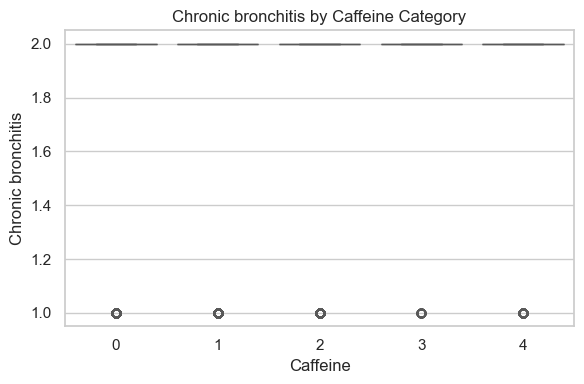

Chronic bronchitis (Numeric Y, Caffeine categorical): ANOVA p = 0.1277


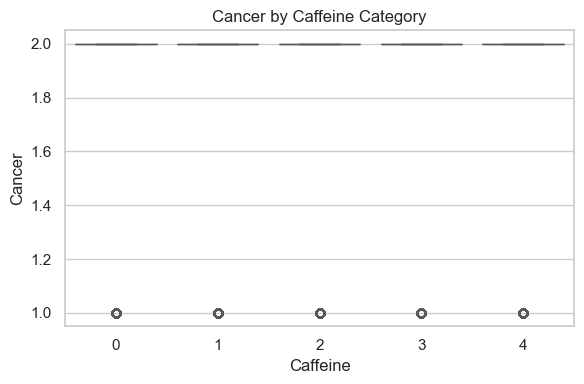

Cancer (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


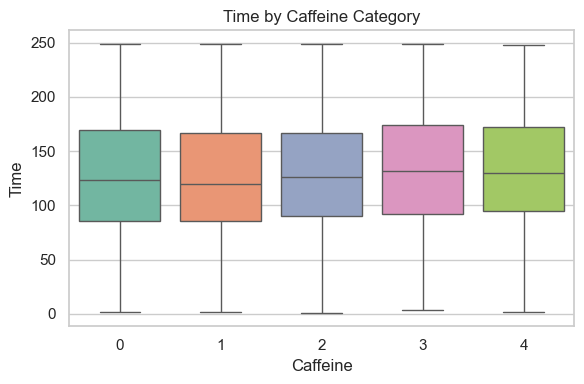

Time (Numeric Y, Caffeine categorical): ANOVA p = 0.0000


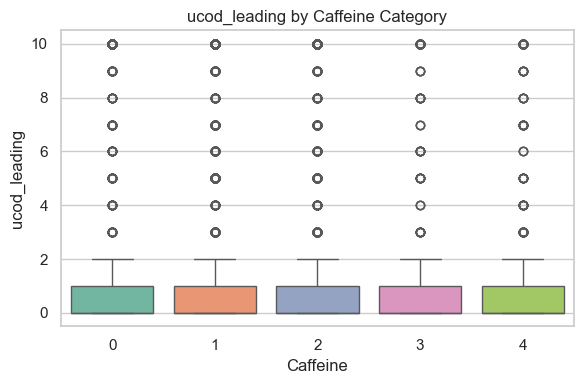

ucod_leading (Numeric Y, Caffeine categorical): ANOVA p = 0.0001


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, f_oneway, mannwhitneyu

# 1. Veriyi oku
df = pd.read_csv("all-cause.csv")
sns.set(style="whitegrid")

# 2. Kolonları ayarla
caffeine_col = "Caffeine"
columns = [col for col in df.columns if col != caffeine_col]

# 3. Yardımcı: Caffeine sayısal mı kategorik mi gibi davranıyor?
# Kategorik gibi davranıyorsa bu koşullar sağlanır: az sınıf, tam sayı değerler
def is_effectively_categorical(series, max_unique=10):
    unique_vals = series.dropna().unique()
    return (
        pd.api.types.is_numeric_dtype(series)
        and len(unique_vals) <= max_unique
        and all(float(val).is_integer() for val in unique_vals)
    )

# 4. Başla
for col in columns:
    try:
        x = df[caffeine_col]
        y = df[col]

        # Eğer Y değişkeni sayısal:
        if pd.api.types.is_numeric_dtype(y):
            # Caffeine kategorik gibi davranıyorsa → boxplot + ANOVA
            if is_effectively_categorical(x):
                plt.figure(figsize=(6, 4))
                sns.boxplot(x=x, y=y, palette="Set2")
                plt.title(f"{col} by Caffeine Category")
                plt.tight_layout()
                plt.show()

                # ANOVA testi
                groups = [group[y.name].dropna() for name, group in df.groupby(x)]
                stat, p = f_oneway(*groups)
                print(f"{col} (Numeric Y, Caffeine categorical): ANOVA p = {p:.4f}")

            # Caffeine gerçekten sürekli değişkense → scatter/regplot + korelasyon
            else:
                plt.figure(figsize=(6, 4))
                sns.regplot(x=x, y=y, scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'red'})
                plt.title(f"Caffeine vs {col}")
                plt.xlabel("Caffeine")
                plt.ylabel(col)
                plt.tight_layout()
                plt.show()

                pearson_r, p_p = pearsonr(x, y)
                spearman_r, p_s = spearmanr(x, y)
                print(f"{col} (Numeric):")
                print(f"  Pearson r = {pearson_r:.3f}, p = {p_p:.4f}")
                print(f"  Spearman r = {spearman_r:.3f}, p = {p_s:.4f}")

        # Eğer Y değişkeni kategorikse (örneğin Gender, Smoke gibi)
        else:
            # Az sınıfa sahipse (ikili ya da düşük kategorili)
            if 1 < df[col].nunique() < 10:
                plt.figure(figsize=(6, 4))
                sns.boxplot(x=df[col], y=df[caffeine_col], palette="pastel")
                plt.title(f"Caffeine by {col}")
                plt.xticks(rotation=30)
                plt.tight_layout()
                plt.show()

                # Mann-Whitney (ikili) veya ANOVA (çoklu)
                groups = [group[caffeine_col].dropna() for name, group in df.groupby(col)]
                if df[col].nunique() == 2:
                    stat, p = mannwhitneyu(groups[0], groups[1])
                    print(f"{col} (Binary): Mann-Whitney U p = {p:.4f}")
                else:
                    stat, p = f_oneway(*groups)
                    print(f"{col} (Categorical): ANOVA p = {p:.4f}")

    except Exception as e:
        print(f"{col}: HATA — {e}")


In [44]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modeller
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# Sonuçlar
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

# Göster
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


               Model   MAE  RMSE     R2
0  Linear Regression  0.85  1.12 -0.000
1   Ridge Regression  0.85  1.12 -0.000
2      Random Forest  0.85  1.12 -0.000
3  Gradient Boosting  0.85  1.12 -0.000
6      MLP Regressor  0.85  1.12 -0.001
5                KNN  0.85  1.18 -0.057
4                SVR  0.86  1.21 -0.085


**nhanes 2003-2023**

In [49]:
import os
from pathlib import Path
import pyreadstat

# Dizinleri kontrol et
input_files = [f for f in os.listdir() if f.endswith(".xpt")]

for file in input_files:
    df, _ = pyreadstat.read_xport(file)
    csv_name = Path(file).stem + ".csv"
    df.to_csv(csv_name, index=False)
    print(f"{file} → {csv_name}")


DR1TOT_C.xpt → DR1TOT_C.csv
CDQ_C.xpt → CDQ_C.csv
CDQ_F.xpt → CDQ_F.csv
DR1TOT_D.xpt → DR1TOT_D.csv
DR1TOT_E.xpt → DR1TOT_E.csv
CDQ_G.xpt → CDQ_G.csv
CDQ_E.xpt → CDQ_E.csv
DR1TOT_G.xpt → DR1TOT_G.csv
DR1TOT_F.xpt → DR1TOT_F.csv
CDQ_D.xpt → CDQ_D.csv
DPQ_J.xpt → DPQ_J.csv
P_DR1TOT.xpt → P_DR1TOT.csv
CDQ_I.xpt → CDQ_I.csv
DR1TOT_J.xpt → DR1TOT_J.csv
CDQ_H.xpt → CDQ_H.csv
CDQ_J.xpt → CDQ_J.csv
DR1TOT_H.xpt → DR1TOT_H.csv
DR1TOT_I.xpt → DR1TOT_I.csv
DR1TOT_L.xpt → DR1TOT_L.csv


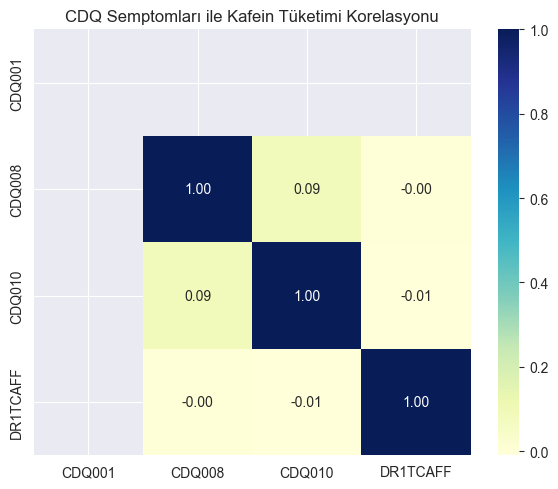

In [54]:
# --- 1. Verileri yükle (XPT dosyaları)
cdq = pd.read_sas("CDQ_J.xpt")
caff = pd.read_sas("DR1TOT_J.xpt")

# --- 2. Gerekli sütunları seç
symptom_cols = ["SEQN", "CDQ001", "CDQ008", "CDQ010"]
caff_cols = ["SEQN", "DR1TCAFF"]

cdq_sel = cdq[symptom_cols]
caff_sel = caff[caff_cols]

# --- 3. Birleştir
df = pd.merge(cdq_sel, caff_sel, on="SEQN")

# --- 4. Eksik verileri çıkar
df.dropna(subset=["CDQ001", "CDQ008", "CDQ010", "DR1TCAFF"], inplace=True)

# --- 5. Korelasyon matrisi oluştur (Spearman daha uygun)
corr = df[["CDQ001", "CDQ008", "CDQ010", "DR1TCAFF"]].corr(method="spearman")

# --- 6. Görselleştir
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("CDQ Semptomları ile Kafein Tüketimi Korelasyonu")
plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
**caffeine_intake_tracker Veri Analizleri**

In [5]:
# CSV'yi oku
df = pd.read_csv("caffeine_intake_tracker.csv")
print(df.info())
print('\nMissing values in each column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   caffeine_mg            500 non-null    float64
 1   age                    500 non-null    float64
 2   focus_level            500 non-null    float64
 3   sleep_quality          500 non-null    float64
 4   sleep_impacted         500 non-null    int64  
 5   beverage_coffee        500 non-null    bool   
 6   beverage_energy_drink  500 non-null    bool   
 7   beverage_tea           500 non-null    bool   
 8   time_of_day_afternoon  500 non-null    bool   
 9   time_of_day_evening    500 non-null    bool   
 10  time_of_day_morning    500 non-null    bool   
 11  gender_female          500 non-null    bool   
 12  gender_male            500 non-null    bool   
dtypes: bool(8), float64(4), int64(1)
memory usage: 23.6 KB
None

Missing values in each column:
caffeine_mg       

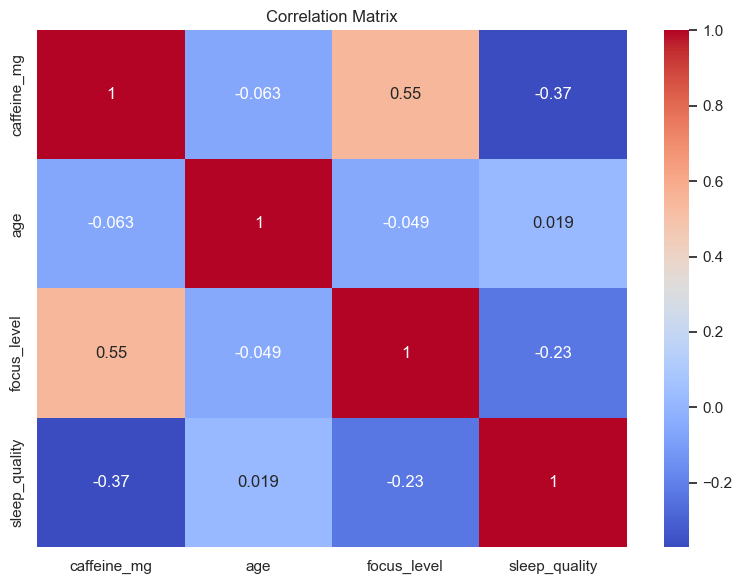

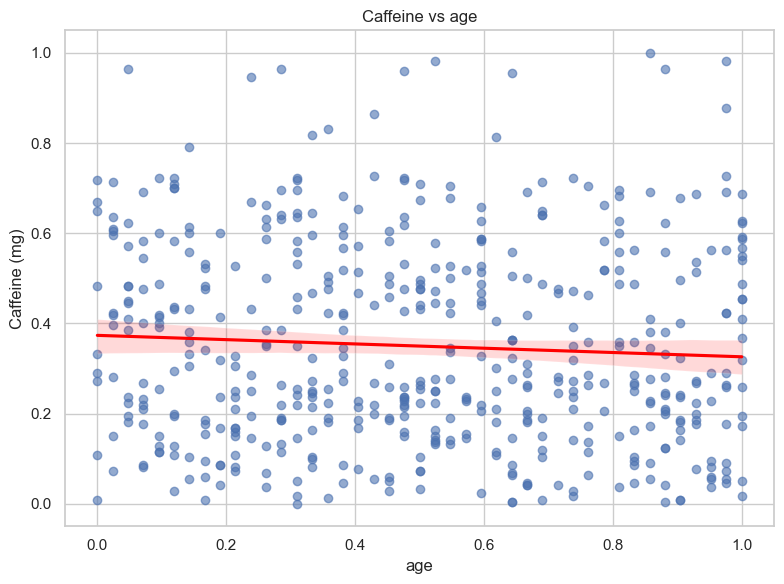

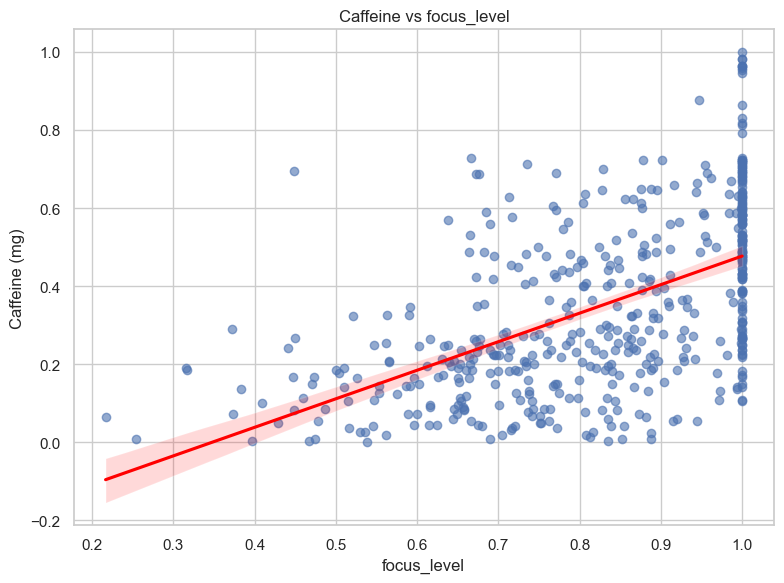

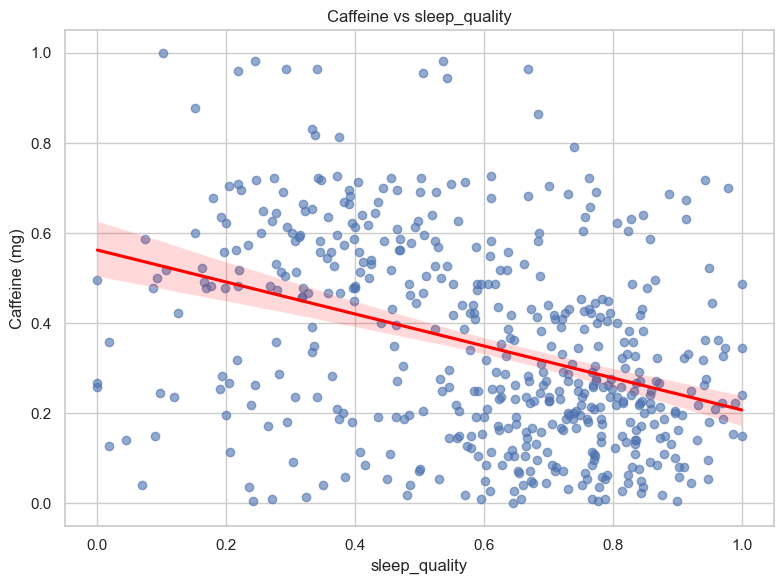

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")


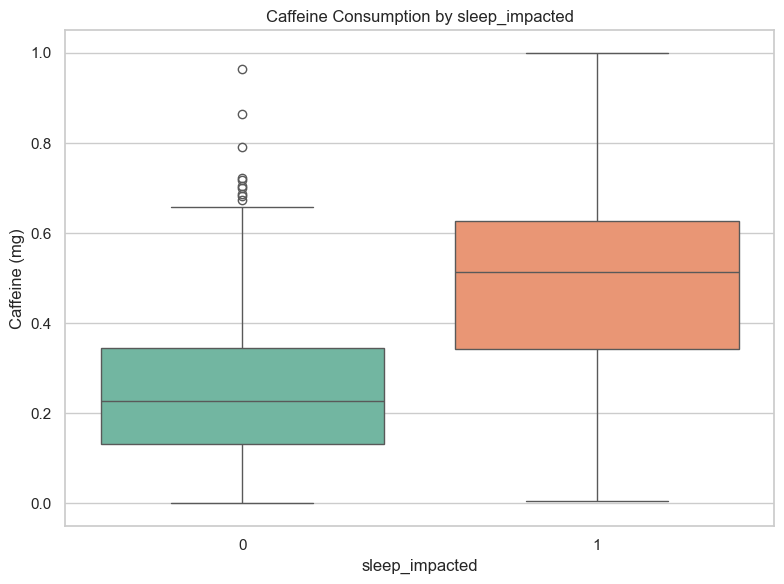

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")


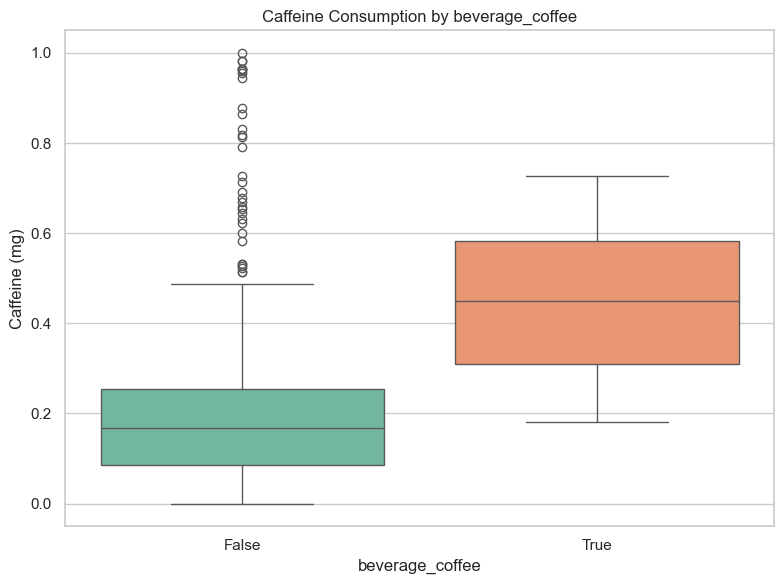

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")


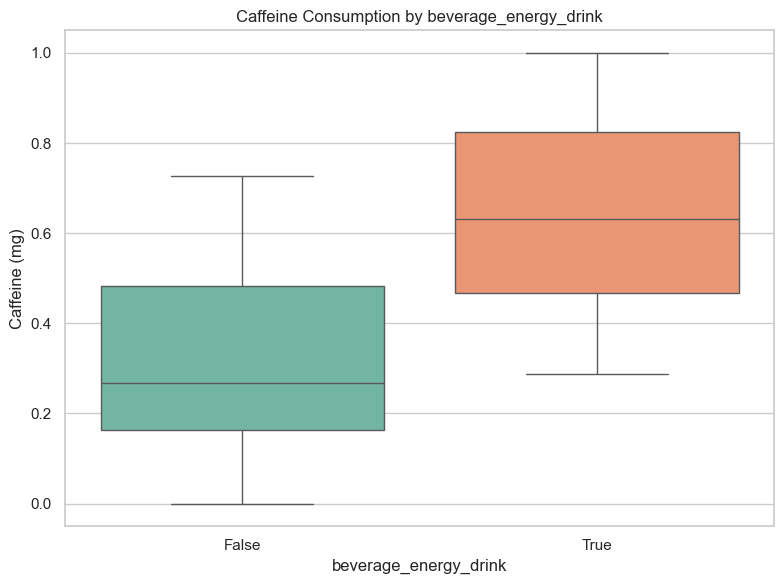

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")


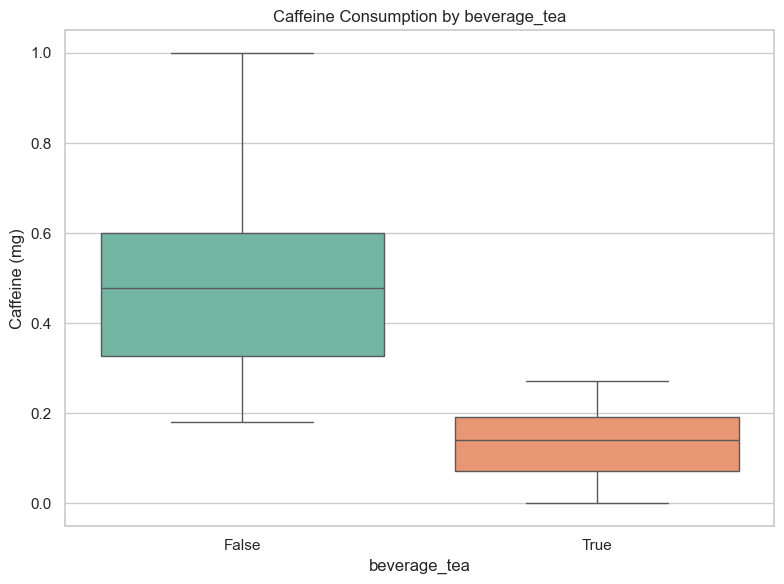

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")


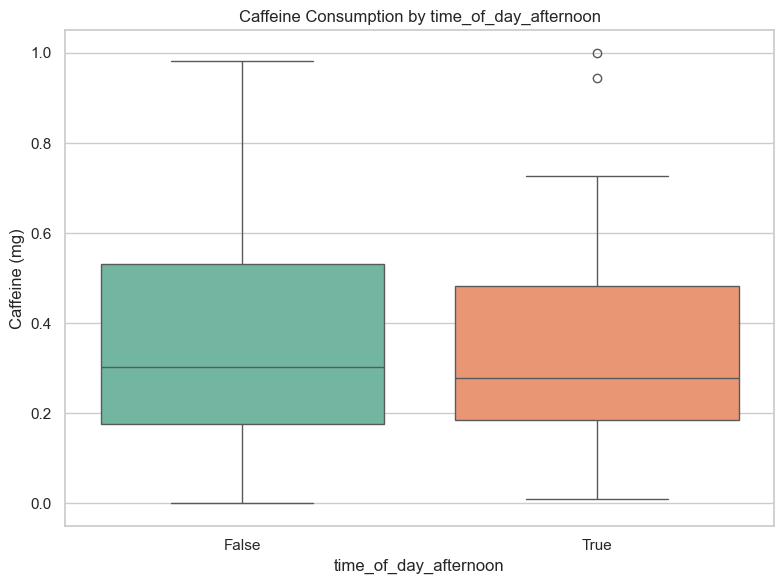

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")


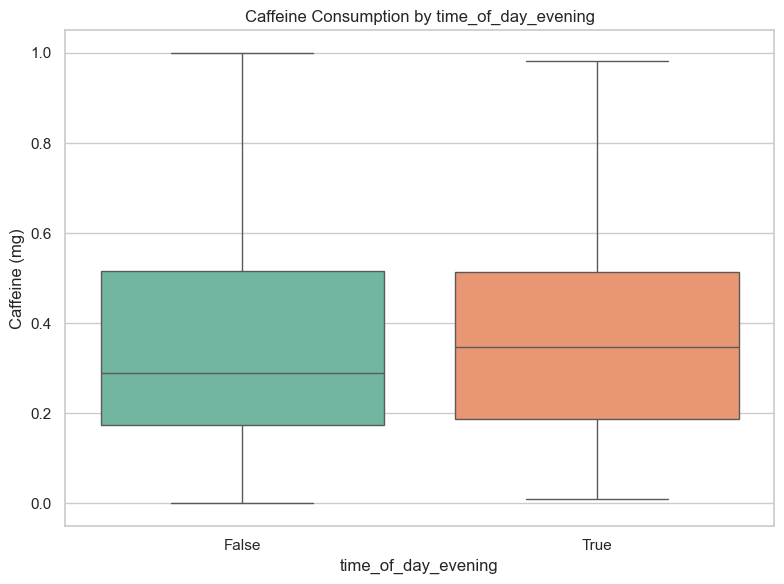

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")


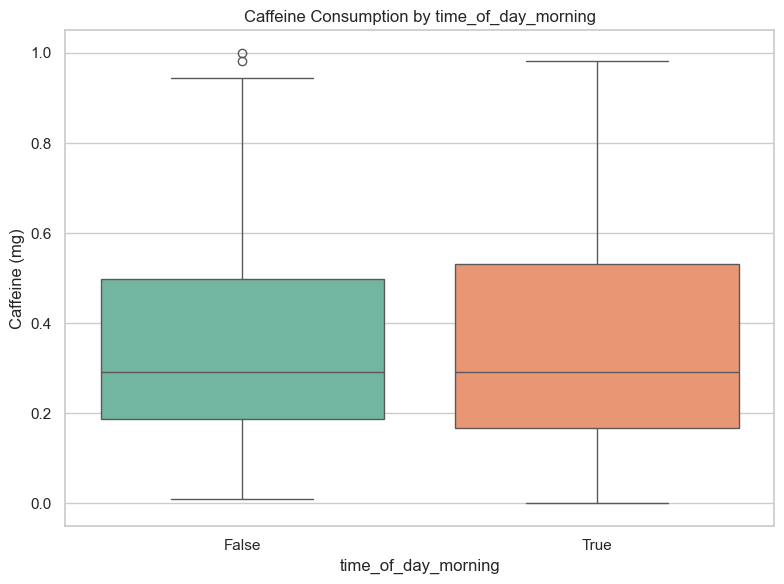

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")


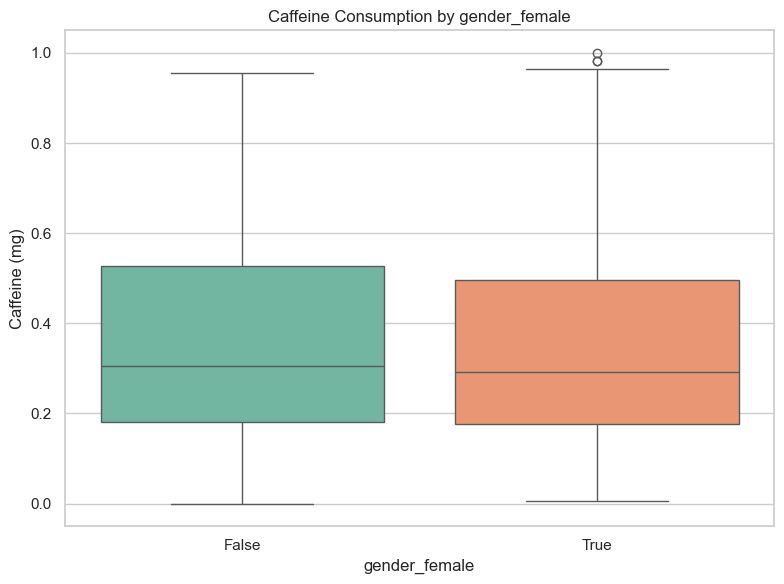

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")


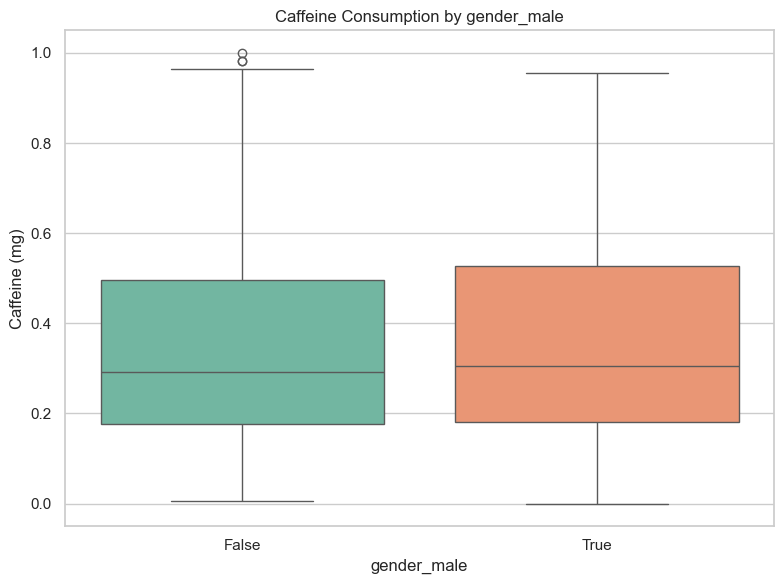

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Gender", y="caffeine_mg", palette="muted")


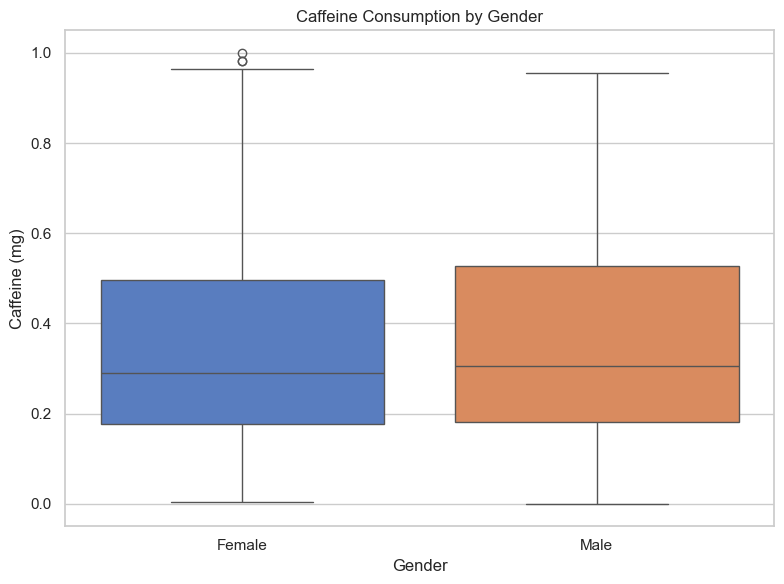

/var/folders/6r/g7qfzvpn4llf7_3lbkmrq8bw0000gn/T/ipykernel_41109/2128714458.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Gender", y="caffeine_mg", palette="pastel")


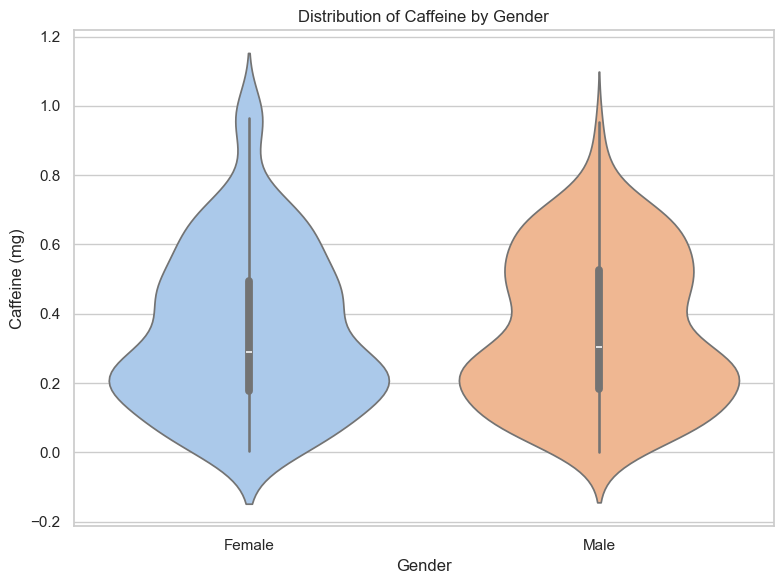

In [1]:
# Stil ayarı
sns.set(style="whitegrid")

# 1. Cinsiyeti hesapla
def get_gender(row):
    if row["gender_male"]:
        return "Male"
    elif row["gender_female"]:
        return "Female"
    else:
        return "Other"

df["Gender"] = df.apply(get_gender, axis=1)

# 2. Korelasyon Matrisi (sadece sayısal değişkenlerle)
numeric_cols = [
    "caffeine_mg", "age", "focus_level", "sleep_quality"
]
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 3. Scatter plotlar (kafein vs sayısal değişkenler) + trend çizgisi
for col in ["age", "focus_level", "sleep_quality"]:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=df, x=col, y="caffeine_mg", scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
    plt.title(f"Caffeine vs {col}")
    plt.xlabel(col)
    plt.ylabel("Caffeine (mg)")
    plt.tight_layout()
    plt.show()


# 4. Binary sütunlar için boxplot (bool değişkenlerin her biri için)
binary_cols = [
    "sleep_impacted",
    "beverage_coffee", "beverage_energy_drink", "beverage_tea",
    "time_of_day_afternoon", "time_of_day_evening", "time_of_day_morning",
    "gender_female", "gender_male"
]

for col in binary_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col, y="caffeine_mg", palette="Set2")
    plt.title(f"Caffeine Consumption by {col}")
    plt.xlabel(col)
    plt.ylabel("Caffeine (mg)")
    plt.tight_layout()
    plt.show()

# 5. Cinsiyet karşılaştırması (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gender", y="caffeine_mg", palette="muted")
plt.title("Caffeine Consumption by Gender")
plt.xlabel("Gender")
plt.ylabel("Caffeine (mg)")
plt.tight_layout()
plt.show()

# 6. Violin plot: caffeine vs gender
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="Gender", y="caffeine_mg", palette="pastel")
plt.title("Distribution of Caffeine by Gender")
plt.xlabel("Gender")
plt.ylabel("Caffeine (mg)")
plt.tight_layout()
plt.show()



age ile Caffeine:
  Pearson: r = -0.063, p = 0.1585
  Spearman: r = -0.068, p = 0.1290

focus_level ile Caffeine:
  Pearson: r = 0.547, p = 0.0000
  Spearman: r = 0.585, p = 0.0000

sleep_quality ile Caffeine:
  Pearson: r = -0.369, p = 0.0000
  Spearman: r = -0.364, p = 0.0000


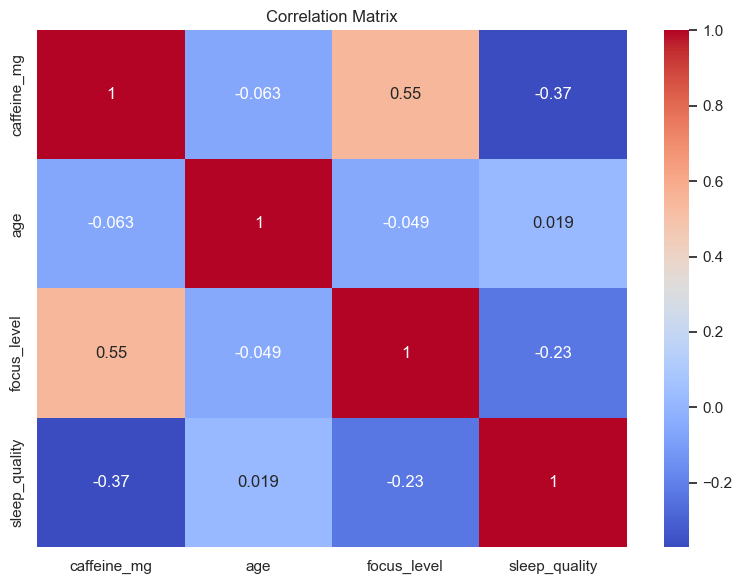


Caffeine by Gender (t-test): t = 0.114, p = 0.9096


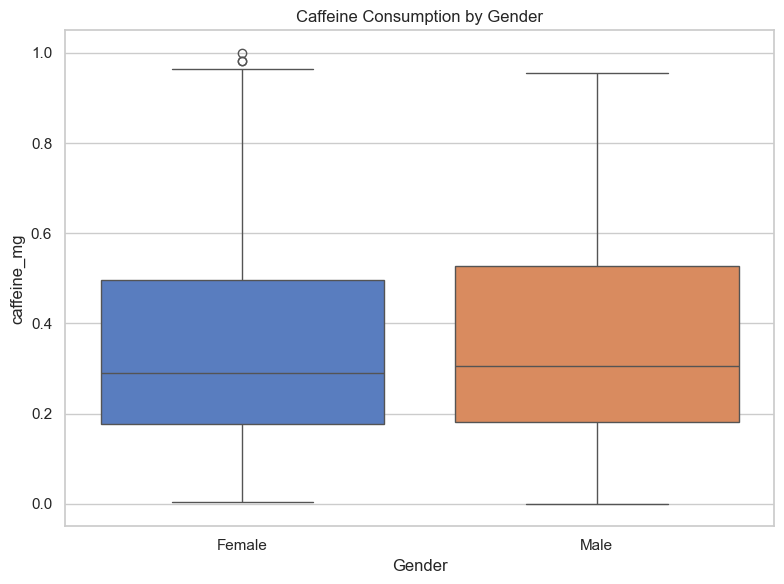


Caffeine vs Sleep Impact (Mann-Whitney U): U = 47361.000, p = 0.0000


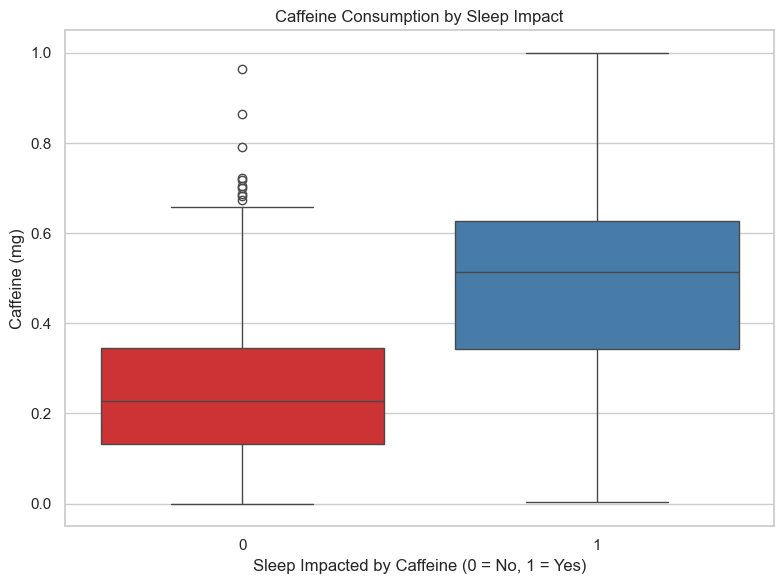


Caffeine by beverage_coffee: t = 11.816, p = 0.0000


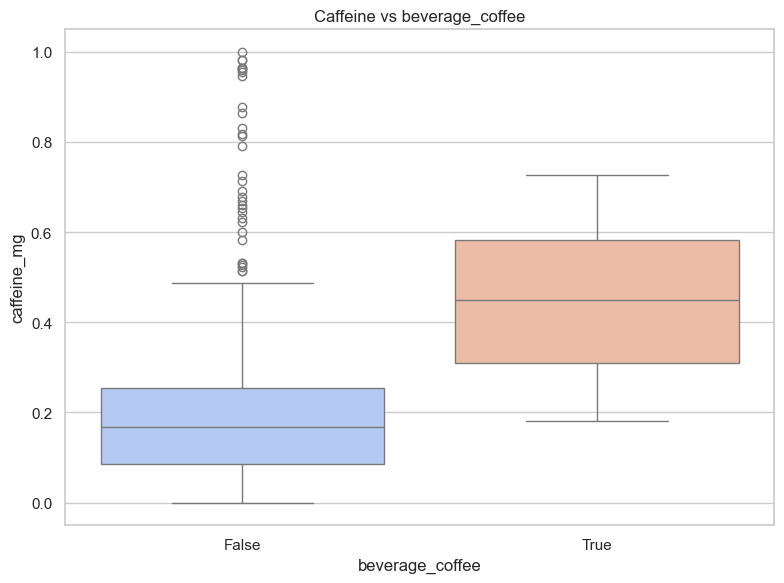


Caffeine by beverage_energy_drink: t = 9.360, p = 0.0000


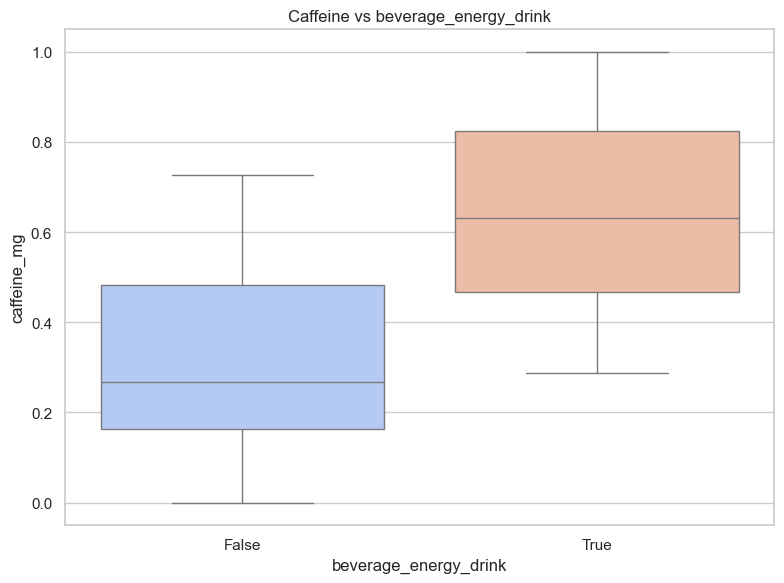


Caffeine by beverage_tea: t = -29.413, p = 0.0000


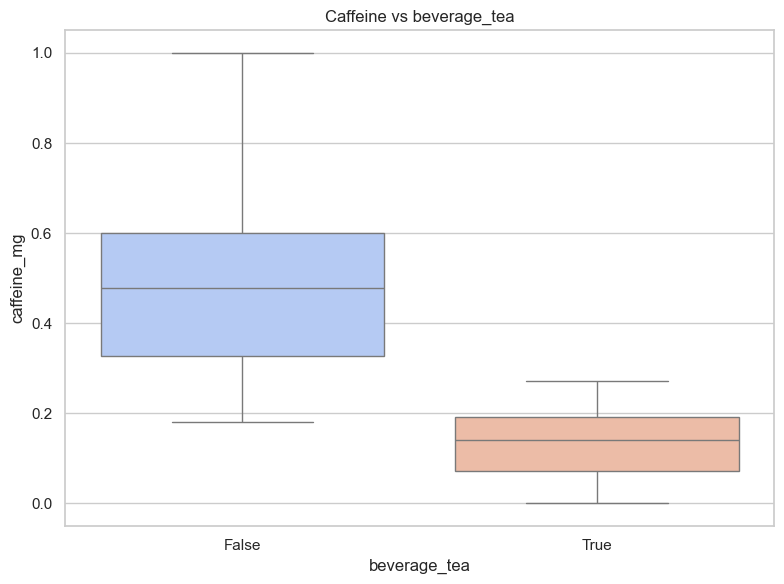


Caffeine by time_of_day_morning: t = 0.447, p = 0.6553


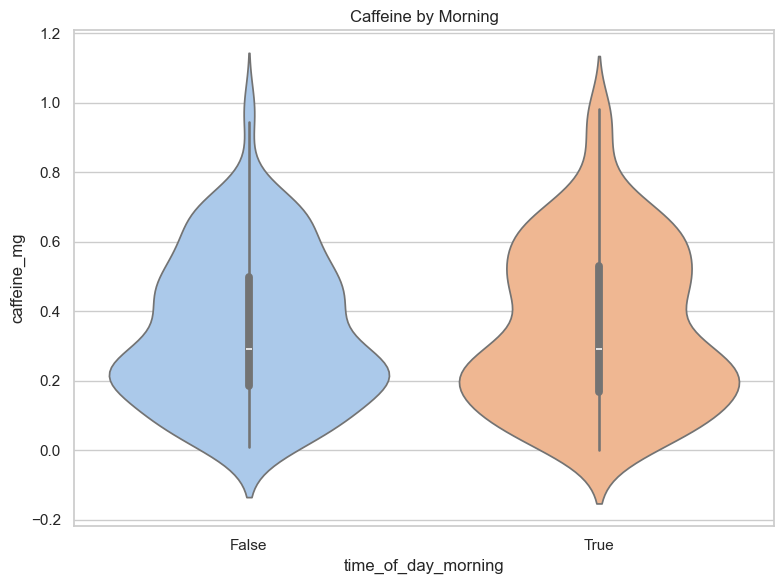


Caffeine by time_of_day_afternoon: t = -0.731, p = 0.4652


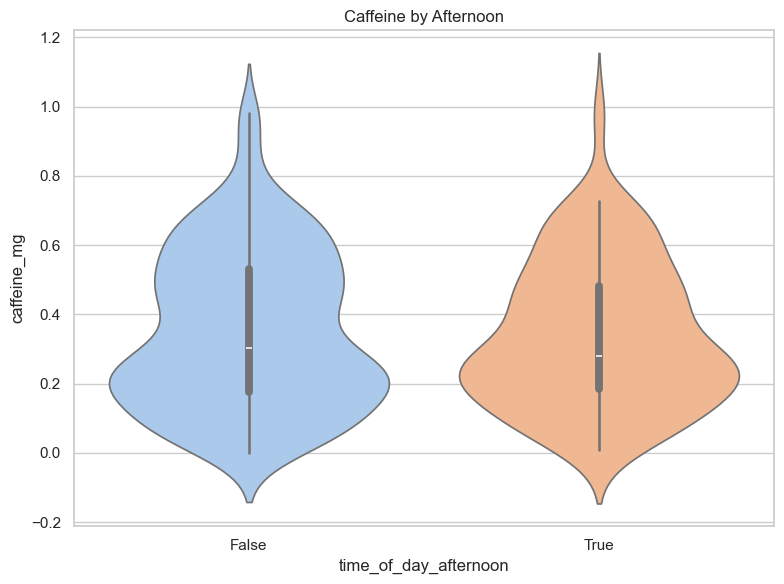


Caffeine by time_of_day_evening: t = 0.239, p = 0.8118


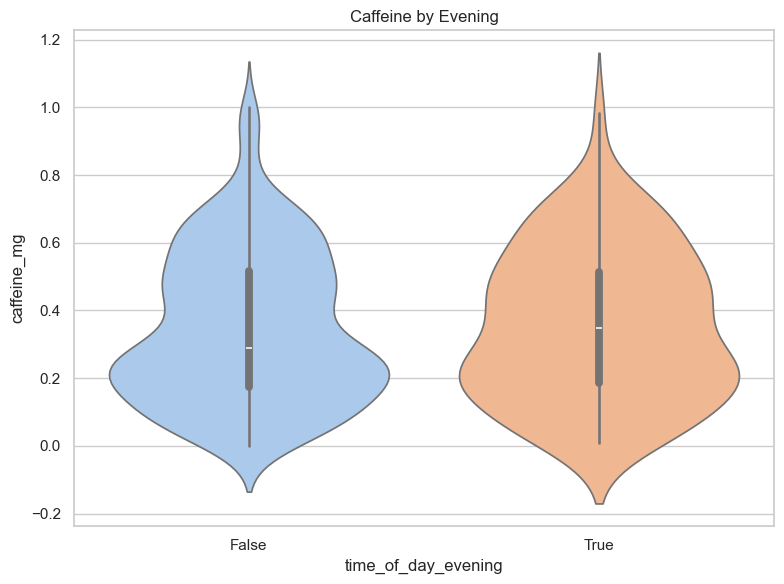

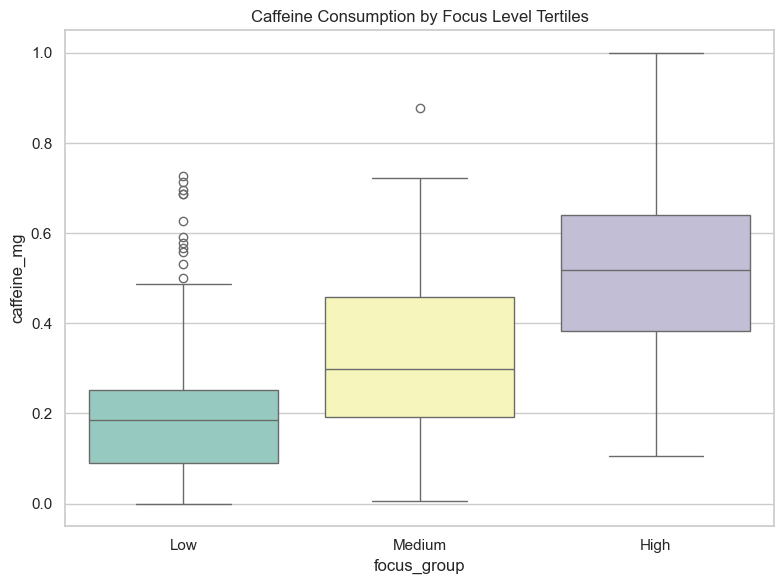


ANOVA for Focus Level groups: F = 113.490, p = 0.0000


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, pearsonr, spearmanr, f_oneway

# Veriyi oku
df = pd.read_csv("caffeine_intake_tracker.csv")

# Stil
sns.set(style="whitegrid")

# Cinsiyet sütunu oluştur
df["Gender"] = df.apply(lambda row: "Male" if row["gender_male"] else "Female" if row["gender_female"] else "Other", axis=1)

# Sayısal sütunlar
numeric_cols = ["caffeine_mg", "age", "focus_level", "sleep_quality"]

# ===================== 1. Korelasyon Testleri (Pearson, Spearman) =====================
for col in numeric_cols:
    if col != "caffeine_mg":
        pearson_r, p_pearson = pearsonr(df["caffeine_mg"], df[col])
        spearman_r, p_spearman = spearmanr(df["caffeine_mg"], df[col])
        print(f"\n{col} ile Caffeine:")
        print(f"  Pearson: r = {pearson_r:.3f}, p = {p_pearson:.4f}")
        print(f"  Spearman: r = {spearman_r:.3f}, p = {p_spearman:.4f}")

# Korelasyon ısı haritası
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# ===================== 2. Cinsiyete Göre T-Test =====================
group_m = df[df["gender_male"] == True]["caffeine_mg"]
group_f = df[df["gender_female"] == True]["caffeine_mg"]

t_stat, p_ttest = ttest_ind(group_m, group_f, equal_var=False)
print(f"\nCaffeine by Gender (t-test): t = {t_stat:.3f}, p = {p_ttest:.4f}")

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gender", y="caffeine_mg", palette="muted")
plt.title("Caffeine Consumption by Gender")
plt.tight_layout()
plt.show()

# ===================== 3. Sleep Impact Analizi (Mann-Whitney U Testi) =====================
impacted = df[df["sleep_impacted"] == 1]["caffeine_mg"]
not_impacted = df[df["sleep_impacted"] == 0]["caffeine_mg"]

u_stat, p_u = mannwhitneyu(impacted, not_impacted)
print(f"\nCaffeine vs Sleep Impact (Mann-Whitney U): U = {u_stat:.3f}, p = {p_u:.4f}")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="sleep_impacted", y="caffeine_mg", palette="Set1")
plt.title("Caffeine Consumption by Sleep Impact")
plt.xlabel("Sleep Impacted by Caffeine (0 = No, 1 = Yes)")
plt.ylabel("Caffeine (mg)")
plt.tight_layout()
plt.show()

# ===================== 4. İçecek Tercihlerine Göre Farklılıklar =====================
drink_cols = ["beverage_coffee", "beverage_energy_drink", "beverage_tea"]

for col in drink_cols:
    group1 = df[df[col] == True]["caffeine_mg"]
    group2 = df[df[col] == False]["caffeine_mg"]
    t, p = ttest_ind(group1, group2, equal_var=False)
    print(f"\nCaffeine by {col}: t = {t:.3f}, p = {p:.4f}")
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col, y="caffeine_mg", palette="coolwarm")
    plt.title(f"Caffeine vs {col}")
    plt.tight_layout()
    plt.show()

# ===================== 5. Zaman Dilimine Göre Tüketim =====================
time_cols = ["time_of_day_morning", "time_of_day_afternoon", "time_of_day_evening"]
for col in time_cols:
    group1 = df[df[col] == True]["caffeine_mg"]
    group2 = df[df[col] == False]["caffeine_mg"]
    t, p = ttest_ind(group1, group2, equal_var=False)
    print(f"\nCaffeine by {col}: t = {t:.3f}, p = {p:.4f}")

    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x=col, y="caffeine_mg", palette="pastel")
    plt.title(f"Caffeine by {col.replace('time_of_day_', '').capitalize()}")
    plt.tight_layout()
    plt.show()

# ===================== 6. Focus Level Grupları Arasında Caffeine Farkı (Tertiller) =====================
df["focus_group"] = pd.qcut(df["focus_level"], q=3, labels=["Low", "Medium", "High"])

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="focus_group", y="caffeine_mg", palette="Set3")
plt.title("Caffeine Consumption by Focus Level Tertiles")
plt.tight_layout()
plt.show()

anova_result = f_oneway(
    df[df["focus_group"] == "Low"]["caffeine_mg"],
    df[df["focus_group"] == "Medium"]["caffeine_mg"],
    df[df["focus_group"] == "High"]["caffeine_mg"]
)
print(f"\nANOVA for Focus Level groups: F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.4f}")


In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 1. Veri yükle
df = pd.read_csv("caffeine_intake_tracker.csv")

# 2. Gerekli sütunları hazırla
df["gender"] = df["gender_male"].astype(int)

features = [
    "age", "focus_level", "sleep_quality", "sleep_impacted",
    "beverage_coffee", "beverage_energy_drink", "beverage_tea",
    "time_of_day_afternoon", "time_of_day_evening", "time_of_day_morning",
    "gender"
]
target = "caffeine_mg"

X = df[features]
y = df[target]

# 3. Train/Test Böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model listesi
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# 6. Eğitim ve değerlendirme
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3),
        "R2": round(r2, 3)
    })

# 7. Sonuçları tablo olarak göster
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


               Model    MAE   RMSE     R2
0  Linear Regression  0.106  0.134  0.649
1   Ridge Regression  0.106  0.134  0.649
8                KNN  0.116  0.147  0.582
6  Gradient Boosting  0.114  0.148  0.575
5      Random Forest  0.114  0.149  0.565
7                SVR  0.121  0.151  0.556
3         ElasticNet  0.124  0.152  0.547
2   Lasso Regression  0.154  0.184  0.341
4      Decision Tree  0.136  0.184  0.338
9      MLP Regressor  0.152  0.190  0.294


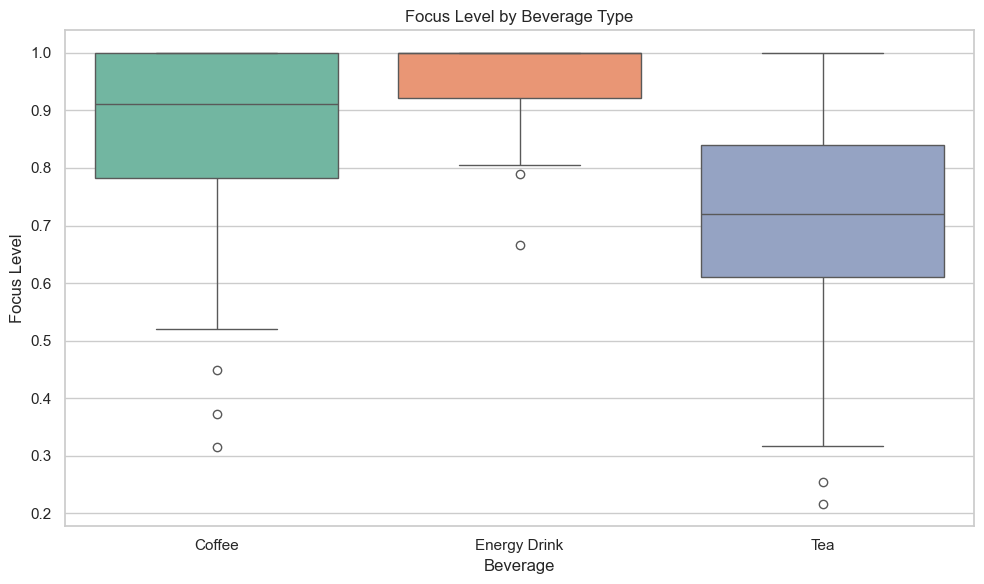

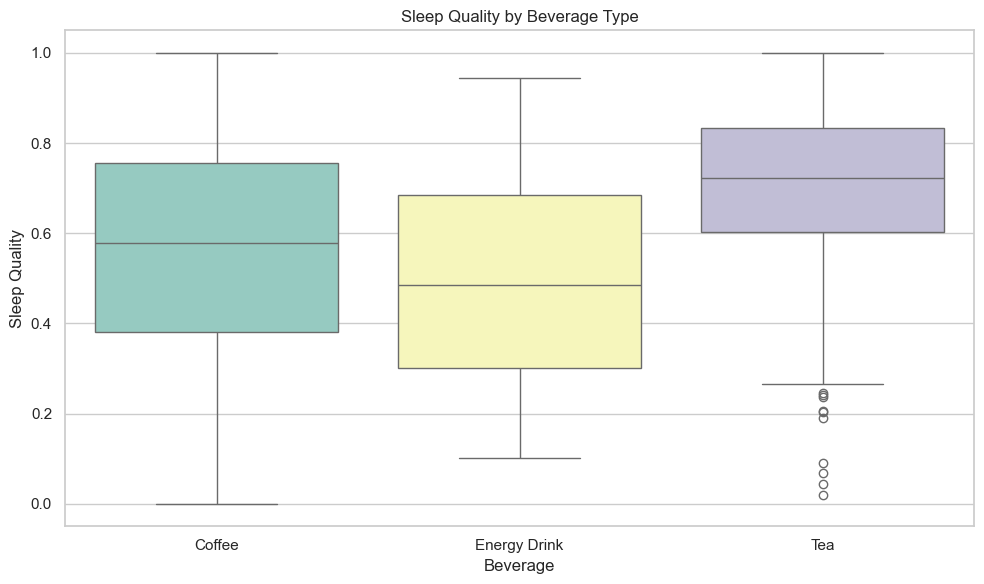


Mann-Whitney U Test Results (Drinkers vs Non-Drinkers):
Coffee → Focus Level: p = 0.0000
Coffee → Sleep Quality: p = 0.0000
Energy Drink → Focus Level: p = 0.0000
Energy Drink → Sleep Quality: p = 0.0018
Tea → Focus Level: p = 0.0000
Tea → Sleep Quality: p = 0.0000


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# CSV'yi oku
df = pd.read_csv("caffeine_intake_tracker.csv")
sns.set(style="whitegrid")

# Analiz yapılacak hedef değişkenler
outcomes = ["focus_level", "sleep_quality"]

# İçecek grubu sütunları
beverages = ["beverage_coffee", "beverage_energy_drink", "beverage_tea"]
labels = ["Coffee", "Energy Drink", "Tea"]

# Tüm içecekleri birleştirilmiş long-form formatta veri oluştur
long_df = pd.DataFrame()

for b, label in zip(beverages, labels):
    temp = df[[b] + outcomes].copy()
    temp = temp[temp[b] == True]  # sadece içenler
    temp["Beverage"] = label
    long_df = pd.concat([long_df, temp])

# 1. FOCUS LEVEL karşılaştırması
plt.figure(figsize=(10, 6))
sns.boxplot(data=long_df, x="Beverage", y="focus_level", palette="Set2")
plt.title("Focus Level by Beverage Type")
plt.ylabel("Focus Level")
plt.tight_layout()
plt.show()

# 2. SLEEP QUALITY karşılaştırması
plt.figure(figsize=(10, 6))
sns.boxplot(data=long_df, x="Beverage", y="sleep_quality", palette="Set3")
plt.title("Sleep Quality by Beverage Type")
plt.ylabel("Sleep Quality")
plt.tight_layout()
plt.show()

# 3. P-Değerlerini yazdır (focus & sleep için)
print("\nMann-Whitney U Test Results (Drinkers vs Non-Drinkers):")

for b, label in zip(beverages, labels):
    for o in outcomes:
        drink = df[df[b] == True][o]
        nondrink = df[df[b] == False][o]
        stat, p = mannwhitneyu(drink, nondrink, alternative="two-sided")
        print(f"{label} → {o.replace('_', ' ').title()}: p = {p:.4f}")


In [83]:
import pandas as pd
from scipy.stats import kruskal

# Veriyi oku
df = pd.read_csv("caffeine_intake_tracker.csv")

# Focus ve sleep'i test etmek istediğimiz outcome değişkenleri
outcomes = ["focus_level", "sleep_quality"]

# İçecek türleri (True olanlar filtrelenecek)
beverages = {
    "Coffee": df[df["beverage_coffee"] == True],
    "Energy Drink": df[df["beverage_energy_drink"] == True],
    "Tea": df[df["beverage_tea"] == True]
};

# Her outcome için Kruskal-Wallis testi
for outcome in outcomes:
    print(f"\n{outcome.replace('_', ' ').title()} için Kruskal-Wallis H Testi:")

    groups = [bev[outcome] for bev in beverages.values()]
    stat, p = kruskal(*groups)

    print(f"H-statistic = {stat:.3f}")
    print(f"p-değeri (bilimsel gösterim): {p:.10e}")

    if p < 0.05:
        print("Gruplar arasında anlamlı fark var (p < 0.05)")
    else:
        print("Anlamlı fark yok (p ≥ 0.05)")



Focus Level için Kruskal-Wallis H Testi:
H-statistic = 135.437
p-değeri (bilimsel gösterim): 3.8928325965e-30
Gruplar arasında anlamlı fark var (p < 0.05)

Sleep Quality için Kruskal-Wallis H Testi:
H-statistic = 43.910
p-değeri (bilimsel gösterim): 2.9175112929e-10
Gruplar arasında anlamlı fark var (p < 0.05)



Focus Level için Kahve Saati Etkisi (Kruskal-Wallis):
H-statistic = 1.778
p-value     = 0.4111
Anlamlı fark yok


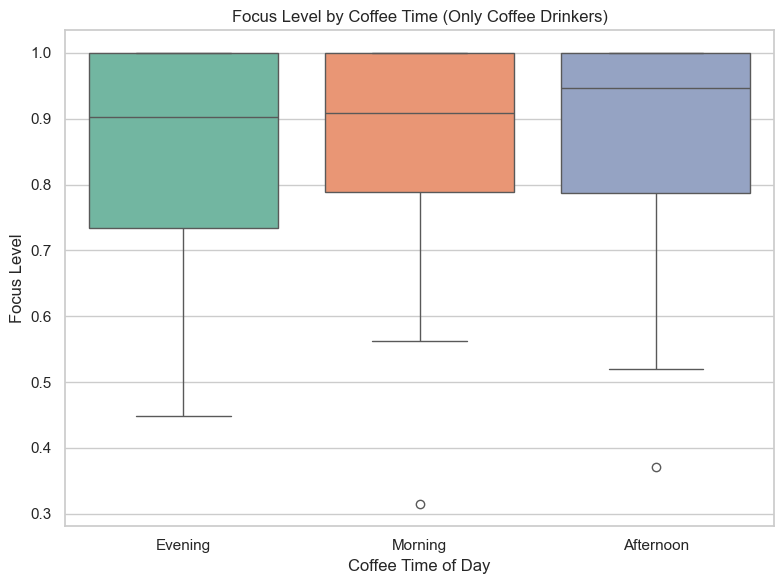


Sleep Quality için Kahve Saati Etkisi (Kruskal-Wallis):
H-statistic = 4.930
p-value     = 0.0850
Anlamlı fark yok


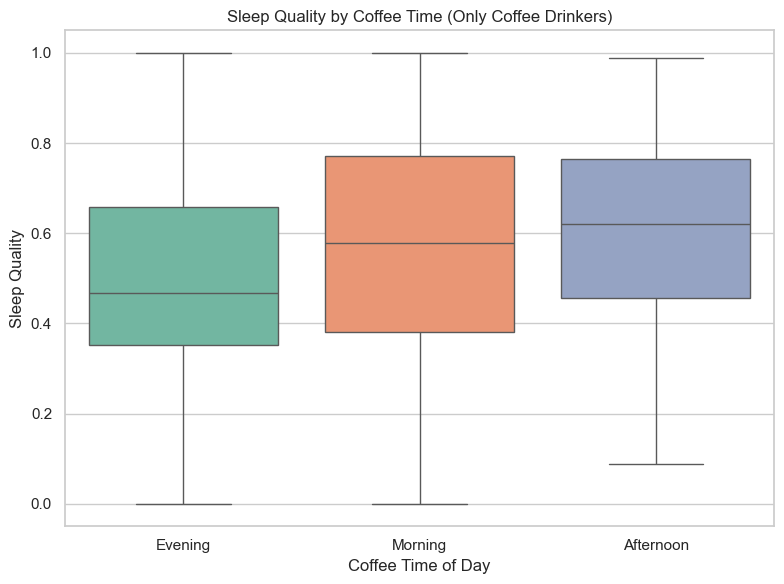

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

# Veriyi yükle
df = pd.read_csv("caffeine_intake_tracker.csv")
sns.set(style="whitegrid")

# Sadece kahve içenleri filtrele
coffee_df = df[df["beverage_coffee"] == True].copy()

# Saat dilimini kategorik sütun haline getir
def get_coffee_time(row):
    if row["time_of_day_morning"]:
        return "Morning"
    elif row["time_of_day_afternoon"]:
        return "Afternoon"
    elif row["time_of_day_evening"]:
        return "Evening"
    else:
        return "Unknown"

coffee_df["Coffee_Time"] = coffee_df.apply(get_coffee_time, axis=1)
coffee_df = coffee_df[coffee_df["Coffee_Time"] != "Unknown"]  # eksik saat bilgilerini çıkar

# 🔬 Her bir outcome için Kruskal-Wallis testi + boxplot
outcomes = ["focus_level", "sleep_quality"]

for outcome in outcomes:
    print(f"\n{outcome.replace('_', ' ').title()} için Kahve Saati Etkisi (Kruskal-Wallis):")

    # Grupları hazırla
    morning = coffee_df[coffee_df["Coffee_Time"] == "Morning"][outcome]
    afternoon = coffee_df[coffee_df["Coffee_Time"] == "Afternoon"][outcome]
    evening = coffee_df[coffee_df["Coffee_Time"] == "Evening"][outcome]

    # Kruskal-Wallis testi
    stat, p = kruskal(morning, afternoon, evening)
    print(f"H-statistic = {stat:.3f}")
    print(f"p-value     = {p:.4f}")
    if p < 0.05:
        print("Gruplar arasında anlamlı fark var")
    else:
        print("Anlamlı fark yok")

    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=coffee_df, x="Coffee_Time", y=outcome, palette="Set2")
    plt.title(f"{outcome.replace('_', ' ').title()} by Coffee Time (Only Coffee Drinkers)")
    plt.xlabel("Coffee Time of Day")
    plt.ylabel(outcome.replace("_", " ").title())
    plt.tight_layout()
    plt.show()


In [85]:
# İçecek türlerine göre sleep_impacted ortalaması (etkilenme oranı)
for drink in ["beverage_coffee", "beverage_energy_drink", "beverage_tea"]:
    oran = df[df[drink] == True]["sleep_impacted"].mean()
    print(f"{drink.replace('beverage_', '').title()}: sleep impacted rate = {oran:.2%}")


Coffee: sleep impacted rate = 53.21%
Energy_Drink: sleep impacted rate = 63.83%
Tea: sleep impacted rate = 17.02%


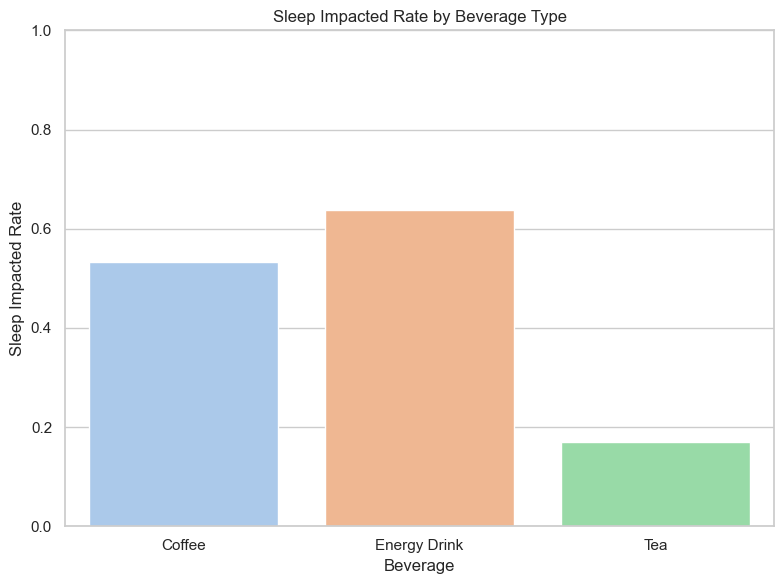


Chi² Test for Sleep Impacted ~ Beverage:
Coffee: p-value = 0.0000 anlamlı fark var
Energy Drink: p-value = 0.0012 anlamlı fark var
Tea: p-value = 0.0000 anlamlı fark var


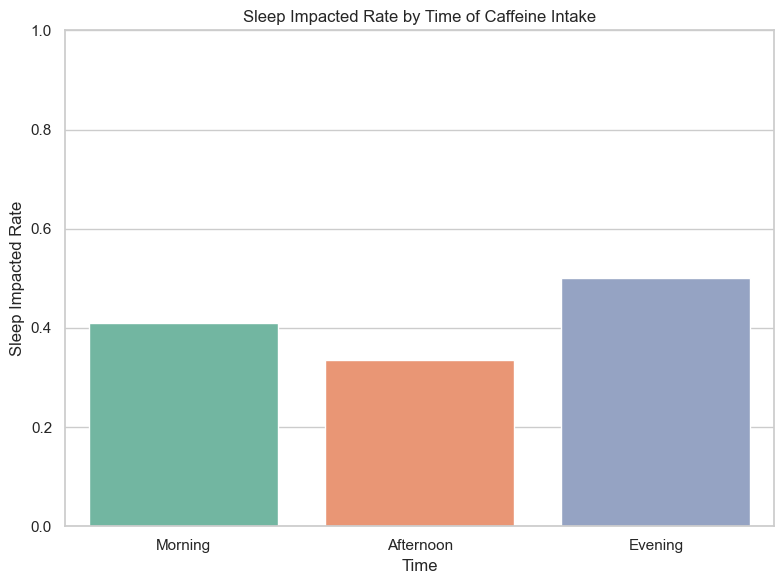


Chi² Test for Sleep Impacted ~ Time of Day:
Morning: p-value = 0.9267 anlamlı fark yok
Afternoon: p-value = 0.0582 anlamlı fark yok
Evening: p-value = 0.0520 anlamlı fark yok


In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Veriyi yükle
df = pd.read_csv("caffeine_intake_tracker.csv")
sns.set(style="whitegrid")

### 1. İÇECEK TÜRLERİNE GÖRE SLEEP IMPACTED ORANI ###
beverages = ["beverage_coffee", "beverage_energy_drink", "beverage_tea"]
labels = ["Coffee", "Energy Drink", "Tea"]

beverage_impact = []
for drink, label in zip(beverages, labels):
    sub = df[df[drink] == True]
    impacted_rate = sub["sleep_impacted"].mean()
    beverage_impact.append({"Beverage": label, "Sleep_Impacted_Rate": impacted_rate})

# Bar plot
impact_df = pd.DataFrame(beverage_impact)
plt.figure(figsize=(8, 6))
sns.barplot(data=impact_df, x="Beverage", y="Sleep_Impacted_Rate", palette="pastel")
plt.title("Sleep Impacted Rate by Beverage Type")
plt.ylabel("Sleep Impacted Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Chi² testi
print("\nChi² Test for Sleep Impacted ~ Beverage:")
for drink, label in zip(beverages, labels):
    table = pd.crosstab(df[drink], df["sleep_impacted"])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{label}: p-value = {p:.4f} {'anlamlı fark var' if p < 0.05 else 'anlamlı fark yok'}")


### 2. KAFEİNİN TÜKETİLDİĞİ SAATE GÖRE SLEEP IMPACTED ORANI ###
times = ["time_of_day_morning", "time_of_day_afternoon", "time_of_day_evening"]
time_labels = ["Morning", "Afternoon", "Evening"]

time_impact = []
for col, label in zip(times, time_labels):
    sub = df[df[col] == True]
    impacted_rate = sub["sleep_impacted"].mean()
    time_impact.append({"Time": label, "Sleep_Impacted_Rate": impacted_rate})

# Bar plot
time_df = pd.DataFrame(time_impact)
plt.figure(figsize=(8, 6))
sns.barplot(data=time_df, x="Time", y="Sleep_Impacted_Rate", palette="Set2")
plt.title("Sleep Impacted Rate by Time of Caffeine Intake")
plt.ylabel("Sleep Impacted Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Chi² testi
print("\nChi² Test for Sleep Impacted ~ Time of Day:")
for col, label in zip(times, time_labels):
    table = pd.crosstab(df[col], df["sleep_impacted"])
    chi2, p, _, _ = chi2_contingency(table)
    print(f"{label}: p-value = {p:.4f} {'anlamlı fark var' if p < 0.05 else 'anlamlı fark yok'}")


-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
**human_cognitive_performance.csv preprocessing ve training**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway

# CSV'yi oku
df = pd.read_csv("human_cognitive_performance.csv")
print(df.info())
print('\nMissing values in each column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB
None

Missing values in each column:
User_ID               0
Age                   0
Gender   

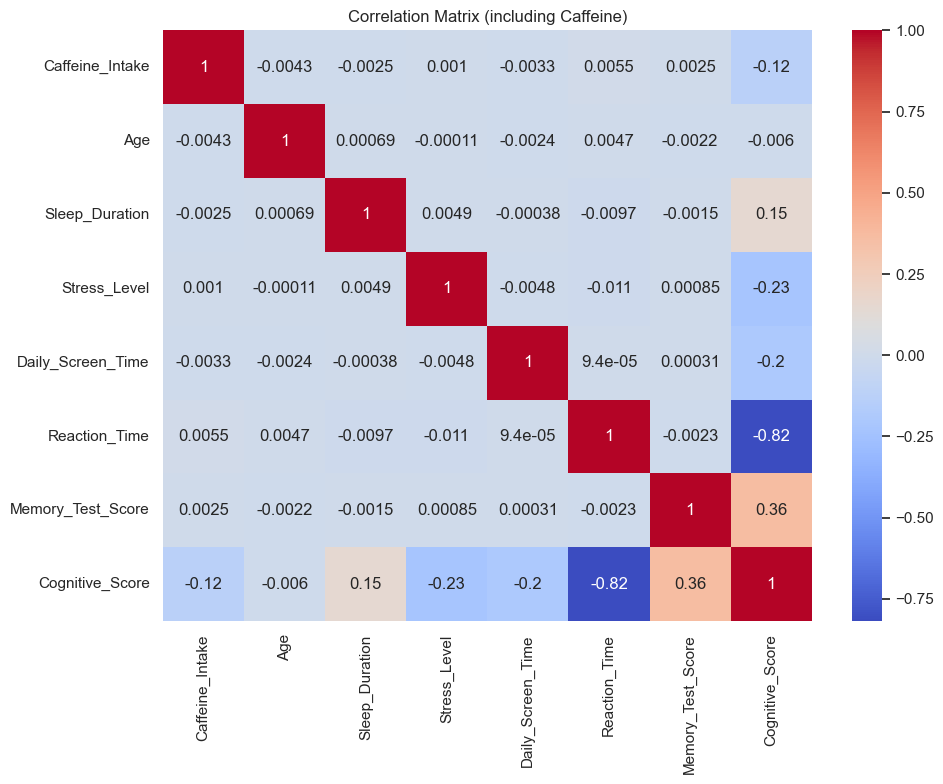

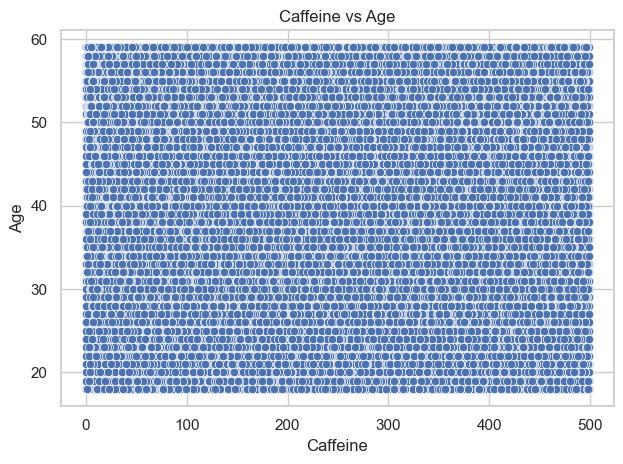

Age:
  Pearson: r = -0.004, p = 0.2275
  Spearman: r = -0.004, p = 0.2290


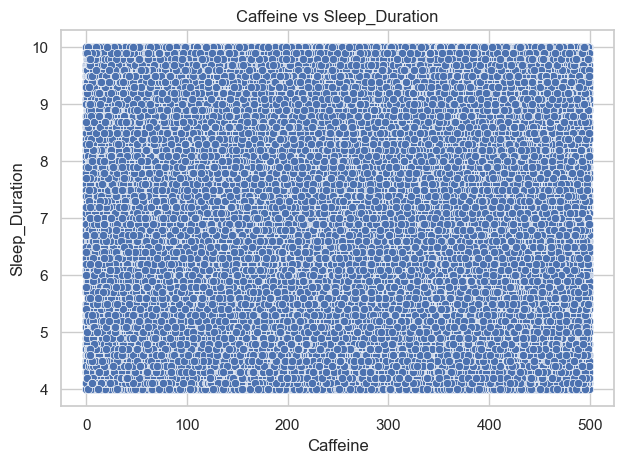

Sleep_Duration:
  Pearson: r = -0.002, p = 0.4826
  Spearman: r = -0.002, p = 0.4848


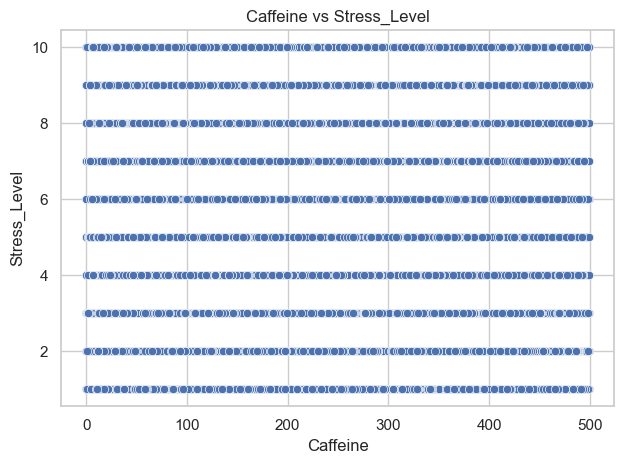

Stress_Level:
  Pearson: r = 0.001, p = 0.7669
  Spearman: r = 0.001, p = 0.7691


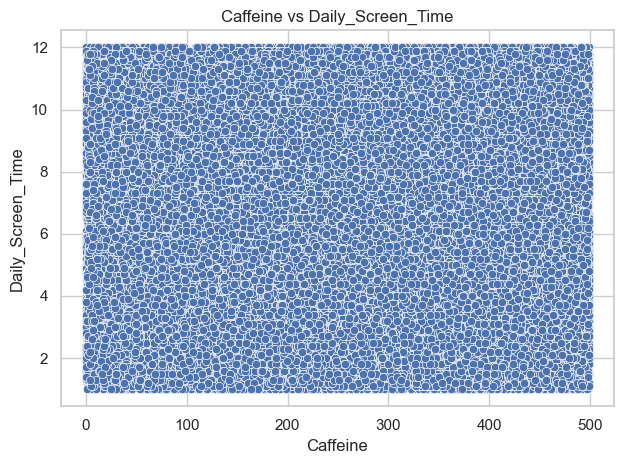

Daily_Screen_Time:
  Pearson: r = -0.003, p = 0.3514
  Spearman: r = -0.003, p = 0.3528


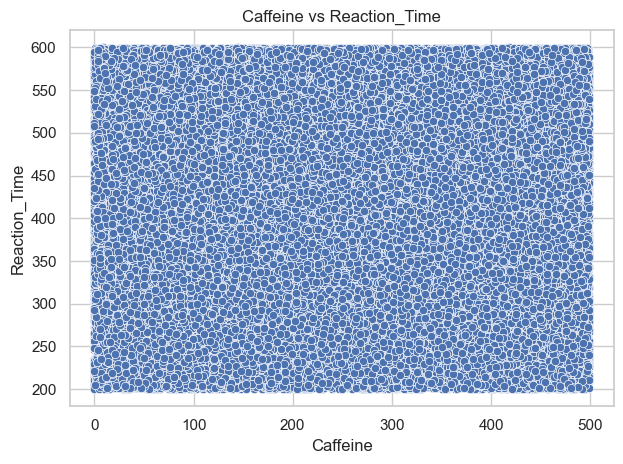

Reaction_Time:
  Pearson: r = 0.006, p = 0.1167
  Spearman: r = 0.006, p = 0.1166


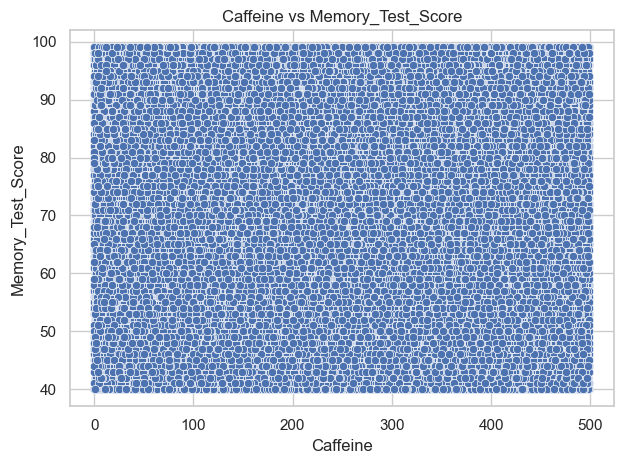

Memory_Test_Score:
  Pearson: r = 0.003, p = 0.4744
  Spearman: r = 0.003, p = 0.4706


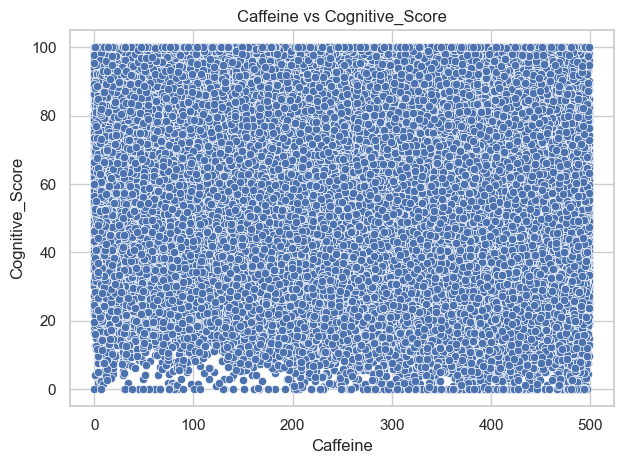

Cognitive_Score:
  Pearson: r = -0.123, p = 0.0000
  Spearman: r = -0.117, p = 0.0000


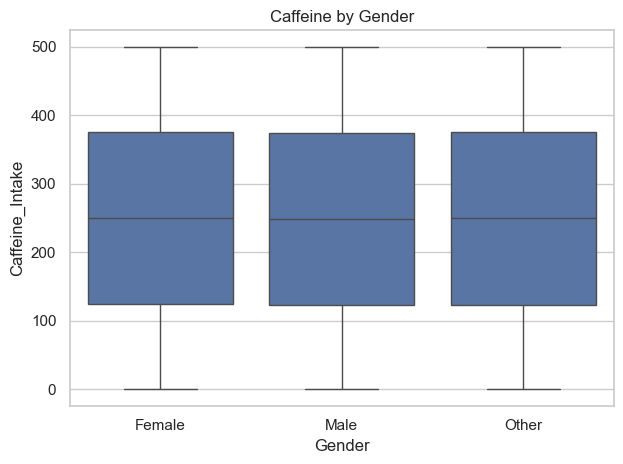

Gender: ANOVA p-value = 0.7097


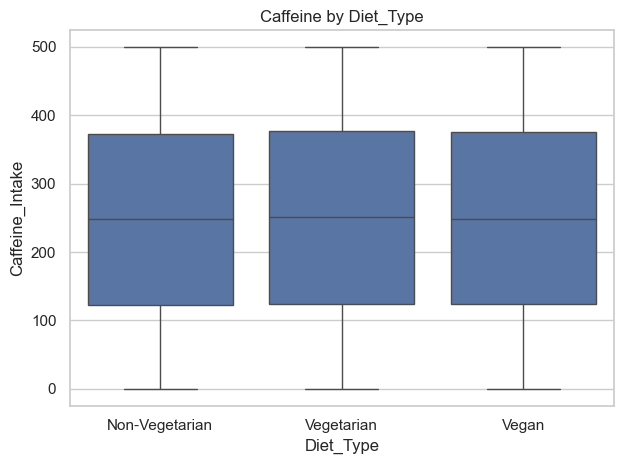

Diet_Type: ANOVA p-value = 0.2953


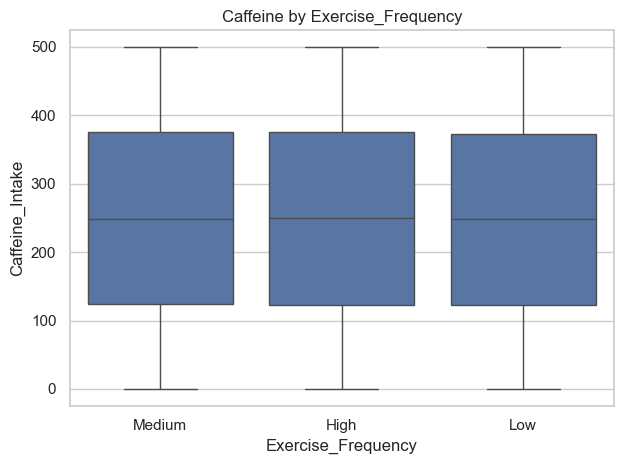

Exercise_Frequency: ANOVA p-value = 0.2740


In [129]:
# Kafein değişkenini belirle
caffeine_col = "Caffeine_Intake"  # Eğer ismi farklıysa, df.columns ile kontrol et
ai_predicted = "AI_Predicted_Score"
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Kafein içermeyen diğer sayısal değişkenleri filtrele
numeric_cols = [col for col in numeric_cols if col != caffeine_col and col != ai_predicted]

# Korelasyon matrisi
corr_matrix = df[[caffeine_col] + numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (including Caffeine)")
plt.tight_layout()
plt.show()

# Scatter plot'lar ve korelasyon + p-değeri hesaplama
for col in numeric_cols:
    plt.figure()
    sns.scatterplot(x=df[caffeine_col], y=df[col])
    plt.title(f"Caffeine vs {col}")
    plt.xlabel("Caffeine")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    # Pearson ve Spearman korelasyon + p-value
    try:
        pearson_corr, p_pearson = pearsonr(df[caffeine_col], df[col])
        spearman_corr, p_spearman = spearmanr(df[caffeine_col], df[col])
        print(f"{col}:")
        print(f"  Pearson: r = {pearson_corr:.3f}, p = {p_pearson:.4f}")
        print(f"  Spearman: r = {spearman_corr:.3f}, p = {p_spearman:.4f}")
    except Exception as e:
        print(f"{col}: Hata oluştu - {e}")

# Kategorik değişkenler için boxplot ve ANOVA
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
for col in cat_cols:
    if df[col].nunique() > 1 and df[col].nunique() < 10:
        plt.figure()
        sns.boxplot(x=df[col], y=df[caffeine_col])
        plt.title(f"Caffeine by {col}")
        plt.tight_layout()
        plt.show()

        # ANOVA
        groups = [group[caffeine_col].dropna() for name, group in df.groupby(col)]
        try:
            stat, p = f_oneway(*groups)
            print(f"{col}: ANOVA p-value = {p:.4f}")
        except Exception as e:
            print(f"{col}: ANOVA Hata - {e}")


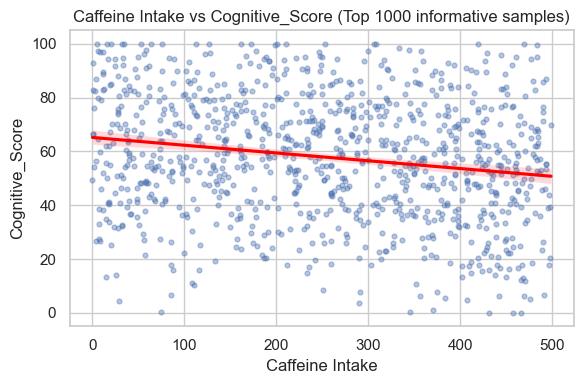

Cognitive_Score (Top 1000 örnek):
  Pearson r = -0.186, p = 0.0000
  Spearman r = -0.180, p = 0.0000


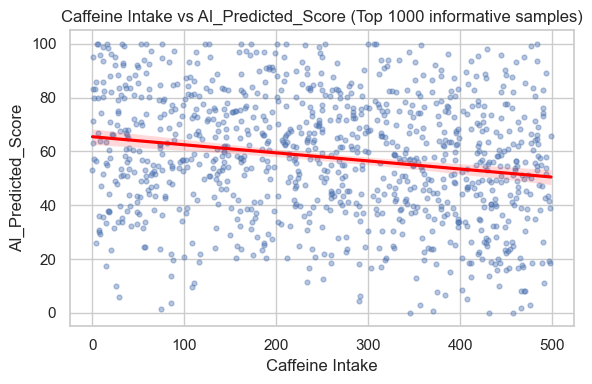

AI_Predicted_Score (Top 1000 örnek):
  Pearson r = -0.193, p = 0.0000
  Spearman r = -0.186, p = 0.0000


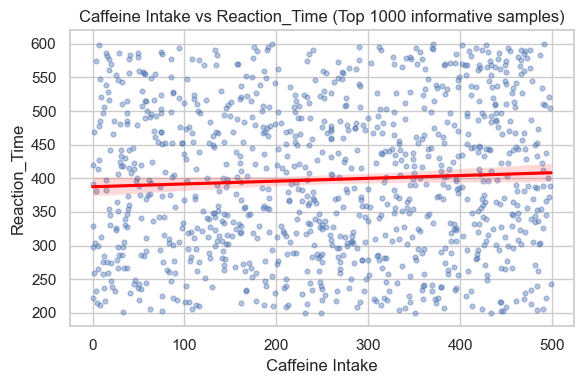

Reaction_Time (Top 1000 örnek):
  Pearson r = 0.054, p = 0.0856
  Spearman r = 0.056, p = 0.0747


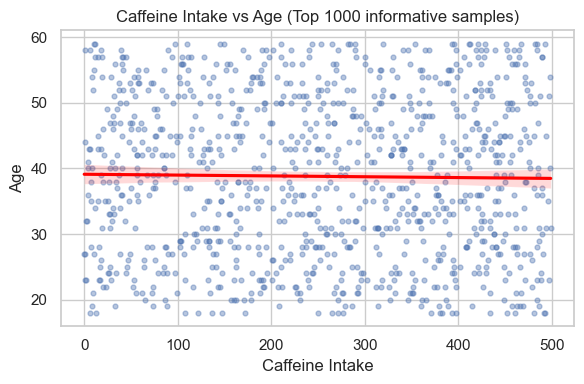

Age (Top 1000 örnek):
  Pearson r = -0.015, p = 0.6260
  Spearman r = -0.014, p = 0.6608


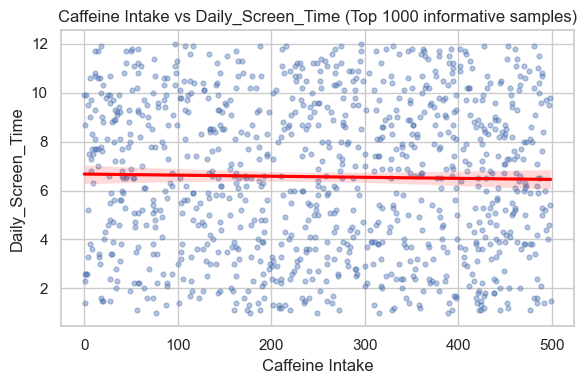

Daily_Screen_Time (Top 1000 örnek):
  Pearson r = -0.020, p = 0.5206
  Spearman r = -0.018, p = 0.5656


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import numpy as np

# 1. Veriyi oku
df = pd.read_csv("human_cognitive_performance.csv")

# 2. Sayısal sütunları al
caffeine_col = "Caffeine_Intake"
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != caffeine_col]

# 3. Korelasyonları hesapla (Pearson, abs al)
correlations = {}
for col in numeric_cols:
    try:
        r, _ = pearsonr(df[caffeine_col], df[col])
        correlations[col] = abs(r)
    except:
        continue

# 4. En yüksek korelasyona sahip ilk 5 değişkeni al
top_cols = sorted(correlations, key=correlations.get, reverse=True)[:5]

# 5. Caffeine ile bu değişkenlerin normalize edilmiş korelasyon ortalamasına göre skor hesapla
df["corr_score"] = df[top_cols].apply(lambda row: np.mean([abs(df[caffeine_col].corr(df[c])) for c in top_cols]), axis=1)

# 6. En bilgilendirici 1000 gözlemi seç
top_df = df.sort_values(by="corr_score", ascending=False).head(1000)

# 7. Seçilen örnekler üzerinden scatter plot (reg çizgili)
for col in top_cols:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=top_df[caffeine_col], y=top_df[col],
                scatter_kws={'s': 12, 'alpha': 0.4},
                line_kws={'color': 'red'})
    plt.title(f"Caffeine Intake vs {col} (Top 1000 informative samples)")
    plt.xlabel("Caffeine Intake")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    # Pearson & Spearman
    p_r, p_val = pearsonr(top_df[caffeine_col], top_df[col])
    s_r, s_val = spearmanr(top_df[caffeine_col], top_df[col])
    print(f"{col} (Top 1000 örnek):")
    print(f"  Pearson r = {p_r:.3f}, p = {p_val:.4f}")
    print(f"  Spearman r = {s_r:.3f}, p = {s_val:.4f}")


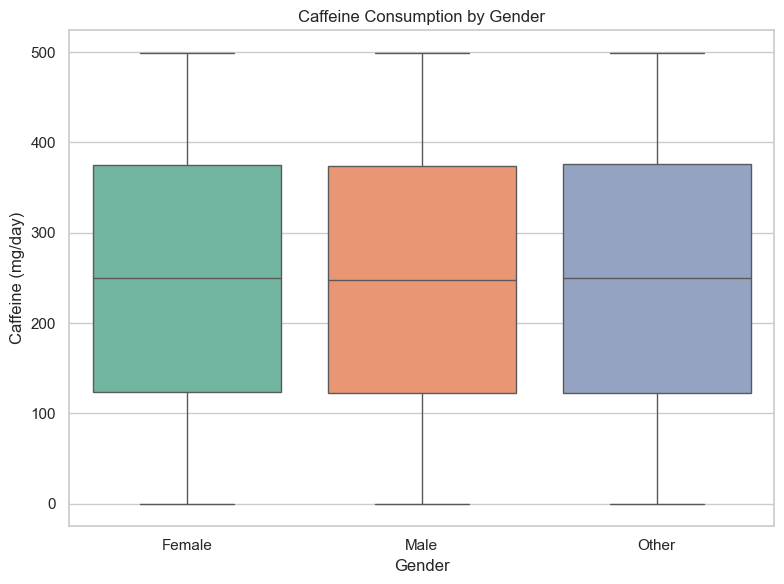

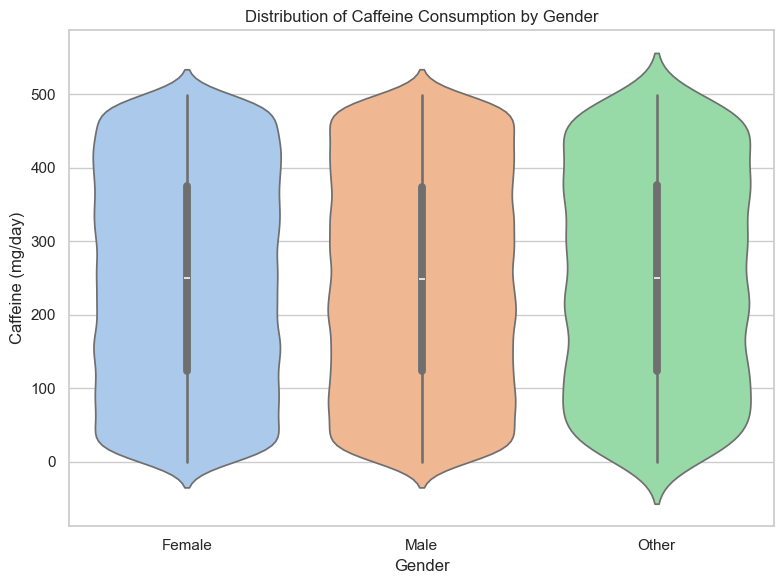

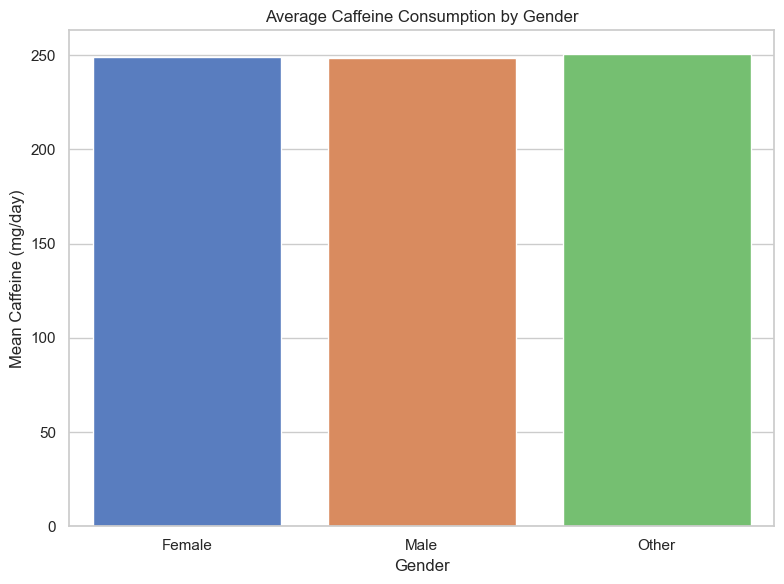

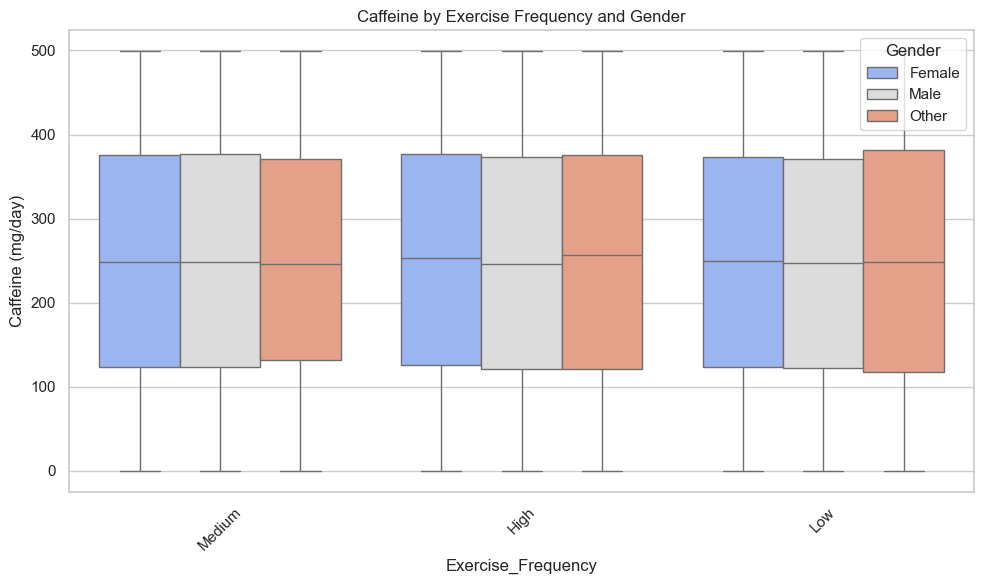

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi oku
df = pd.read_csv("human_cognitive_performance.csv")

# Plot stili
sns.set(style="whitegrid")

# 1. Cinsiyete göre kafein tüketimi (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gender", y="Caffeine_Intake", palette="Set2")
plt.title("Caffeine Consumption by Gender")
plt.xlabel("Gender")
plt.ylabel("Caffeine (mg/day)")
plt.tight_layout()
plt.show()

# 2. Cinsiyete göre kafein tüketimi (violin plot)
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="Gender", y="Caffeine_Intake", palette="pastel")
plt.title("Distribution of Caffeine Consumption by Gender")
plt.xlabel("Gender")
plt.ylabel("Caffeine (mg/day)")
plt.tight_layout()
plt.show()

# 3. Ortalama kafein tüketimi (barplot)
plt.figure(figsize=(8, 6))
mean_caffeine = df.groupby("Gender")["Caffeine_Intake"].mean().reset_index()
sns.barplot(data=mean_caffeine, x="Gender", y="Caffeine_Intake", palette="muted")
plt.title("Average Caffeine Consumption by Gender")
plt.ylabel("Mean Caffeine (mg/day)")
plt.tight_layout()
plt.show()

# 4. Ekstra: Gender & Exercise_Frequency gruplarına göre kafein tüketimi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Exercise_Frequency", y="Caffeine_Intake", hue="Gender", palette="coolwarm")
plt.title("Caffeine by Exercise Frequency and Gender")
plt.ylabel("Caffeine (mg/day)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Veri setini yükle
df = pd.read_csv("human_cognitive_performance.csv")

# 2. Gereksiz sütunları kaldır
drop_cols = ["User_ID", "AI_Predicted_Score"]
df_clean = df.drop(columns=drop_cols)

# 3. Eksik (null) değerleri satır bazında sil
df_clean = df_clean.dropna()

# 4. Hedef ve özellik sütunlarını ayır
target_col = "Caffeine_Intake"
categorical_cols = ["Gender", "Diet_Type", "Exercise_Frequency"]
numerical_cols = [col for col in df_clean.columns if col not in categorical_cols + [target_col]]

# 5. Girdi ve hedef tanımla
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# 6. Sayısal ve kategorik sütunlar için dönüşüm
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop='first'), categorical_cols)
])

# 7. Özellikleri dönüştür (eğitim için hazırla)
X_prepared = preprocessor.fit_transform(X)


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
# 6. EĞİTİM/TEST BÖLÜŞTÜR
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# 7. MODELLERİ TANIMLA
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# 8. EĞİTİM VE DEĞERLENDİRME
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

# 9. SONUÇLARI GÖSTER
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)

               Model     MAE    RMSE     R2
6      MLP Regressor    6.17   27.54  0.963
0  Linear Regression   36.53   69.28  0.768
1   Ridge Regression   36.66   69.27  0.768
2      Random Forest   95.15  112.57  0.388
4                SVR  109.76  127.22  0.219
3  Gradient Boosting  116.42  135.00  0.120
5                KNN  127.15  151.44 -0.107


In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor)
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Veriyi oku
df = pd.read_csv("human_cognitive_performance.csv")

# Gereksiz sütunları çıkar
drop_cols = ["User_ID", "AI_Predicted_Score"]
df_clean = df.drop(columns=drop_cols)

# Null değerleri temizle
df_clean = df_clean.dropna()

# Hedef değişken
target_col = "Caffeine_Intake"

# Kategorik ve sayısal sütunları ayır
categorical_cols = ["Gender", "Diet_Type", "Exercise_Frequency"]
numerical_cols = [col for col in df_clean.columns if col not in categorical_cols + [target_col]]

# X ve y tanımla
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# Dönüştürücü (StandardScaler + OneHotEncoder)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop='first'), categorical_cols)
])

X_prepared = preprocessor.fit_transform(X)

# Eğitim/test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Genişletilmiş model listesi
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Huber Regressor": HuberRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Bagging": BaggingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# Eğitim ve değerlendirme
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 3)
    })

# Sonuçları göster
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


                   Model     MAE    RMSE     R2
14         MLP Regressor    6.17   27.54  0.963
0      Linear Regression   36.53   69.28  0.768
1       Ridge Regression   36.66   69.27  0.768
2       Lasso Regression   52.77   73.85  0.737
4        Huber Regressor   11.96   81.90  0.676
6          Random Forest   95.15  112.57  0.388
7            Extra Trees   96.02  113.52  0.378
11               Bagging   99.10  118.98  0.316
9   HistGradientBoosting  103.42  120.54  0.298
12                   SVR  109.76  127.22  0.219
8      Gradient Boosting  116.42  135.00  0.120
3             ElasticNet  122.82  141.92  0.028
10              AdaBoost  122.64  141.90  0.028
13                   KNN  127.15  151.44 -0.107
5          Decision Tree  131.98  166.95 -0.346


In [132]:
import joblib
from sklearn.preprocessing import StandardScaler

# GUI'de kullanılacak model
mlp_model = models["MLP Regressor"]

# Modeli kaydet
joblib.dump(mlp_model, "trained_mlp_model.pkl")

# Eğer scaler'ı da kullanacaksan:
joblib.dump(preprocessor, "input_scaler.pkl")


['input_scaler.pkl']

-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
**GUI EKRANI**

In [139]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import pandas as pd
import joblib

# ---- Model ve Preprocessor yükle ----
model = joblib.load("trained_mlp_model.pkl")
preprocessor = joblib.load("input_scaler.pkl")  # ColumnTransformer

# ---- "İyi/Orta/Kötü" -> sayı eşlemeleri ----
def map_category_to_score(field, value):
    if field == "Reaction_Time":
        return {"İyi": 250, "Orta": 350, "Kötü": 500}.get(value, 350)
    elif field == "Memory_Test_Score":
        return {"İyi": 95, "Orta": 70, "Kötü": 50}.get(value, 70)
    elif field == "Cognitive_Score":
        return {"İyi": 90, "Orta": 65, "Kötü": 40}.get(value, 65)
    return 60

# ---- Tahmin hesapla ----
def calculate_caffeine():
    try:
        age = float(entry_age.get())
        sleep = float(entry_sleep.get())  # Sleep_Duration
        screen = float(entry_screen.get())  # Daily_Screen_Time
        stress = float(entry_stress.get())

        reaction = map_category_to_score("Reaction_Time", reaction_var.get())
        memory = map_category_to_score("Memory_Test_Score", memory_var.get())
        cognitive = map_category_to_score("Cognitive_Score", cognitive_var.get())

        gender = gender_var.get()
        diet = diet_var.get()
        exercise = exercise_var.get()

        # Doğru sütun adlarıyla veri oluştur
        input_dict = {
            "Age": age,
            "Sleep_Duration": sleep,
            "Daily_Screen_Time": screen,
            "Reaction_Time": reaction,
            "Memory_Test_Score": memory,
            "Cognitive_Score": cognitive,
            "Stress_Level": stress,
            "Gender": gender,
            "Diet_Type": diet,
            "Exercise_Frequency": exercise
        }

        input_df = pd.DataFrame([input_dict])

        # Preprocess ve tahmin
        X_prepared = preprocessor.transform(input_df)
        caffeine_mg = model.predict(X_prepared)[0]

        coffee = int(caffeine_mg // 95)
        tea = int((caffeine_mg - coffee * 95) // 30)

        if int(caffeine_mg) >= 0:
            msg = f"Günlük tahmini tüketebileceğimiz kafein miktarı: {int(caffeine_mg)} mg.\n\n"
            
        if caffeine_mg < 50:
            msg += "Kafein tüketiminiz önerilmiyor."
        else:
            if coffee <= 5:
                msg += f"Günlük {coffee} fincan kahve ve {tea} fincan çay tüketebilirsiniz."
            else:
                msg += f"Günlük 5 fincan kahve ve 2 fincan çay tüketebilirsiniz."
                
        show_popup("Kafein Öneriniz", msg)

    except Exception as e:
        show_popup("Geçersiz Giriş", f"Lütfen tüm alanlara geçerli değer girin.\n\nHata: {e}")

# ---- Popup göster ----
def show_popup(title, message):
    popup = tk.Toplevel()
    popup.title(title)
    popup.geometry("400x250")
    popup.configure(bg="#fefefe")
    popup.resizable(False, False)
    ttk.Label(popup, text=title, font=("Helvetica", 14, "bold")).pack(pady=(20, 10))
    ttk.Label(popup, text=message, wraplength=360, justify="center", font=("Helvetica", 11)).pack(pady=(0, 20))
    ttk.Button(popup, text="Tamam", command=popup.destroy).pack()
    popup.grab_set()

# ---- Arayüz ----
root = tk.Tk()
root.title("Kafein Öneri Sistemi")
root.geometry("470x630")
root.resizable(False, False)

ttk.Label(root, text="Kafein Öneri Sistemi", font=("Helvetica", 16, "bold")).pack(pady=10)
frame = ttk.Frame(root, padding=10)
frame.pack()

# Sayısal girişler
labels = [
    "Yaş:", 
    "Uyku Süresi (saat/gün):",
    "Günlük Ekran Süresi (saat):",
    "Stres Seviyesi (1-10):"
]
entries = []
for i, label in enumerate(labels):
    ttk.Label(frame, text=label).grid(row=i, column=0, sticky="w")
    entry = ttk.Entry(frame)
    entry.grid(row=i, column=1)
    entries.append(entry)

entry_age, entry_sleep, entry_screen, entry_stress = entries

# Reaksiyon süresi
ttk.Label(frame, text="Reaksiyon Süresi:").grid(row=4, column=0, sticky="w")
reaction_var = tk.StringVar(value="Orta")
ttk.OptionMenu(frame, reaction_var, "Orta", "İyi", "Orta", "Kötü").grid(row=4, column=1, sticky="ew")

# Hafıza
ttk.Label(frame, text="Hafıza Durumu:").grid(row=5, column=0, sticky="w")
memory_var = tk.StringVar(value="Orta")
ttk.OptionMenu(frame, memory_var, "Orta", "İyi", "Orta", "Kötü").grid(row=5, column=1, sticky="ew")

# Bilişsel performans
ttk.Label(frame, text="Bilişsel Performans:").grid(row=6, column=0, sticky="w")
cognitive_var = tk.StringVar(value="Orta")
ttk.OptionMenu(frame, cognitive_var, "Orta", "İyi", "Orta", "Kötü").grid(row=6, column=1, sticky="ew")

# Cinsiyet
ttk.Label(frame, text="Cinsiyet:").grid(row=7, column=0, sticky="w")
gender_var = tk.StringVar(value="Male")
ttk.OptionMenu(frame, gender_var, "Kadın", "Male", "Female", "Other").grid(row=7, column=1, sticky="ew")

# Diyet Tipi
ttk.Label(frame, text="Diyet Tipi:").grid(row=8, column=0, sticky="w")
diet_var = tk.StringVar(value="Balanced")
ttk.OptionMenu(frame, diet_var, "Vejetaryen Değil", "Non-Vegetarian", "Vegetarian", "Vegan").grid(row=8, column=1, sticky="ew")
;
# Egzersiz Sıklığı
ttk.Label(frame, text="Egzersiz Sıklığı:").grid(row=9, column=0, sticky="w")
exercise_var = tk.StringVar(value="Regular")
ttk.OptionMenu(frame, exercise_var, "Orta", "Low", "Medium", "High").grid(row=9, column=1, sticky="ew")

# Hesapla butonu
ttk.Button(root, text="Kafein Miktarını Hesapla", command=calculate_caffeine).pack(pady=15)

root.mainloop()


KeyboardInterrupt: 

In [133]:
import tkinter as tk
from tkinter import ttk
import numpy as np
from sklearn.preprocessing import StandardScaler

# ----- Yer tutucu model -----
class DummyModel:
    def predict(self, X):
        return np.array([250])  # sabit öneri

model = DummyModel()
scaler = StandardScaler()

# ----- Kafein Hesaplama -----
def calculate_caffeine():
    try:
        age = int(entry_age.get())
        weight = float(entry_weight.get())
        height = float(entry_height.get())
        gender = gender_var.get()
        bp = bp_var.get()
        heart = heart_var.get()
        tinnitus = tinnitus_var.get()

        gender_val = 1 if gender == "Erkek" else 0
        bp_val = 1 if bp == "Evet" else 0
        heart_val = 1 if heart == "Evet" else 0
        tinnitus_val = 1 if tinnitus == "Evet" else 0

        X = np.array([[age, gender_val, weight, height, bp_val, heart_val, tinnitus_val]])
        X_scaled = scaler.fit_transform(X)  # gerçek modelde transform() kullanılmalı

        caffeine_mg = model.predict(X_scaled)[0]
        coffee = int(caffeine_mg // 95)
        tea = int((caffeine_mg - coffee * 95) // 30)

        msg = f"Günlük tahmini kafein ihtiyacınız: {int(caffeine_mg)} mg.\n\n"
        if caffeine_mg < 50:
            msg += "Kafein tüketiminiz önerilmiyor."
        else:
            msg += f"☕ Günlük {coffee} fincan kahve ve {tea} fincan çay tüketebilirsiniz."
        show_popup("Kafein Öneriniz", msg)

    except Exception:
        show_popup("Eksik Bilgi", "Lütfen tüm alanları doğru ve eksiksiz doldurun.")

# ----- Özel Popup -----
def show_popup(title, message):
    popup = tk.Toplevel()
    popup.title(title)
    popup.geometry("400x220")
    popup.configure(bg="#fefefe")
    popup.resizable(False, False)

    ttk.Label(popup, text=title, font=("Helvetica", 14, "bold")).pack(pady=(20, 10))
    ttk.Label(popup, text=message, wraplength=360, justify="center", font=("Helvetica", 11)).pack(pady=(0, 20))
    ttk.Button(popup, text="Tamam", command=popup.destroy).pack()
    popup.grab_set()

# ----- Arayüz -----
root = tk.Tk()
root.title("Kafein Öneri Sistemi")
root.geometry("400x350")
root.resizable(False, False)

ttk.Label(root, text="Kafein Öneri Sistemi", font=("Helvetica", 16, "bold")).pack(pady=10)

frame = ttk.Frame(root, padding=10)
frame.pack()

# Cinsiyet
ttk.Label(frame, text="Cinsiyet:").grid(row=0, column=0, sticky="w")
gender_var = tk.StringVar(value="Erkek")
ttk.OptionMenu(frame, gender_var, "Erkek", "Erkek", "Kadın").grid(row=0, column=1, sticky="ew")

# Yaş, Kilo, Boy
labels = ["Yaş:", "Kilo (kg):", "Boy (cm):"]
entries = []
for i, label in enumerate(labels, start=1):
    ttk.Label(frame, text=label).grid(row=i, column=0, sticky="w")
    entry = ttk.Entry(frame)
    entry.grid(row=i, column=1)
    entries.append(entry)

entry_age, entry_weight, entry_height = entries

# Sağlık durumu seçenekleri
ttk.Label(frame, text="Tansiyon Hastalığı:").grid(row=4, column=0, sticky="w")
bp_var = tk.StringVar(value="Hayır")
ttk.OptionMenu(frame, bp_var, "Hayır", "Evet", "Hayır").grid(row=4, column=1, sticky="ew")

ttk.Label(frame, text="Kalp Hastalığı:").grid(row=5, column=0, sticky="w")
heart_var = tk.StringVar(value="Hayır")
ttk.OptionMenu(frame, heart_var, "Hayır", "Evet", "Hayır").grid(row=5, column=1, sticky="ew")

ttk.Label(frame, text="Kulak Çınlaması (Tinnitus):").grid(row=6, column=0, sticky="w")
tinnitus_var = tk.StringVar(value="Hayır")
ttk.OptionMenu(frame, tinnitus_var, "Hayır", "Evet", "Hayır").grid(row=6, column=1, sticky="ew")

ttk.Button(root, text="Kafein Miktarını Hesapla", command=calculate_caffeine).pack(pady=15)

root.mainloop()